# I. Business Understanding
* identify business goals: the mission of the company is to save precious lives of millions of stray animals suffering on the streets or are euthanized in shelters around the world and find home for them, may creating more happy families. The goal is to help the Malaysia’s leading animal welfare platform PetFinder.my with a database of more than 150,000 animals to collaborates better with animal lovers, media corporations, and global organizations to improve animal welfare. 
* assess the situation: Animal adoption rates are strongly correlated to the metadata associated with their online profiles, such as descriptive text and photo characteristics. As one example, PetFinder is currently experimenting with a simple AI tool called the Cuteness Meter, which ranks how cute a pet is based on qualities present in their photos. <br>
In this competition you will be developing algorithms to predict the adoptability of pets - specifically, how quickly is a pet adopted? If successful, they will be adapted into AI tools that will guide shelters and rescuers around the world on improving their pet profiles' appeal, reducing animal suffering and euthanization. 
* define the data-mining goals-Predict the speed at which a pet is adopted, based on the pet’s listing on PetFinder. The speed of adoption is determined by the speed at which all of the pets are adopted in thjs case. 
* produce a project plan 
Project pipeline 

# II. Data Understanding
* gather data-from Kaggle.com 
* Contestants are required to predict this value. The value is determined by how quickly, if at all, a pet is adopted. 
* describe data 
* explore data: population, religion <br>
Exploratory Data Analysis
* verify data quality <br>
Missing Data:<br>
1k++ pets don't have names (Not suprising)<br>
around 500 pets don't sentiment (but that's ok. We'll work with what we have)

## EDA

In [1]:
!pip install opencv-python
!pip install wordcloud
!pip install xgboost
!pip install tensorflow_text
!pip install tensorflow_hub

import numpy as np 
import pandas as pd 
import os
import json
import seaborn as sns 
#import cv2 
import matplotlib.pyplot as plt
import glob
from wordcloud import WordCloud
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import cohen_kappa_score 
from tabulate import tabulate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
import tensorflow_hub as hub
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications.vgg16 import preprocess_input
from PIL import Image
from sklearn.cluster import KMeans
import tensorflow as tf
import tensorflow_text as text
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import time
import datetime

%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'
#pd.set_option('display.max_colwidth', -1)


from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import gc


In [2]:
!pip3 install catboost
!pip install eli5
from catboost import CatBoostClassifier
from tqdm import tqdm_notebook
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import random
import warnings
warnings.filterwarnings("ignore")
from functools import partial
#pd.set_option('max_colwidth', 500)
#pd.set_option('max_columns', 500)
#pd.set_option('max_rows', 100)
import scipy as sp
from math import sqrt
from collections import Counter
from sklearn.metrics import confusion_matrix as sk_cmatrix
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import eli5
from IPython.display import display
nltk.download('punkt')
nltk.download('stopwords')
STOP_WORDS = stopwords.words()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import matplotlib as mpl
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import sklearn.linear_model as lm

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import make_scorer
from sklearn.metrics import cohen_kappa_score # https://www.kaggle.com/aroraaman/quadratic-kappa-metric-explained-in-5-simple-steps

sns.set_style("darkgrid")
sns.set_context("paper")
mpl.style.use("seaborn")

!python -m spacy download en_core_web_sm
import en_core_web_sm

nlp = en_core_web_sm.load()
from spacy import displacy

     ---------------------------------------- 12.8/12.8 MB 3.1 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc,classification_report

def vif(X):
  v = pd.DataFrame()
  v["variable"] = X.select_dtypes(include='number').columns
  v["VIF"] = [variance_inflation_factor(X.select_dtypes(include='number').values, i)
                for i in range(len(X.select_dtypes(include='number').columns))]
  return(v)

def profile(X):
  print(X.head(10))
  mute = sns.heatmap(X.select_dtypes(include='number').corr(), cmap="RdYlGn", annot=True)
  plt.show()
  mute = pd.plotting.scatter_matrix(X.select_dtypes(include='number'), alpha=0.2)
  plt.show()
  print(vif(X))
  return()

In [2]:
#load up cvs files
colors = pd.read_csv(r'C:\Users\xy\Desktop\petfinder-adoption-prediction\color_labels.csv')
breeds = pd.read_csv(r'C:\Users\xy\Desktop\petfinder-adoption-prediction\breed_labels.csv')
states = pd.read_csv(r'C:\Users\xy\Desktop\petfinder-adoption-prediction\state_labels.csv')

train_df = pd.read_csv(r'C:\Users\xy\Desktop\petfinder-adoption-prediction\train\train.csv')

trainImagesPath = (r'C:\Users\xy\Desktop\petfinder-adoption-prediction\train_images')

train_df

Type            Name  Age  Breed1  Breed2  Gender  Color1  Color2  \
0         2          Nibble    3     299       0       1       1       7   
1         2     No Name Yet    1     265       0       1       1       2   
2         1          Brisco    1     307       0       1       2       7   
3         1            Miko    4     307       0       2       1       2   
4         1          Hunter    1     307       0       1       1       0   
...     ...             ...  ...     ...     ...     ...     ...     ...   
14988     2             NaN    2     266       0       3       1       0   
14989     2  Serato & Eddie   60     265     264       3       1       4   
14990     2         Monkies    2     265     266       3       5       6   
14991     2         Ms Daym    9     266       0       2       4       7   
14992     1            Fili    1     307     307       1       2       0   

       Color3  MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  \
0           0             1          1           2         2           2   
1           0             2          2           3         3           3   
2           0             2          2           1         1           2   
3           0             2          1           1         1           2   
4           0             2          1           2         2           2   
...       ...           ...        ...         ...       ...         ...   
14988       0             2          2           2         2           2   
14989       7             2          2           1         1           1   
14990       7             3          2           2         1           3   
14991       0             1          1           1         1           1   
14992       0             2          1           2         2           2   

       Health  Quantity  Fee  State                         RescuerID  \
0           1         1  100  41326  8480853f516546f6cf33aa88cd76c379   
1           1         1    0  41401  3082c7125d8fb66f7dd4bff4192c8b14   
2           1         1    0  41326  fa90fa5b1ee11c86938398b60abc32cb   
3           1         1  150  41401  9238e4f44c71a75282e62f7136c6b240   
4           1         1    0  41326  95481e953f8aed9ec3d16fc4509537e8   
...       ...       ...  ...    ...                               ...   
14988       1         4    0  41326  61c84bd7bcb6fb31d2d480b1bcf9682e   
14989       1         2    0  41326  1d5096c4a5e159a3b750c5cfcf6ceabf   
14990       1         5   30  41326  6f40a7acfad5cc0bb3e44591ea446c05   
14991       1         1    0  41336  c311c0c569245baa147d91fa4e351ae4   
14992       1         1    0  41332  9ed1d5493d223eaa5024c1a031dbc9c2   

       VideoAmt                                        Description      PetID  \
0             0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3   
1             0  I just found it alone yesterday near my apartm...  6296e909a   
2             0  Their pregnant mother was dumped by her irresp...  3422e4906   
3             0  Good guard dog, very alert, active, obedience ...  5842f1ff5   
4             0  This handsome yet cute boy is up for adoption....  850a43f90   
...         ...                                                ...        ...   
14988         0  I have 4 kittens that need to be adopt urgentl...  dc0935a84   
14989         0  Serato(female cat- 3 color) is 4 years old and...  a01ab5b30   
14990         0  Mix breed, good temperament kittens. Love huma...  d981b6395   
14991         0  she is very shy..adventures and independent..s...  e4da1c9e4   
14992         0  Fili just loves laying around and also loves b...  a83d95ead   

       PhotoAmt  AdoptionSpeed  
0           1.0              2  
1           2.0              0  
2           7.0              3  
3           8.0              2  
4           3.0              2  
...         ...            ...  
14988       3.0              2  
14989       3.0              4  
14990       5.0              3  
1

0.0

### 1. overview the data columns
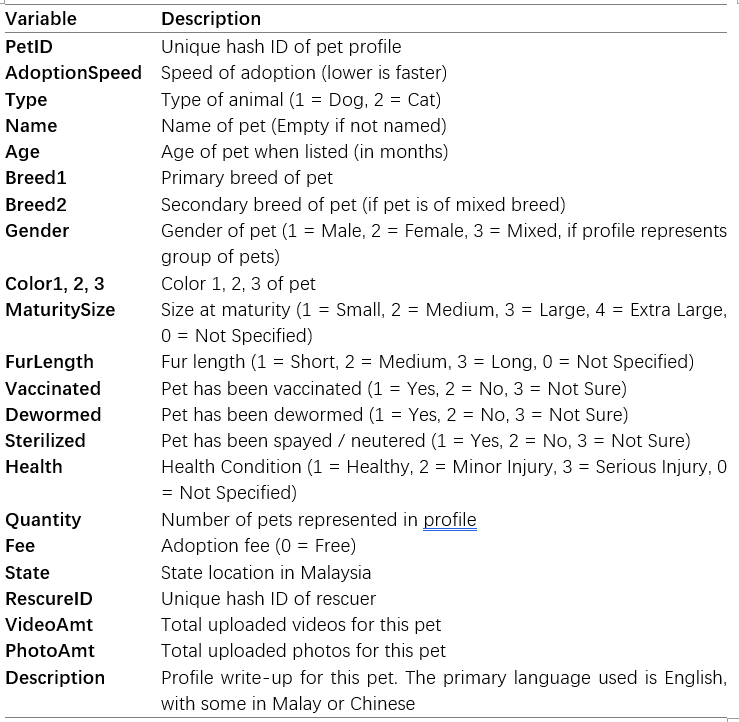
* Predictors<br>
PetID - Unique hash ID of pet profile<br>
AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.<br>
Type - Type of animal (1 = Dog, 2 = Cat)<br>
Name - Name of pet (Empty if not named)<br>
Age - Age of pet when listed, in months<br>
Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)<br>
Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)<br>
Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)<br>
Color1 - Color 1 of pet (Refer to ColorLabels dictionary)<br>
Color2 - Color 2 of pet (Refer to ColorLabels dictionary)<br>
Color3 - Color 3 of pet (Refer to ColorLabels dictionary)<br>
MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)<br>
FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)<br>
Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)<br>
Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)<br>
Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)<br>
Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)<br>
Quantity - Number of pets represented in profile<br>
Fee - Adoption fee (0 = Free)<br>
State - State location in Malaysia (Refer to StateLabels dictionary)<br>
RescuerID - Unique hash ID of rescuer<br>
VideoAmt - Total uploaded videos for this pet<br>
PhotoAmt - Total uploaded photos for this pet<br>
Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.<br>
* Target Variable<br>
Adoption Speed is a column that represent how quickly and if a pet were adopted.<br>
Whenever a Pet were listed in "PetFinder.my" site PetFinder tracked how much time passed till someone adopted the pet.<br>
0 - Pet was adopted on the same day as it was listed. <br>
1 - Pet was adopted between 1 and 7 days (1st week) after being listed. <br>
2 - Pet was adopted between 8 and 30 days (1st month) after being listed. <br>
3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed. <br>
4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days). <br>

Doggo funfact: Puppy (0-12 months), Adult (12-84 months), Senior (84 months == 7 years and above)<br>

An Example of a Listing in PetFinder.my
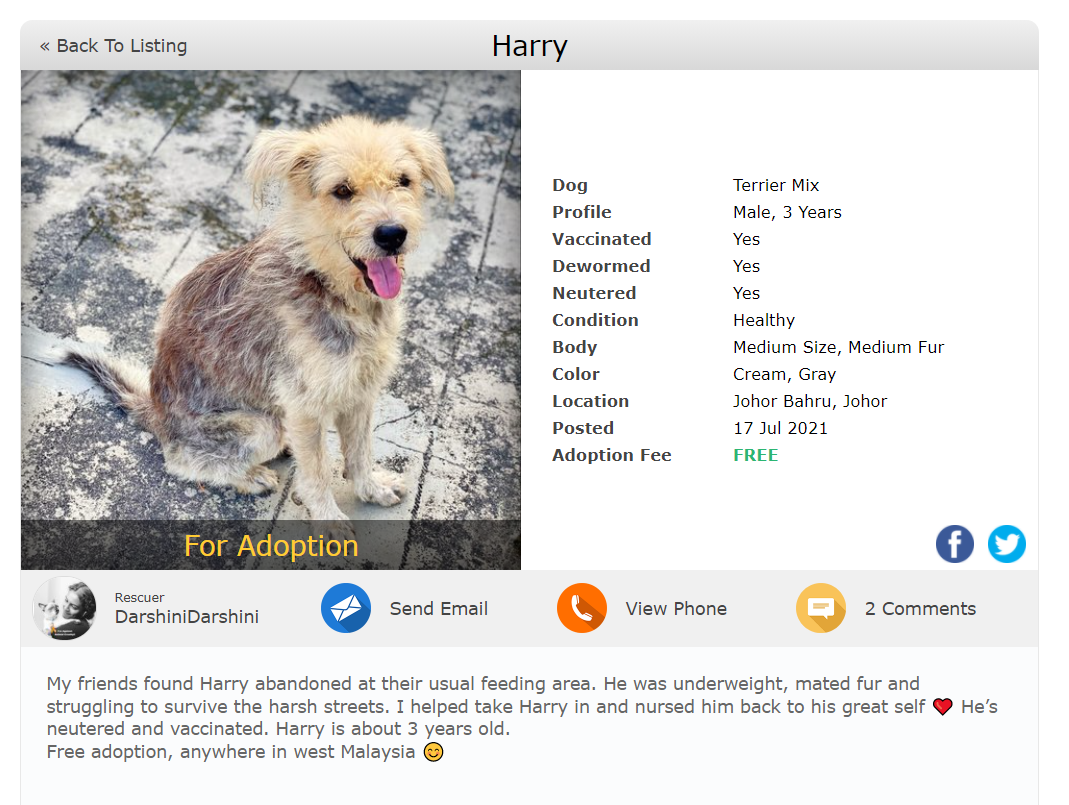

In [6]:
#general information of the dataset
train_df.info()
#we have 24 columns of information about each pet in the dataset
#not all pets have a name/description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

### 2. distribution of adoption

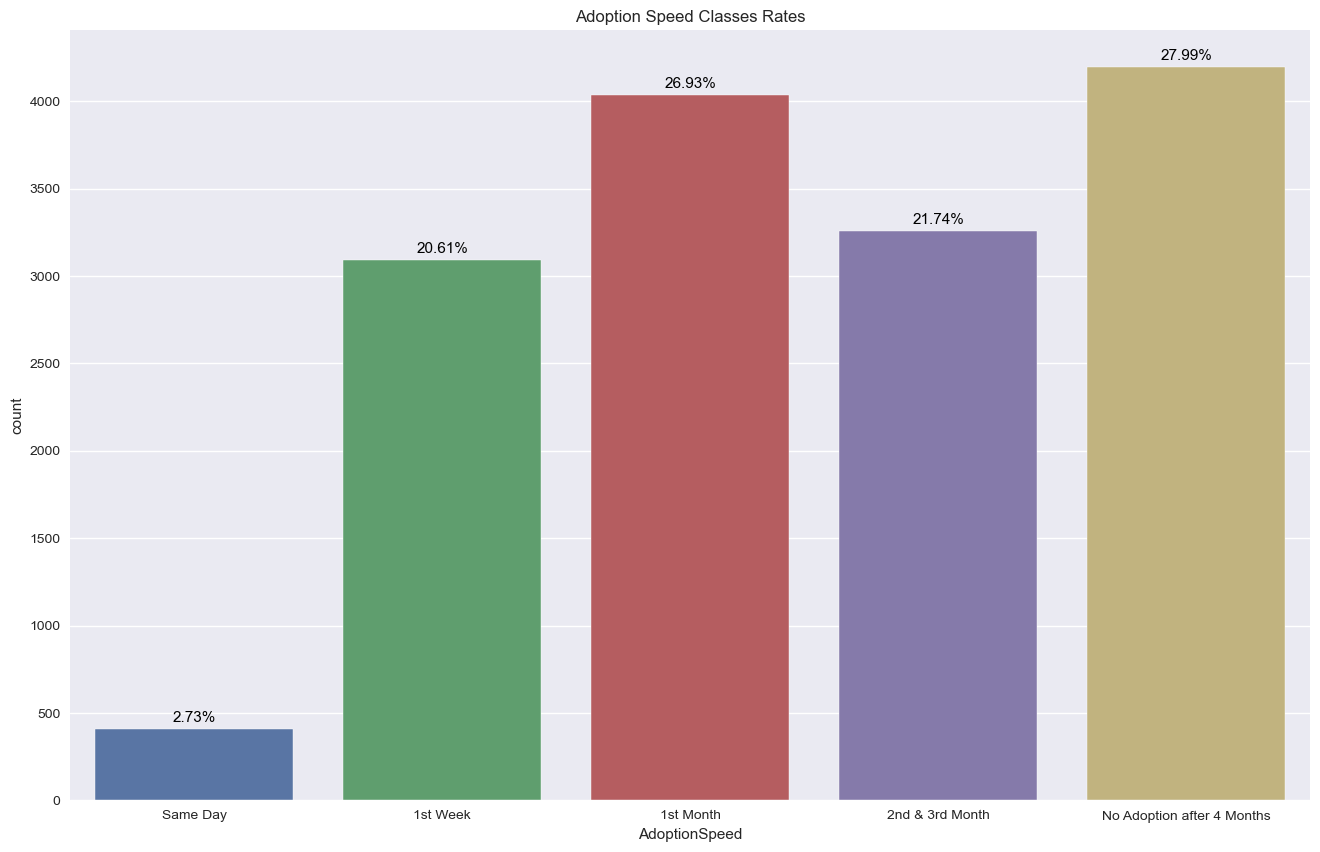

In [7]:
plt.figure(figsize=(16,10))
g=sns.countplot(x='AdoptionSpeed',data=train_df)
plt.title('Adoption Speed Classes Rates')
ax=g.axes
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100/train_df.shape[0]:.2f}%',(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='center',fontsize=11,color='black',rotation=0,xytext=(0,8),textcoords='offset points')
ax=ax.set_xticklabels(['Same Day','1st Week','1st Month','2nd & 3rd Month','No Adoption after 4 Months'])

#Around 28% of the pets weren't be adopted after 100 days, which means 72% of the pets were adopted before 100(90) days (marked as 'No Adopted' below).

### 3. Correlation Matrix

Text(0.5, 1.0, 'AdoptionSpeed')

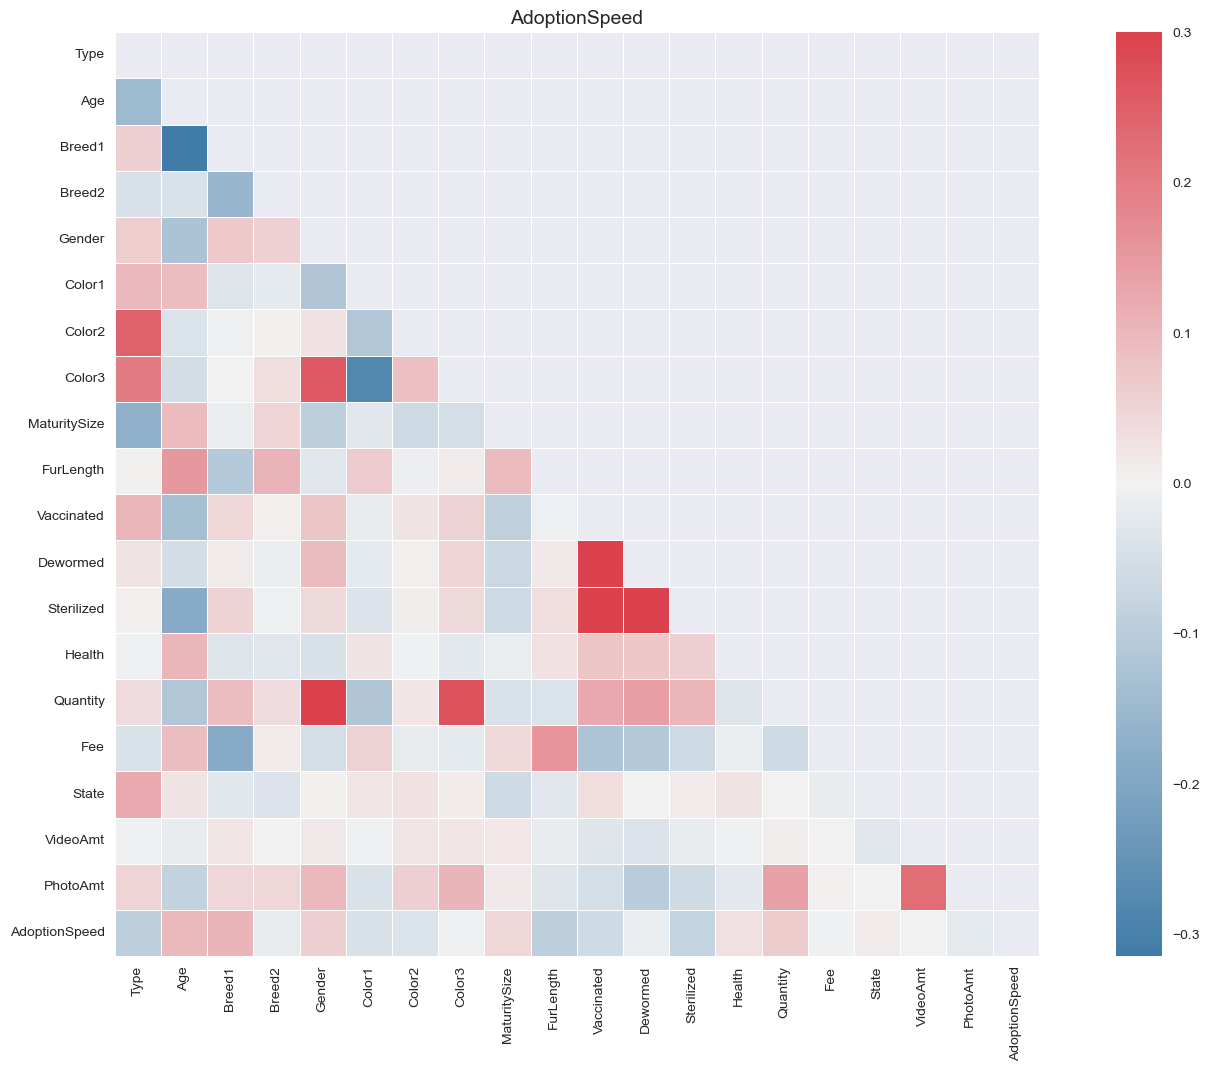

In [8]:
plt.figure(figsize=(20,12))
corr=train_df.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))
cmap=sns.diverging_palette(240, 10, as_cmap=True,n=9)
ax1=sns.heatmap(corr,mask=mask,cmap=cmap,center=0,square=True,linewidths=.5,vmax=0.3)
ax1.set_title('AdoptionSpeed',fontsize=14)

#the relationship between Quantity and Gender is not surprsing since Gender 3 is only for More than one pet
#Seems like Dewormed Sterilized and Vaccianted have an high correlection
#we can see that there is a postive correlection between The age of the pet and the adoption Speed (that means older pets are less likely to be adopted :( )
#By looking at the binary adoption df (left heatmap) we can see that small amounts of pictures effects the chances of pet adoption
#People tend to adopt pet's with higher fur length

### 4. Columns Exploration
#### 4.1 Dogs Vs Cats

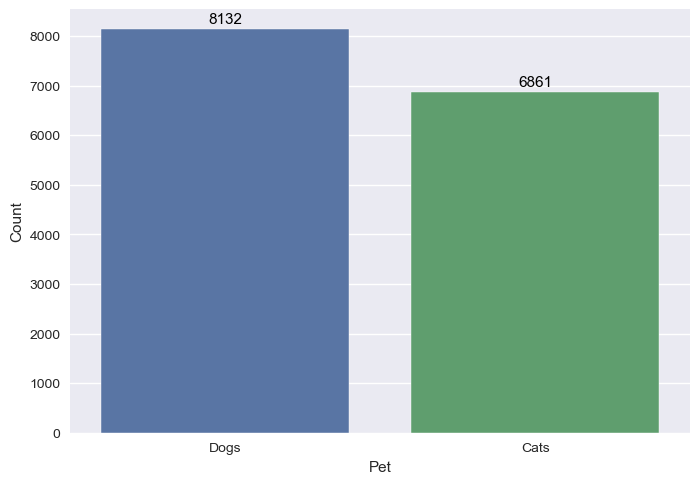

In [9]:
ax=sns.countplot(x='Type',data=train_df)
ax.set(xlabel='Pet',ylabel='Count',xticklabels=(['Dogs','Cats']))
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()-80),ha='center',va='center',fontsize=11,color='black',xytext=(0,10),textcoords='offset points')

#How many Dogs and Cats do we have in the Train set?
#We have 8132 Dogs and 6861 Cats in the dataset. 54% are dogs, there is almost a balance between the listing of cats and dogs.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


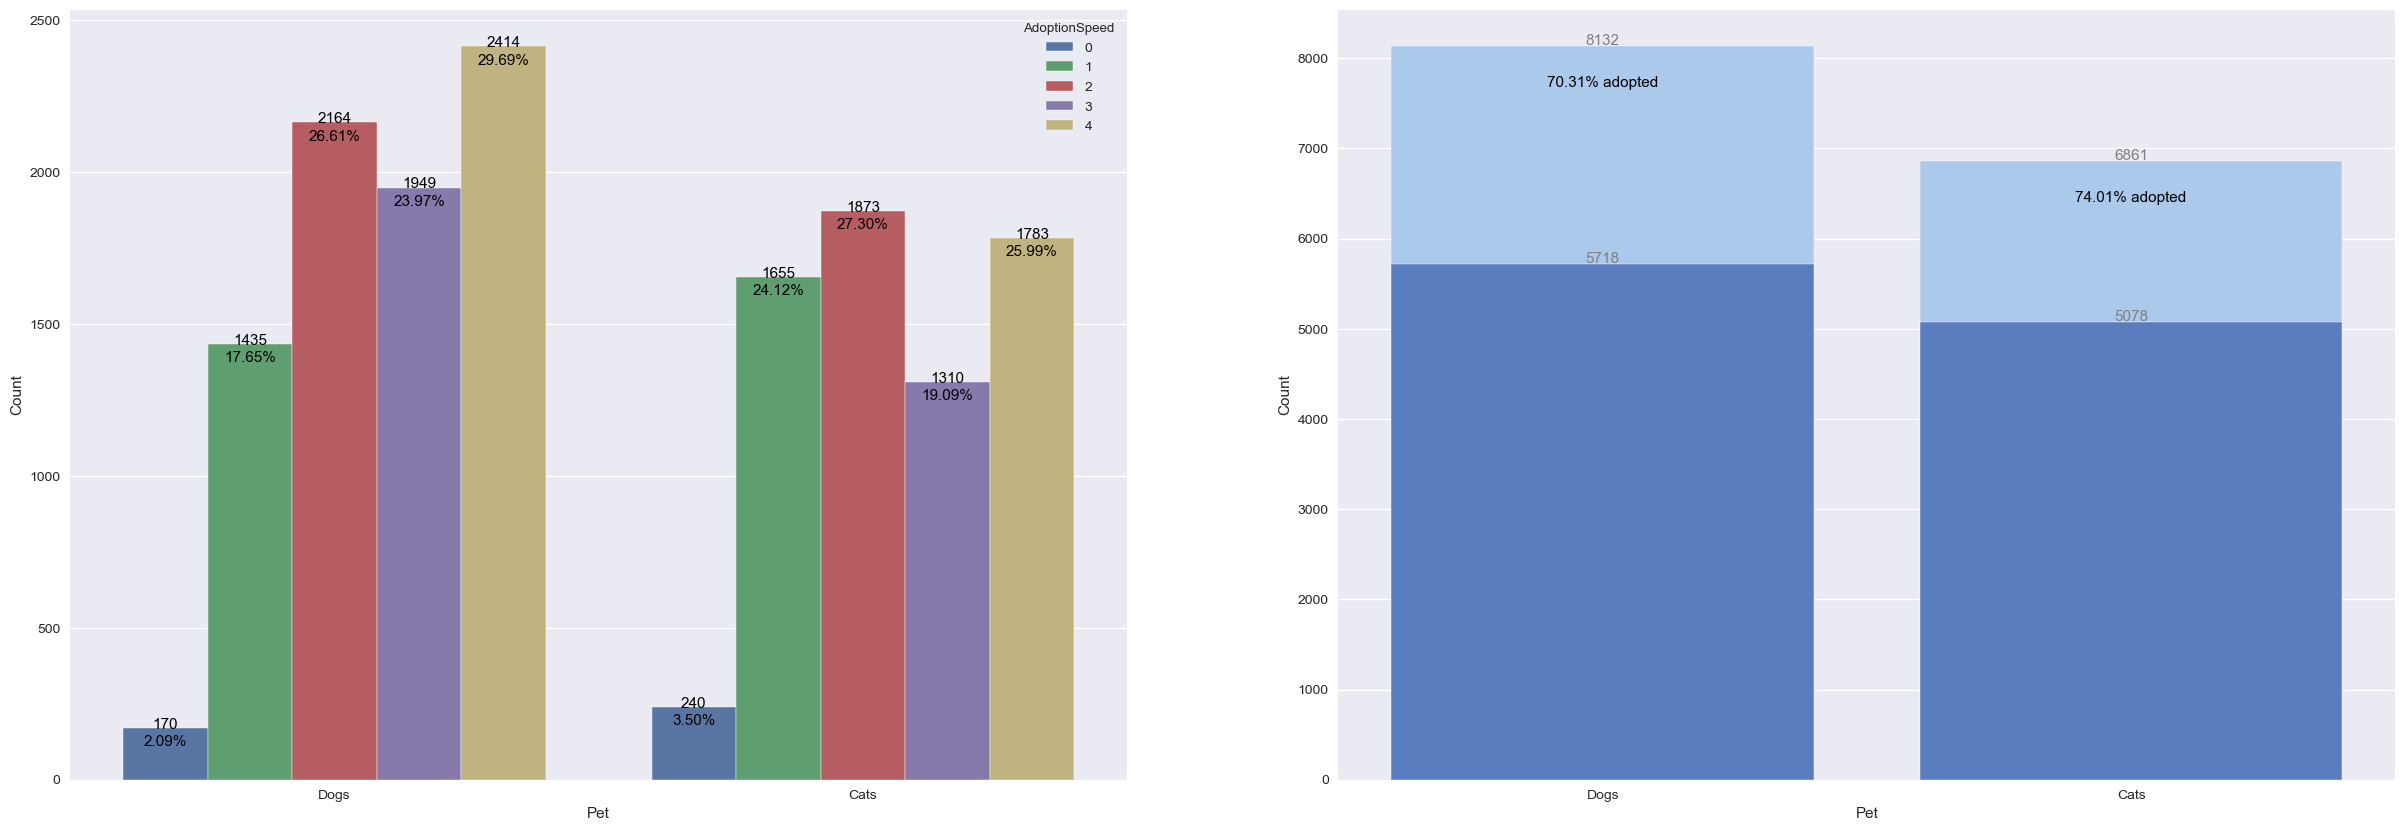

In [10]:
fig,ax=plt.subplots(1,2,figsize=(30,10))
ax[0]=sns.countplot(x='Type',hue='AdoptionSpeed',data=train_df,ax=ax[0])
ax[0].set(xlabel='Pet',ylabel='Count',xticklabels=(['Dogs','Cats']))
TypeP=[]

for i in range(1,3):
    TypeP.append((train_df['Type']==i).value_counts()[1])

for i,p in enumerate(ax[0].patches):
    ax[0].annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()-80),ha='center',va='center',fontsize=11,color='black',xytext=(0,20),textcoords='offset points')
    ax[0].annotate('%.2f%%' % (p.get_height()*100/TypeP[i%2]),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='center',fontsize=11,color='black',xytext=(0,-10),textcoords='offset points')

plt.legend(title='Adoption Speed',loc='upper left',labels=['Same Dat','1st Week','1st Month','2nd & 3rd Month','No Adoption'])

adopted=train_df[train_df['AdoptionSpeed']<=3]
dogsP=(adopted['Type']==1).value_counts()[1]/(train_df['Type'].value_counts()[1])
catsP=(adopted['Type']==2).value_counts()[1]/(train_df['Type'].value_counts()[2])
precent=[]
precent.append(dogsP)
precent.append(catsP)

sns.set_color_codes("pastel")
ax[1]=sns.countplot(x='Type',data=train_df,color='b',ax=ax[1])
for i,p in enumerate(ax[1].patches):
    ax[1].annotate('%.2f%% adopted'%(precent[i]*100),(p.get_x()+p.get_width()/2,p.get_height()-250),ha='center',va='center',fontsize=11,color='black',xytext=(0,-10),textcoords='offset points')

sns.set_color_codes('muted')
sns.countplot(x='Type',data=adopted,color='b')
ax[1].set(xlabel='Pet',ylabel='Count',xticklabels=['Dogs','Cats'])

for p in ax[1].patches:
    ax[1].annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()-250),ha='center',va='center',fontsize=11,color='gray',xytext=(0,20),textcoords='offset points')

plt.legend()

#Do people have a preference to adopt cats/dogs?
#It shows cats are adopted more quickly than dogs in the early adoption process with 8% difference between adoption of dogs and cats between 1st week and 1st month; but dogs were adopted more quickly than cats in the late adoption.
#In total 74% of Cats were adopted while only 70% of Dogs were adopted.
#Looks promissing, more than 70% of pets coming into the pet finder system gets adopted. There are a little more Dogs than Cats. However, Cats have a slightly higher chance of getting adopted.
#We can see that some pets were adopted immediately, but these are rare cases: maybe someone wanted to adopt any pet, or the pet was lucky to be seen by person, who wanted a similar pet.
#Not surprisingly enough, there is a slight linear relationship - the worse the situation (longer they are in the system), the higher the number. Interestingly cats are more likely to be adopted early than dogs. However, more dogs are adopted after several months.

TypeP=[]

for i in range(1,3):
    TypeP.append((train_df['Type']==i).value_counts()[1])

TypeP

#### 4.2 Pets with a Name Vs Pets without a Name

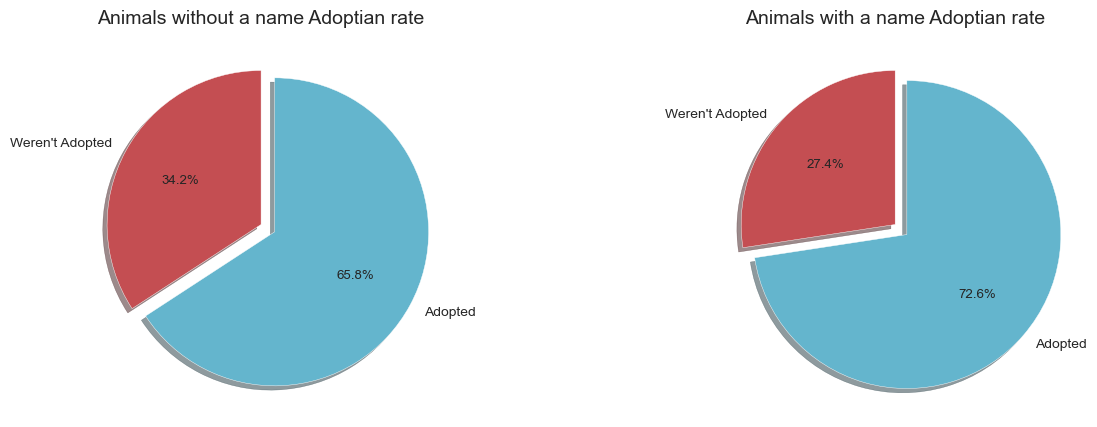

In [11]:
train_df['Name']=train_df['Name'].fillna('NULL')
noName_df=train_df.copy()
noName_df['Name']=train_df['Name'].replace({"No Name": "NULL", "No Name Yet": "NULL", "Unknown": "NULL"})
noName_df=noName_df[noName_df['Name']=='NULL']

noName_df['Name'].value_counts()

adoptedNoName=noName_df[noName_df['AdoptionSpeed']<=3]
adoptedNoNameCount=adoptedNoName.count()[1]
adoptedNoNamePercent=adoptedNoNameCount/noName_df.count()[1]

yesName_df=train_df.copy() 
yesName_df.drop(yesName_df.index[yesName_df['Name'] == "NULL"], inplace = True)
adoptedYesName=yesName_df[yesName_df['AdoptionSpeed']<=3]
adoptedYesNameCount=adoptedYesName.count()[1]
adoptedYesNamePercent=adoptedYesNameCount/yesName_df.count()[1]

fig1, ax1 = plt.subplots(1,2,figsize=(15,5))
explode = (0, 0.1)
labels = "Weren't Adopted" ,'Adopted'
ax1[0].set_title("Animals without a name Adoptian rate",fontsize=14)
ax1[0].pie([noName_df.count()[1]-adoptedNoNameCount,adoptedNoNameCount], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=['C2','C5'])

ax1[1].set_title("Animals with a name Adoptian rate",fontsize=14)
ax1[1].pie([yesName_df.count()[1]-adoptedYesNameCount,adoptedYesNameCount], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=['C2','C5'])


plt.show()

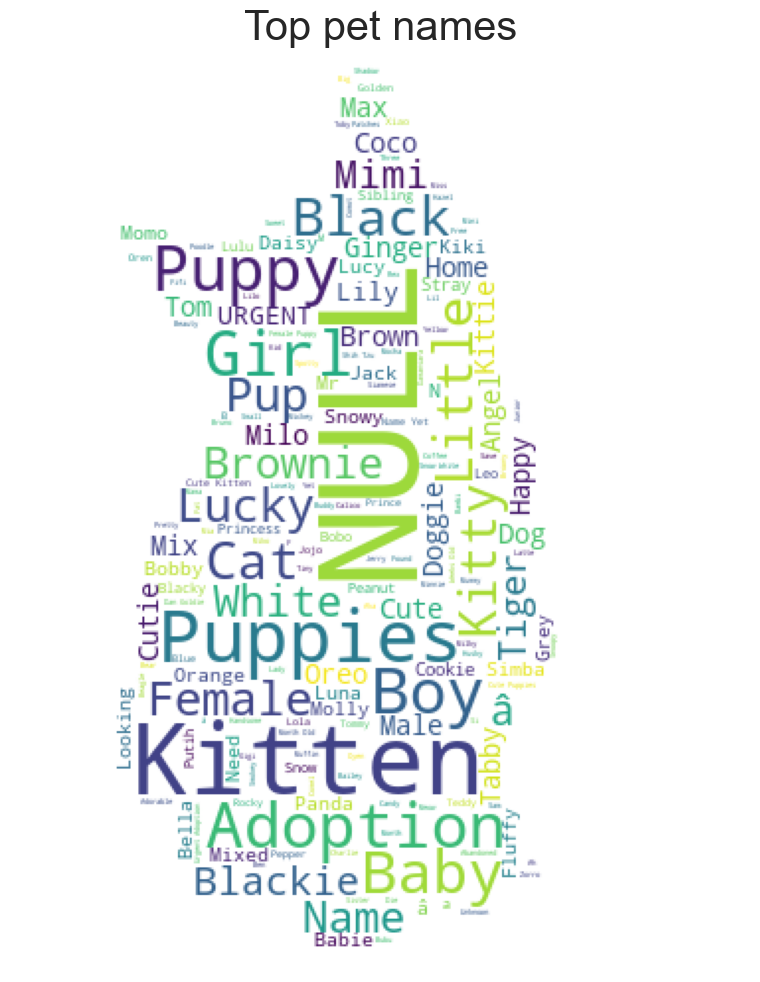

In [12]:
mask = np.array(Image.open(r'C:\Users\xy\Desktop\petfinder-adoption-prediction\Cat.jpg'))

plt.figure(figsize=(16,12))
text_pet=' '.join(train_df.loc[:,'Name'].fillna('').values)
wordcloud=WordCloud(background_color='white',width=mask.shape[1], height=mask.shape[0],mask=mask).generate(text_pet)
plt.imshow(wordcloud)
plt.title('Top pet names',fontsize=30)
plt.axis('off')

plt.show()

#Quite often people write simply who is there for adoption: "Pup", "Puppies"
#Very often the color of pet is written, sometimes gender
#And it seems that sometimes names can be strange or there is some info written instead of the name. Example: Urgent, Adoption

#### 4.3 Age Distribution by Type

[Text(0.5, 0, 'Age in Months'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Age Distribution')]

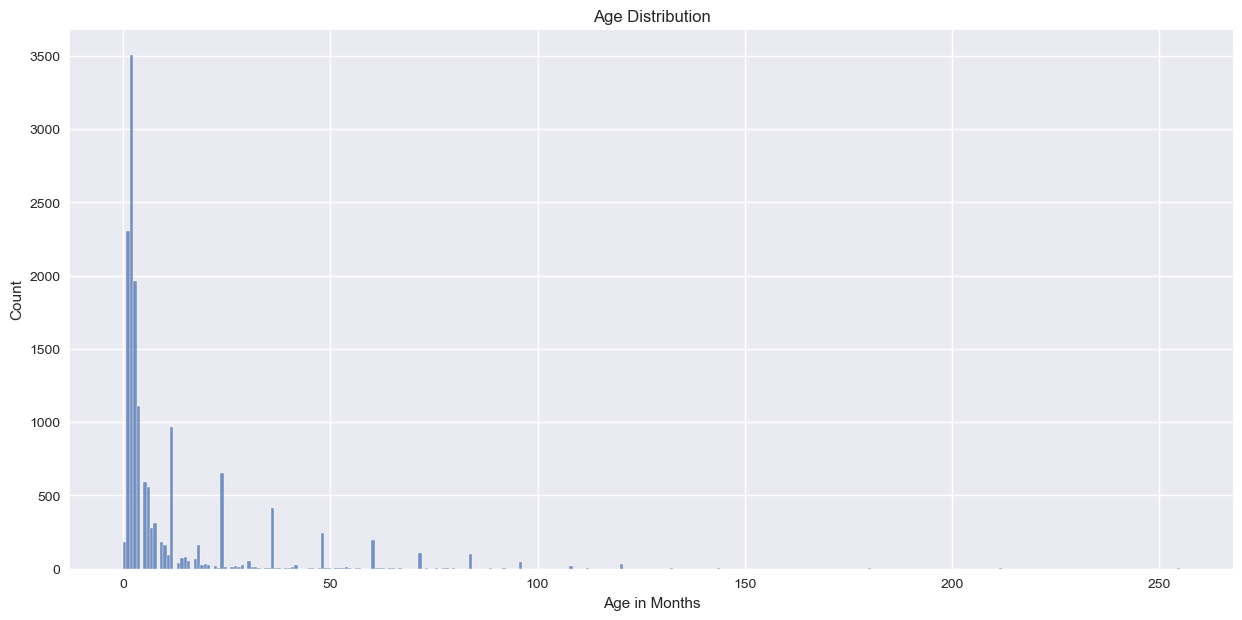

In [13]:
plt.figure(figsize=(15,7))
ax=sns.histplot(x='Age',data=train_df)
ax.set(xlabel='Age in Months',ylabel='Count',title='Age Distribution')

#most of the pets are quite young and there is bumps in the dataset every 12 months--guess that most of the stray pets doesn't have an exact birth date so people have to make an estimate of their age and it's easier to estimate in years and not in months.

<Figure size 2400x2000 with 0 Axes>

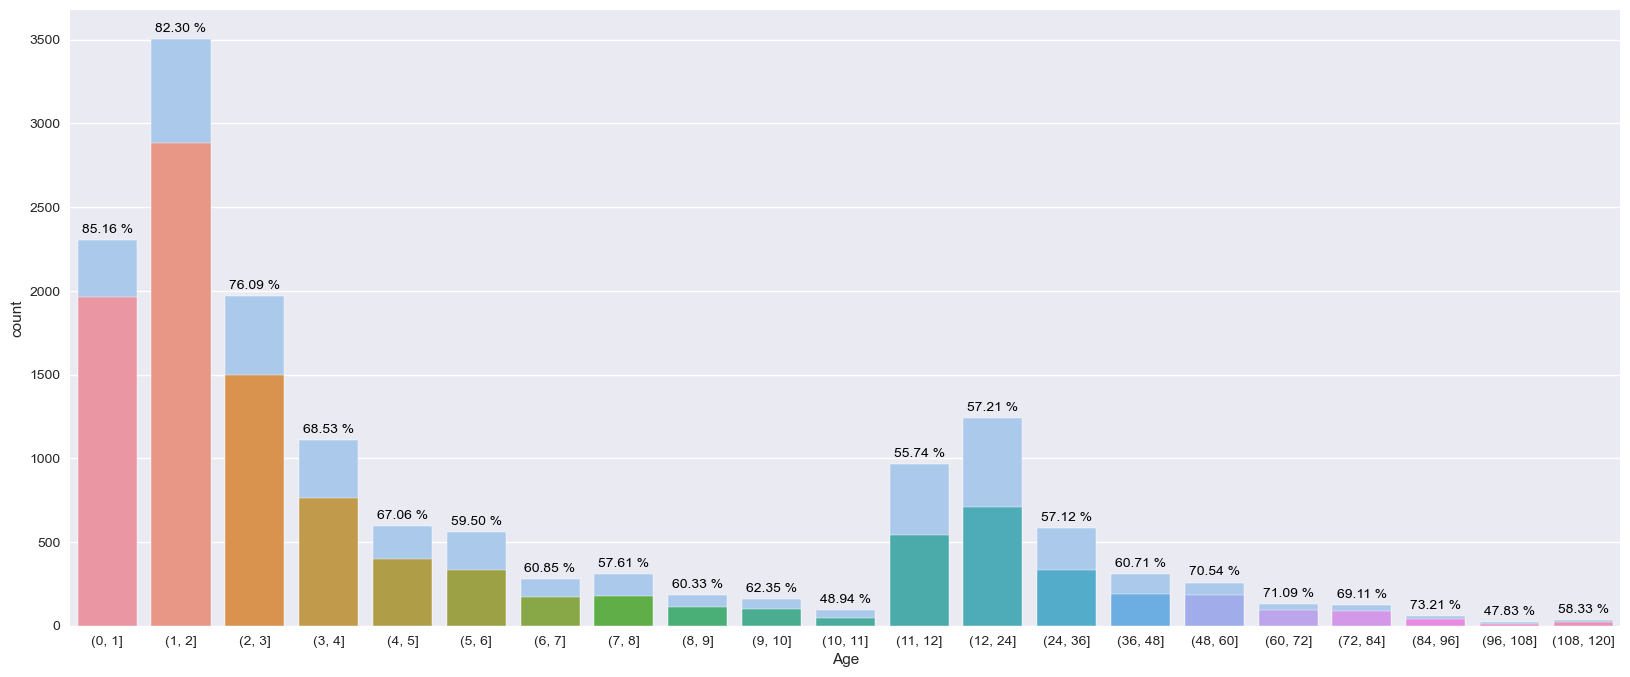

In [14]:
trainAge_df=train_df.copy()

trainAge_df.drop(trainAge_df[trainAge_df['Age'] >121].index, inplace=True)
plt.figure(figsize=(24, 20));

bins =[i  for i in range(0,13)]
for i in range(2,11):
    bins.append(i*12)

trainAge_df['Age'] = pd.cut(trainAge_df['Age'], bins)

adoptedAge01_df=trainAge_df.copy()
adoptedAge01_df['AdoptionSpeed'].replace(to_replace=[0,1,2,3],value=0,inplace=True)
adoptedAge01_df['AdoptionSpeed'].replace(to_replace=[4],value=1,inplace=True)

plt.figure(figsize=(20,8))
sns.set_color_codes('pastel')
ax=sns.countplot(x='Age',data=adoptedAge01_df,order=adoptedAge01_df['Age'].value_counts().sort_index(ascending=True).index,color='b')
adoptedAge0_df=adoptedAge01_df.loc[adoptedAge01_df['AdoptionSpeed']==0]
df=adoptedAge0_df['Age'].value_counts().sort_index(ascending=True)/adoptedAge01_df['Age'].value_counts().sort_index(ascending=True)
df=df.to_numpy()

for i,p in enumerate(ax.patches):
    ratio=df[i]
    ax.annotate('%.2f %%' % (ratio*100),(p.get_x()+p.get_width()/2,p.get_height()+20),ha='center',va='center',fontsize=10,color='black',xytext=(0,5),textcoords='offset points')
sns.set_color_codes('muted')
ax=sns.countplot(data=adoptedAge0_df, x="Age",order = adoptedAge01_df['Age'].value_counts().sort_index(ascending =True).index)

#Pets in age 1-3 has a really low adoption rate, after age 3 the adoptin rate picks up again .
#Guess is that the reason behind these adoption rate is that pets in age 1-3 are no longer considered "puppies\kittens" so they are less attractive but do need a lot of attention, compared to older dogs 3+ that considered adults and are more behaved.

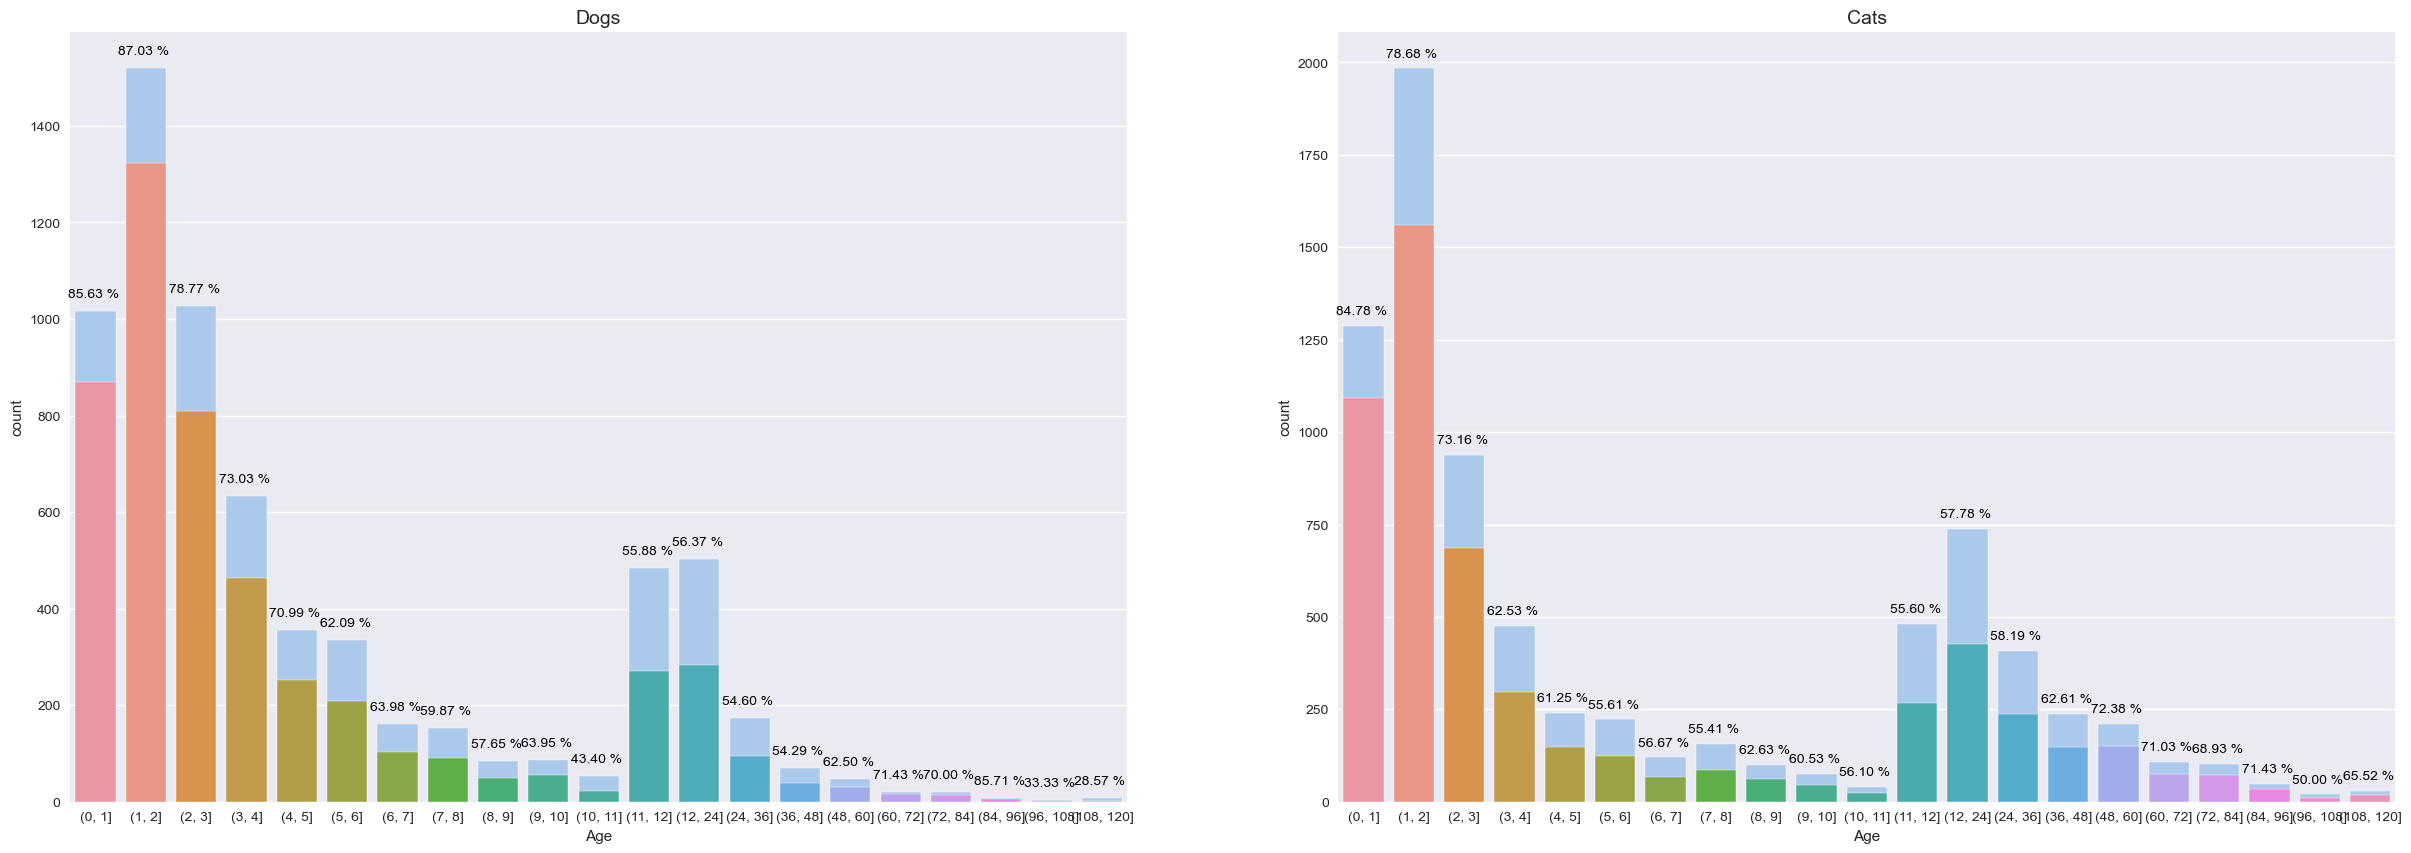

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

In [15]:
# adoption rate per Pet Type
fig, ax = plt.subplots(1,2,figsize=(30,10))
ax[0].set_title("Dogs",fontsize=14)
ax[1].set_title("Cats",fontsize=14)

adoptedAge01_df=trainAge_df.copy()

adoptedAge01_df['AdoptionSpeed'].replace(to_replace=[ 0, 1, 2 ,3 ],value=0,inplace=True)
adoptedAge01_df['AdoptionSpeed'].replace(to_replace=[ 4 ],value=1,inplace=True)

adoptedAge01_df.drop(adoptedAge01_df[adoptedAge01_df['Type'] ==1].index, inplace=True)

plt.figure(figsize=(20, 8));

sns.set_color_codes("pastel")
ax[0]=sns.countplot(data=adoptedAge01_df, x="Age",order = adoptedAge01_df['Age'].value_counts().sort_index(ascending =True).index,color='b',ax=ax[0])
adoptedAge0_df=adoptedAge01_df.loc[adoptedAge01_df['AdoptionSpeed']==0]

df=adoptedAge0_df['Age'].value_counts().sort_index(ascending =True)/adoptedAge01_df['Age'].value_counts().sort_index(ascending =True) # getting the right P%
df=df.to_numpy()

for i,p in enumerate(ax[0].patches):
    ratio = df[i]
    ax[0].annotate("%.2f %% " % (ratio*100)  , (p.get_x() + p.get_width() / 2., p.get_height()+20),ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')
    
sns.set_color_codes("muted")
ax[0]=sns.countplot(data=adoptedAge0_df, x="Age",order = adoptedAge01_df['Age'].value_counts().sort_index(ascending =True).index,ax=ax[0])

################# Cats


adoptedAge01_df=trainAge_df.copy()

adoptedAge01_df['AdoptionSpeed'].replace(to_replace=[ 0, 1, 2 ,3 ],value=0,inplace=True)
adoptedAge01_df['AdoptionSpeed'].replace(to_replace=[ 4 ],value=1,inplace=True)

adoptedAge01_df.drop(adoptedAge01_df[adoptedAge01_df['Type'] ==2].index, inplace=True)

plt.figure(figsize=(20, 8));

sns.set_color_codes("pastel")
ax[1]=sns.countplot(data=adoptedAge01_df, x="Age",order = adoptedAge01_df['Age'].value_counts().sort_index(ascending =True).index,color='b',ax=ax[1])
adoptedAge0_df=adoptedAge01_df.loc[adoptedAge01_df['AdoptionSpeed']==0]



df=adoptedAge0_df['Age'].value_counts().sort_index(ascending =True)/adoptedAge01_df['Age'].value_counts().sort_index(ascending =True) # getting the right P%
df=df.to_numpy()


for i,p in enumerate(ax[1].patches):
    ratio = df[i]
    ax[1].annotate("%.2f %% " % (ratio*100)  , (p.get_x() + p.get_width() / 2., p.get_height()+20),ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')
    
sns.set_color_codes("muted")
ax[1]=sns.countplot(data=adoptedAge0_df, x="Age",order = adoptedAge01_df['Age'].value_counts().sort_index(ascending =True).index,ax=ax[1])

#a young age for a dog is more important than a young age for a cat, in the first 3 months dogs had a higher rate of adoption by 9% in totall compared to cats, while cats have a better adoption rate across the later years.

#### 4.3 Breed

In [16]:
print(breeds.info())
print(train_df[train_df['Type']==1]['Breed1'].value_counts())
print(train_df[train_df['Type']==2]['Breed1'].value_counts())

#we have 307 different breeds for dogs and cats in total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BreedID    307 non-null    int64 
 1   Type       307 non-null    int64 
 2   BreedName  307 non-null    object
dtypes: int64(2), object(1)
memory usage: 7.3+ KB
None
307    5923
141     205
205     189
179     167
218     161
       ... 
154       1
192       1
64        1
139       1
81        1
Name: Breed1, Length: 116, dtype: int64
266    3634
265    1258
299     342
264     296
292     264
       ... 
257       1
0         1
290       1
114       1
287       1
Name: Breed1, Length: 68, dtype: int64


In [17]:
sum(train_df['Breed2'].value_counts())
a=10726/14993
a

0.71540052024278

240    Mixed Breed
Name: BreedName, dtype: object
266    Domestic Short Hair
Name: BreedName, dtype: object
265    Domestic Medium Hair
Name: BreedName, dtype: object
299    Tabby
Name: BreedName, dtype: object
264    Domestic Long Hair
Name: BreedName, dtype: object
292    Siamese
Name: BreedName, dtype: object
285    Persian
Name: BreedName, dtype: object
140    Labrador Retriever
Name: BreedName, dtype: object
204    Shih Tzu
Name: BreedName, dtype: object
178    Poodle
Name: BreedName, dtype: object
217    Terrier
Name: BreedName, dtype: object
108    Golden Retriever
Name: BreedName, dtype: object
254    Calico
Name: BreedName, dtype: object


[Text(0, 0, 'Golden Retriever'),
 Text(1, 0, 'Labrador Retriever'),
 Text(2, 0, 'Poodle'),
 Text(3, 0, 'Shih Tzu'),
 Text(4, 0, 'Terrier'),
 Text(5, 0, 'Calico'),
 Text(6, 0, 'Domestic Long Hair'),
 Text(7, 0, 'Domestic Medium Hair'),
 Text(8, 0, 'Domestic Short Hair'),
 Text(9, 0, 'Persian'),
 Text(10, 0, 'Siamese'),
 Text(11, 0, 'Tabby'),
 Text(12, 0, 'Mixed Breed')]

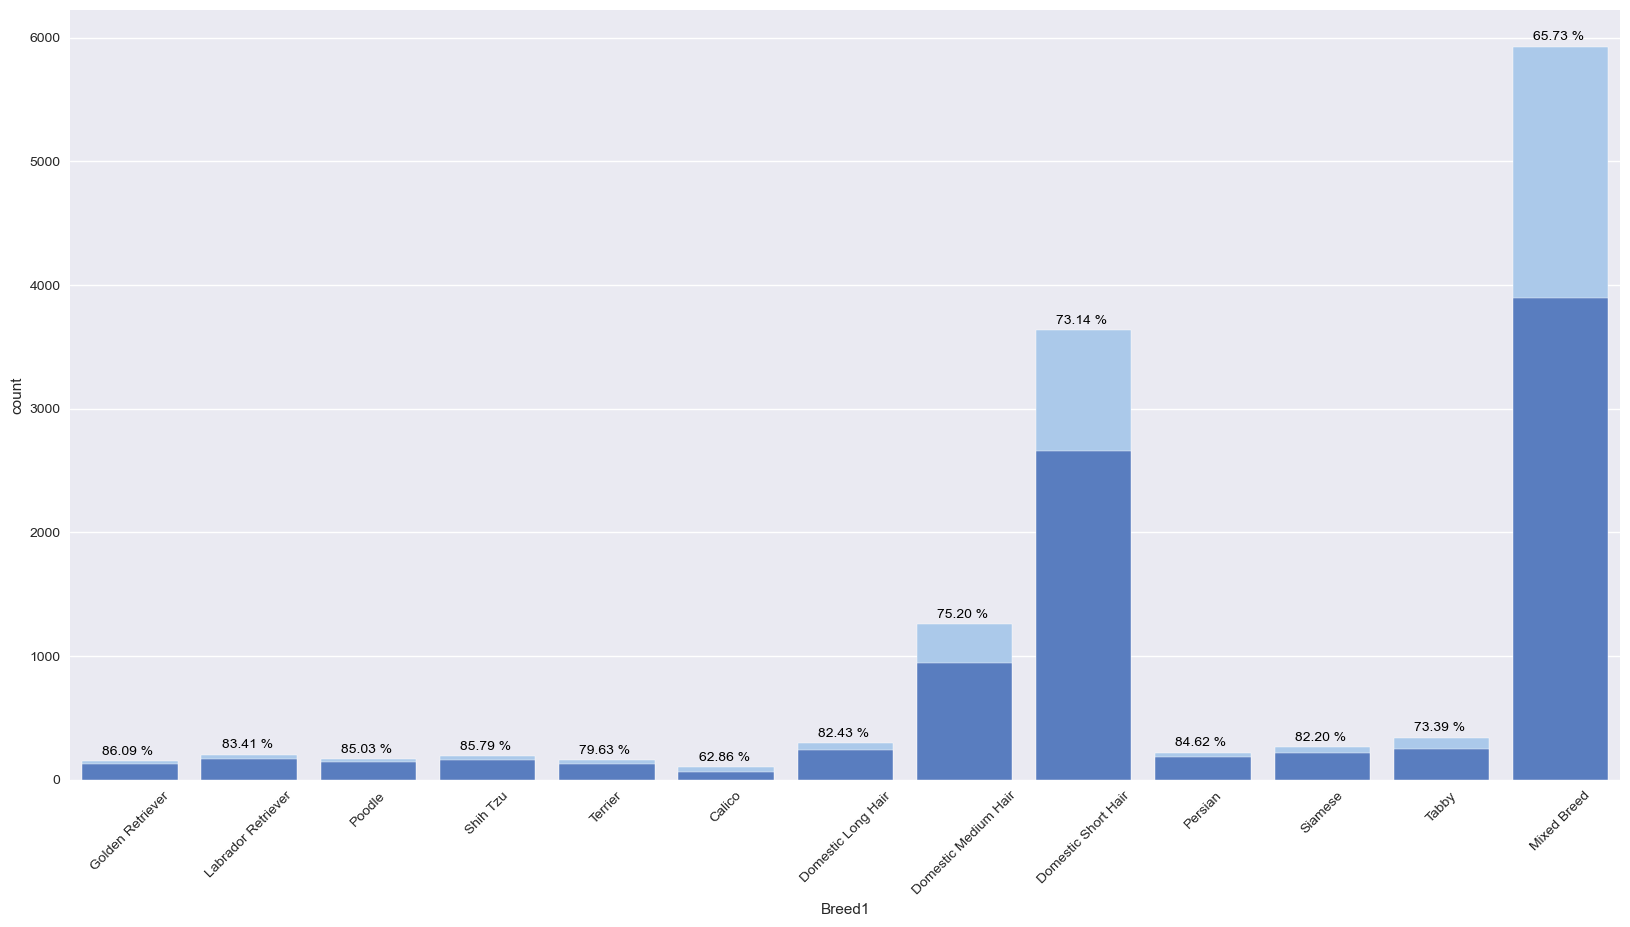

In [18]:
#Adoption Rate of popular Breeds
#only dog has mixed breed
a=train_df.copy()
counts = a['Breed1'].value_counts()
counts[counts>100]
a=a[a['Breed1'].isin(counts[counts > 100].index)]
popBreeds=a['Breed1'].value_counts().index
BreedNames=[]
for i in popBreeds:
    print(breeds[breeds['BreedID']==i]['BreedName']) # Mixed Dog
plt.figure(figsize=(20, 10))

sns.set_color_codes("pastel")
ax=sns.countplot(data=a, x="Breed1",order = a['Breed1'].value_counts().sort_index(ascending =True).index,color='b')
a0=a.loc[a['AdoptionSpeed']!=4]

df=a0['Breed1'].value_counts().sort_index(ascending =True)/a['Breed1'].value_counts().sort_index(ascending =True) # getting the right P%
df=df.to_numpy()

for i,p in enumerate(ax.patches):
    ratio = df[i]
    ax.annotate("%.2f %% " % (ratio*100)  , (p.get_x() + p.get_width() / 2., p.get_height()+20),ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')
    
sns.set_color_codes("muted")
ax=sns.countplot(data=a0, x="Breed1",order = a['Breed1'].value_counts().sort_index(ascending =True).index, color='b')

ax.set_xticklabels(['Golden Retriever','Labrador Retriever','Poodle','Shih Tzu','Terrier','Calico','Domestic Long Hair','Domestic Medium Hair','Domestic Short Hair','Persian','Siamese','Tabby','Mixed Breed'],rotation=45)

In [19]:
print(breeds[breeds['BreedID']==307]['BreedName']) # Mixed Dog
print(breeds[breeds['BreedID']==266]['BreedName']) # Domestic short Hair Cat
print(breeds[breeds['BreedID']==265]['BreedName']) # Domestic Medium Hair Cat
print(breeds[breeds['BreedID']==264]['BreedName']) # Domestic Long Hair Cat

#Mixed Dogs - Dogs with mixed Breed
#Pure Dogs - Dogs with a pure Breed (taking all different Breeds into one category)
#Pure Cars - Cats with a Pure Breed
#Domestin Short Hair Cats - Domestic short-haired cat is a cat of mixed ancestry—thus not belonging to any particular recognised cat breed
#Domestin Medium Hair Cats
#Domestin Hair Cats

240    Mixed Breed
Name: BreedName, dtype: object
266    Domestic Short Hair
Name: BreedName, dtype: object
265    Domestic Medium Hair
Name: BreedName, dtype: object
264    Domestic Long Hair
Name: BreedName, dtype: object


In [20]:
dogBreedsMixed_df=train_df[(train_df['Breed1']==307)& (train_df['Type']== 1)] #this is a df with only the mixed breeds dogs
dogBreedsMixed_df['Breed1']='Mixed Dogs'
dogBreedsPure_df=train_df[(train_df['Breed1']!=307) & (train_df['Type']== 1)] #this is a df with only the Pure breeds dogs

dogBreedsPure_df['Breed1']='PureDogs'

catBreedsPure_df=train_df[(train_df['Breed1']!=266) & (train_df['Breed1']!=265) & (train_df['Breed1']!=264) & (train_df['Type']== 2)  ] #this is a df with Pure Breeds Cats
catBreedsPure_df['Breed1']='PureCats'

catShortHair_df=train_df[(train_df['Breed1']==266) & (train_df['Type']== 2)]# Domestic Short Hair Cats
catShortHair_df['Breed1']='Domestic Short Hair Cats'
catMediumHair_df=train_df[(train_df['Breed1']==265) & (train_df['Type']== 2)]#Domestic Medium Hair Cats
catMediumHair_df['Breed1']='Domestic Medium Hair Cats'
catLongHair_df=train_df[(train_df['Breed1']==264) & (train_df['Type']== 2)]# Domestic Long Hair Cats
catLongHair_df['Breed1']='Domestic Long Hair Cats'

Breeds_df=dogBreedsMixed_df.copy() #combining all dataframes to one 
Breeds_df=Breeds_df.append(dogBreedsPure_df)
Breeds_df=Breeds_df.append(catBreedsPure_df)
Breeds_df=Breeds_df.append(catShortHair_df)
Breeds_df=Breeds_df.append(catMediumHair_df)
Breeds_df=Breeds_df.append(catLongHair_df)

BreedsAdopted_df=Breeds_df[Breeds_df['AdoptionSpeed']<=3] #df of all the adopted animals
BreedsP=BreedsAdopted_df['Breed1'].value_counts() /Breeds_df['Breed1'].value_counts() #get the precent of adoption per Breed

Text(0.5, 0, 'Breed')

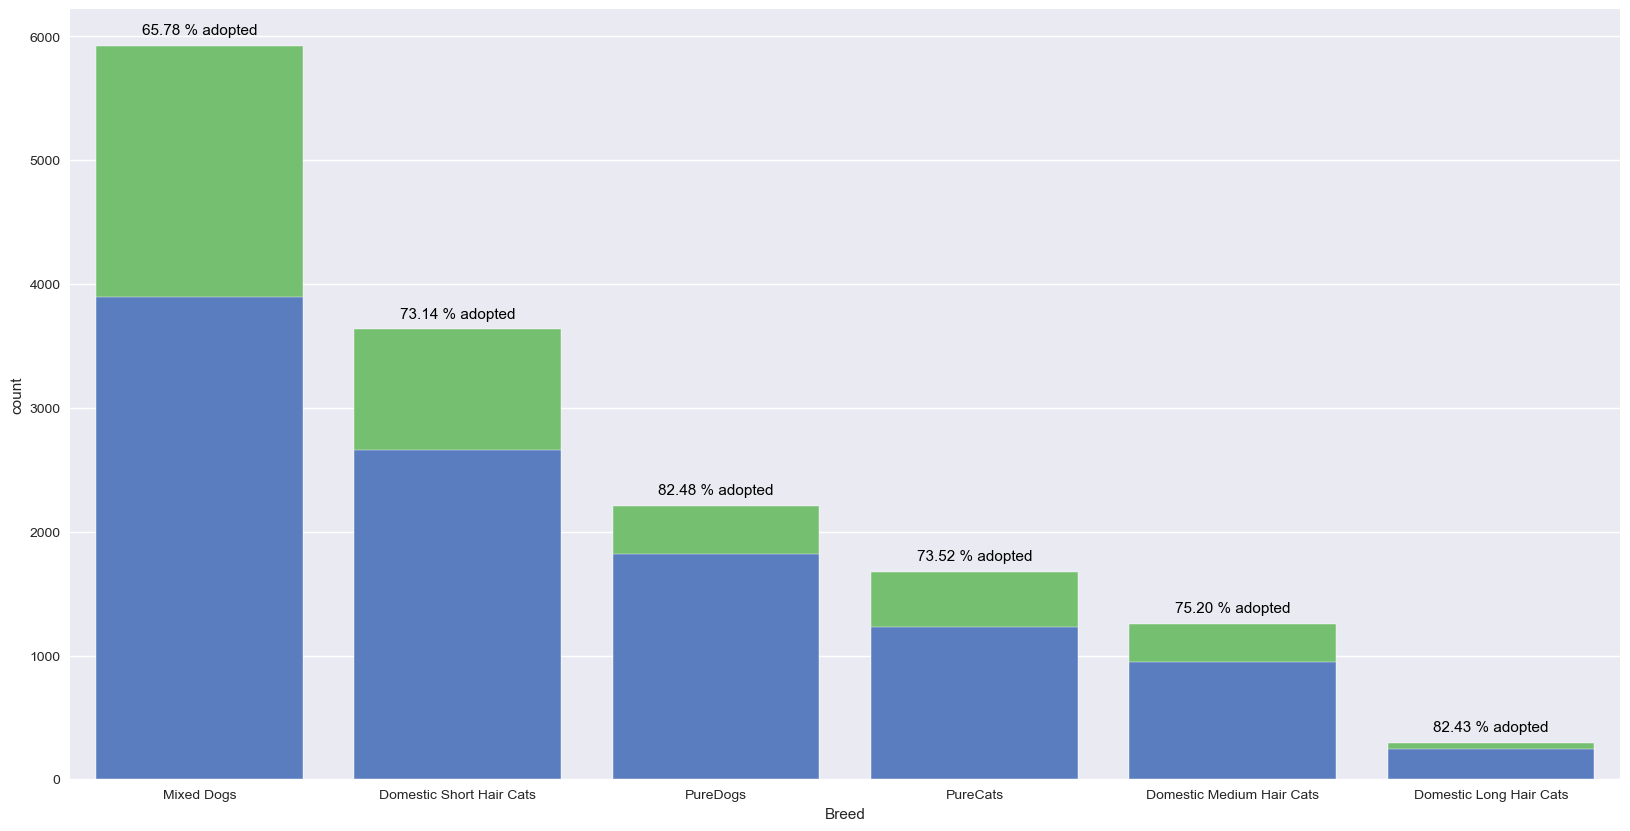

In [21]:
plt.figure(figsize=(20, 10));

ax=sns.countplot(x="Breed1", data=Breeds_df,color='g',order = Breeds_df['Breed1'].value_counts().index)
for i,p in enumerate(ax.patches):
    ax.annotate("%.2f %% adopted" % (BreedsP[i]*100) , (p.get_x() + p.get_width() / 2., p.get_height()-100),ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),textcoords='offset points')

ax=sns.countplot(x="Breed1", data=BreedsAdopted_df,color='b',order = Breeds_df['Breed1'].value_counts().index)
plt.xlabel('Breed')

#PureDogs and Domestic Short Hair Cats are leading in adoptation percentage
#There is a 16% difference in Adoptation percentage between Pure Dogs and Mixed Dogs

#### 4.4 Gender

In [22]:
train_df['Gender'].value_counts()

#We have 5536 Male Pets, 7277 Female Pets and 2180 Mixed Pets-a group of pets

2    7277
1    5536
3    2180
Name: Gender, dtype: int64

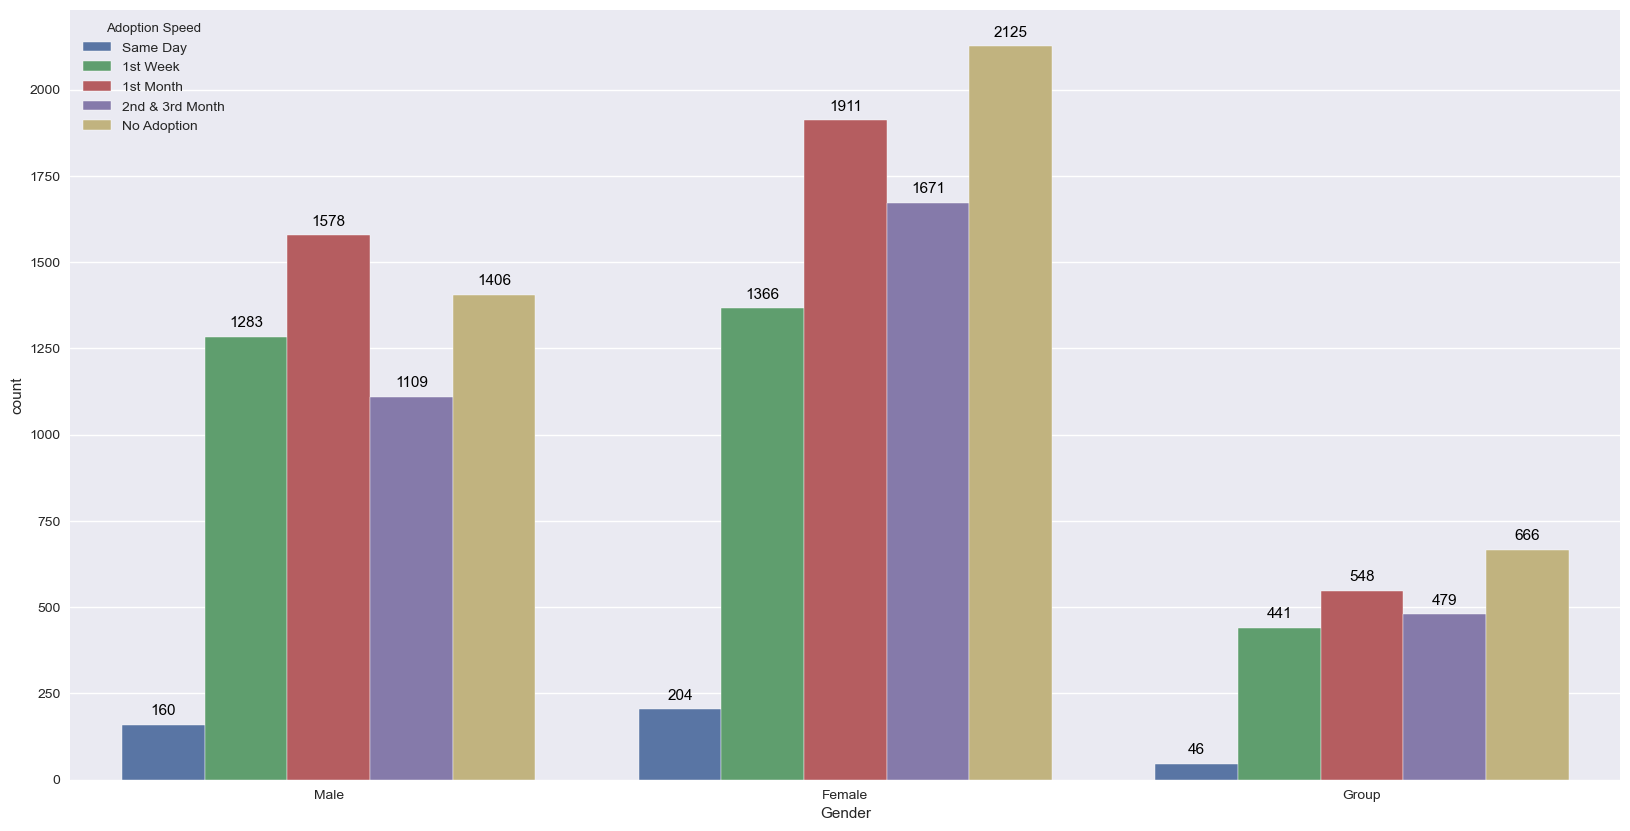

In [23]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='Gender',hue='AdoptionSpeed',data=train_df)
ax.set_xticklabels(['Male','Female','Group'])
plt.legend(title='Adoption Speed',loc='upper left',labels=['Same Day','1st Week','1st Month','2nd & 3rd Month','No Adoption'])
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='center',fontsize=11,color='black',xytext=(0,10),textcoords='offset points')


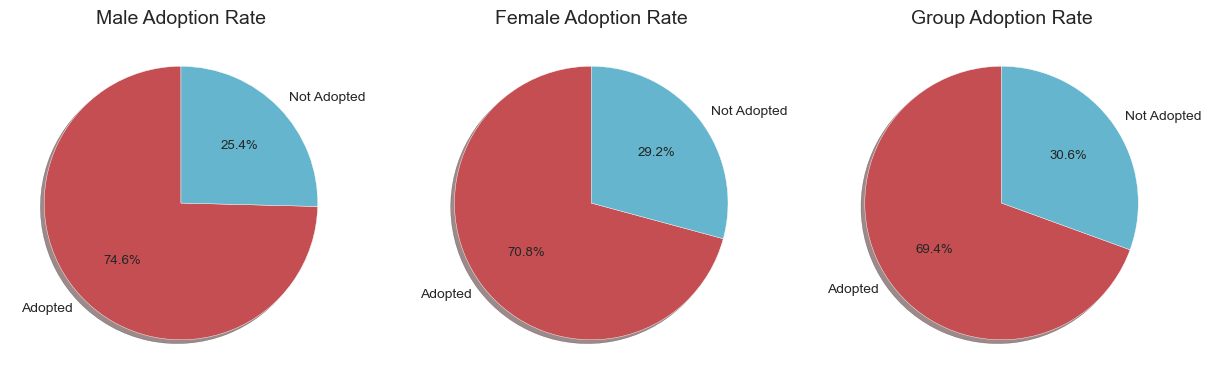

In [24]:
adopted_df=train_df.copy()
adopted_df['AdoptionSpeed'].replace(to_replace=[0,1,2,3],value='Yes',inplace=True)
adopted_df['AdoptionSpeed'].replace(to_replace=[4],value='No',inplace=True)
fig1,ax1=plt.subplots(1,3,figsize=(15,5))
explode=(0,0.1)
labels='Adopted','Not Adopted'
ax1[0].set_title('Male Adoption Rate',fontsize=14)
ax1[1].set_title('Female Adoption Rate',fontsize=14)
ax1[2].set_title('Group Adoption Rate',fontsize=14)
ax1[0].pie([adopted_df[(adopted_df['Gender']==1) & (adopted_df['AdoptionSpeed']=='Yes')].count()[0],adopted_df[(adopted_df['Gender']==1) & (adopted_df['AdoptionSpeed']=='No')].count()[0]], autopct='%1.1f%%',shadow=True, startangle=90,colors=['C2','C5'],labels=labels)
ax1[1].pie([adopted_df[(adopted_df['Gender']==2) & (adopted_df['AdoptionSpeed']=='Yes')].count()[0],adopted_df[(adopted_df['Gender']==2) & (adopted_df['AdoptionSpeed']=='No')].count()[0]], autopct='%1.1f%%',shadow=True, startangle=90,colors=['C2','C5'],labels=labels)
ax1[2].pie([adopted_df[(adopted_df['Gender']==3) & (adopted_df['AdoptionSpeed']=='Yes')].count()[0],adopted_df[(adopted_df['Gender']==3) & (adopted_df['AdoptionSpeed']=='No')].count()[0]], autopct='%1.1f%%',shadow=True, startangle=90,colors=['C2','C5'],labels=labels)
plt.show()

#Males are adopted more quickly than Femals and Groups, we can see that the mass of Male posts is sitting around adoption 1-2 compared to females where it is 2-4
#Male Adoption rate is higher in 3.8% than females and 5.2% than groups.
#groups are indeed more challenging to adopt

#### 4.5 Color

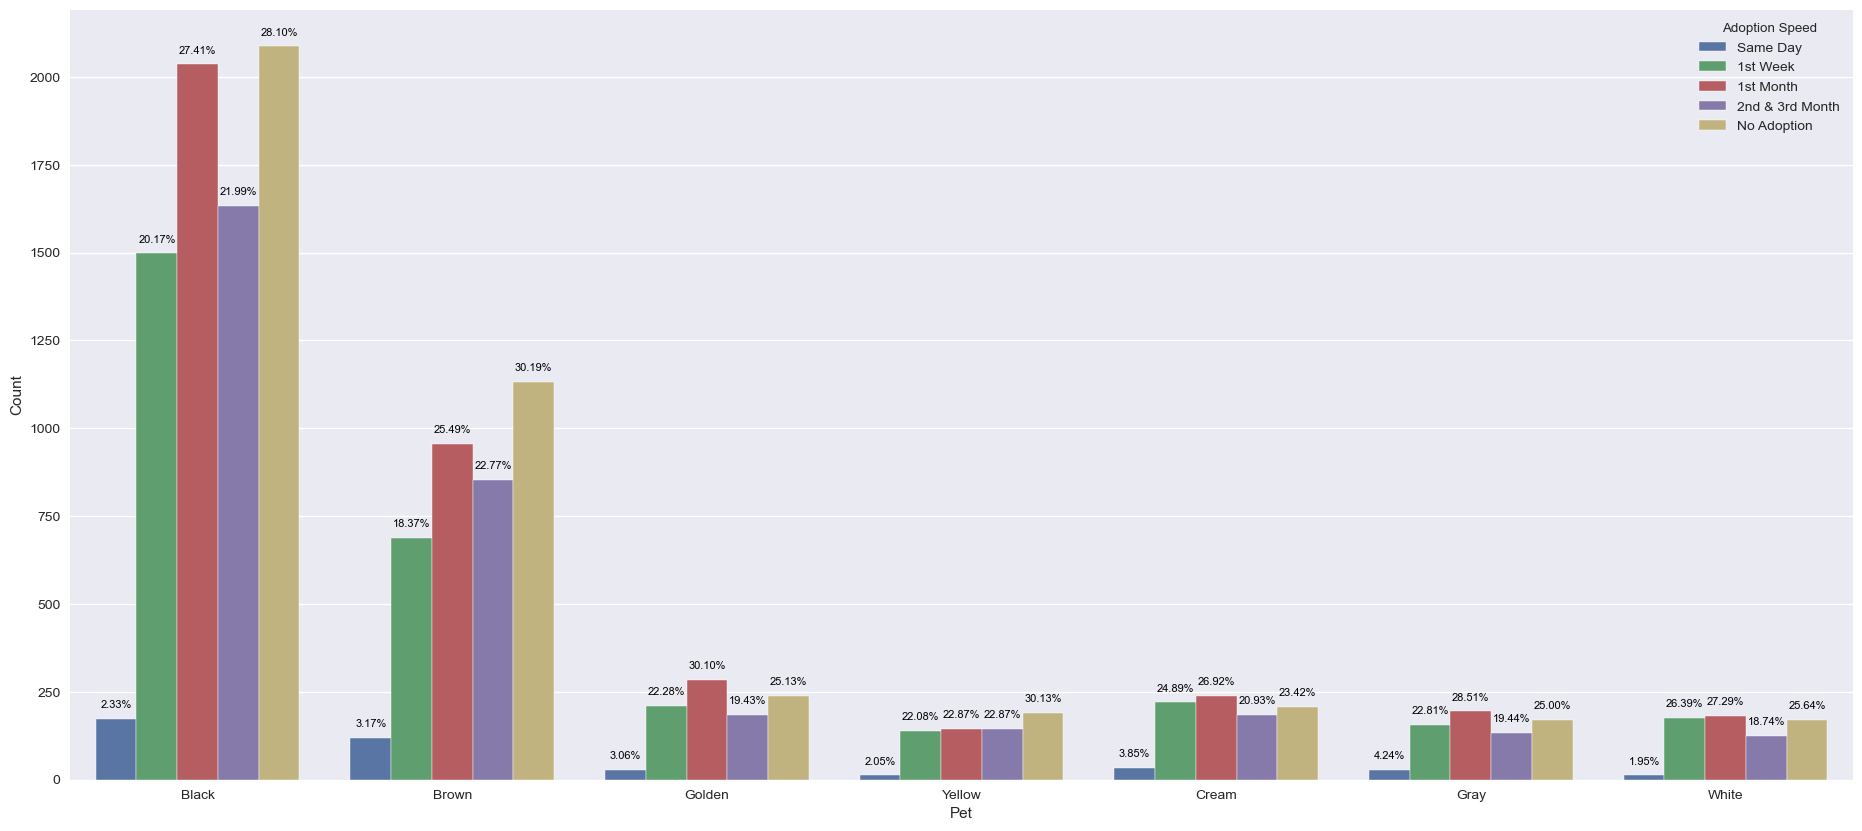

In [25]:
plt.figure(figsize=(23,10))
ax=sns.countplot(x='Color1',hue='AdoptionSpeed',data=train_df)
ax.set(xlabel='Pet',ylabel='Count',xticklabels=['Black','Brown','Golden','Yellow','Cream','Gray','White'])
colorP=[]
for i in range(1,8):
    colorP.append((train_df['Color1']==i).value_counts()[1])
for i,p in enumerate(ax.patches):
    ax.annotate('%.2f%%'%(p.get_height()*100/colorP[i%7]),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='center',fontsize=8,color='black',xytext=(0,10),textcoords='offset points')
plt.legend(title='Adoption Speed', loc='upper right', labels=['Same Day', '1st Week','1st Month','2nd & 3rd Month','No Adoption'])

#black pets are dominating with 72% adoption rate; borwn and yellow colors has lower adoption rate of 70% while the most liked color is Cream with 77% adoption rate
#colors are important but Golden color cat is different than a Golden Color Dog

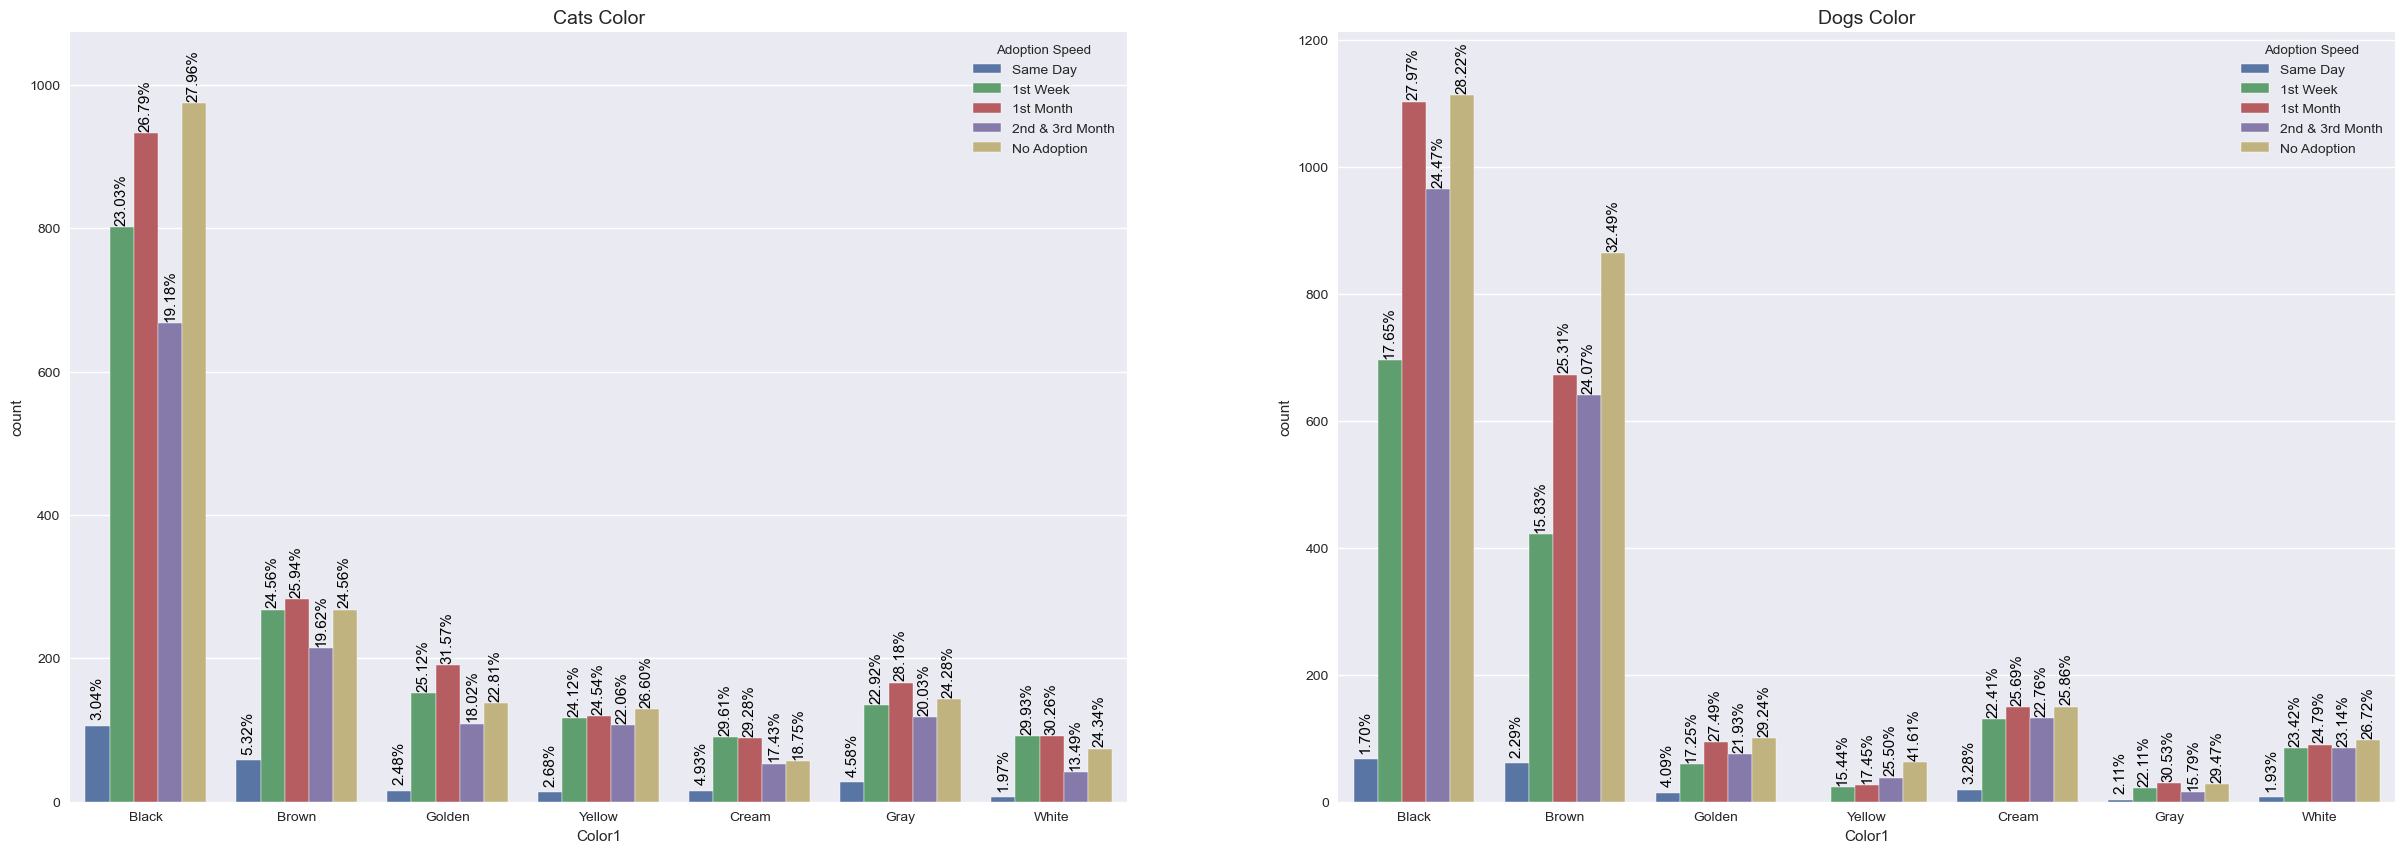

In [26]:
# color difference between dogs and cats
fig, ax = plt.subplots(1,2,figsize=(30,10))
ax[0].set_title("Cats Color",fontsize=14)
ax[1].set_title("Dogs Color",fontsize=14)

trainCats_df=train_df.copy()
trainCats_df.drop(trainCats_df[trainCats_df['Type'] ==1].index, inplace=True)

ax[0]=sns.countplot(data=trainCats_df, x="Color1",hue='AdoptionSpeed',ax=ax[0])
colorP=[]
for i in range(1,8):
    colorP.append((trainCats_df['Color1']==i).value_counts()[1])

max=0
for i,p in enumerate(ax[0].patches):
    ax[0].annotate("%.2f%%" % (p.get_height() *100  / colorP[i%7]) , (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', fontsize=11, color='black', rotation=90, xytext=(0, 20),textcoords='offset points') 
    if p.get_height()>max:
        max=p.get_height()

ax[0].set_xticklabels(["Black","Brown","Golden","Yellow","Cream","Gray","White"])
ax[0].set_ylim(0,max+100)

###########Dogs

trainDogs_df=train_df.copy()
trainDogs_df.drop(trainDogs_df[trainDogs_df['Type'] ==2].index, inplace=True)
    
ax[1]=sns.countplot(data=trainDogs_df, x='Color1',hue='AdoptionSpeed',ax=ax[1])
colorP=[]

for i in range(1,8):
    colorP.append((trainDogs_df['Color1']==i).value_counts()[1])

max=0
for i,p in enumerate(ax[1].patches):
    ax[1].annotate("%.2f%%" % (p.get_height() *100  / colorP[i%7]) , (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', fontsize=11, color='black', rotation=90, xytext=(0, 20),textcoords='offset points')
    if p.get_height()>max:
        max=p.get_height()
ax[1].set_xticklabels(["Black","Brown","Golden","Yellow","Cream","Gray","White"])
ax[1].set_ylim(0,max+100)

ax[0].legend(title='Adoption Speed', loc='upper right', labels=['Same Day', '1st Week','1st Month','2nd & 3rd Month','No Adoption'])
ax[1].legend(title='Adoption Speed', loc='upper right', labels=['Same Day', '1st Week','1st Month','2nd & 3rd Month','No Adoption'])

#while cats adoption rate stay somewhat consistent Dogs on the other hand are more effected by the main color. Brown dogs have 65% adoption rate, compared to 75% in cats. Yellow Dogs have 59% adoptin rate compare to 74% in cats.
#Color 2 and Color 3 will be ignored and just use Color 1
#It's possible to explore them and make a column that will represent one colored pets and two or tri-colored pets.

#### 4.6 MaturitySize

train_df[train_df['MaturitySize']==0]

[Text(0, 0, 'Small'),
 Text(1, 0, 'Medium'),
 Text(2, 0, 'Large'),
 Text(3, 0, ' Extra Large')]

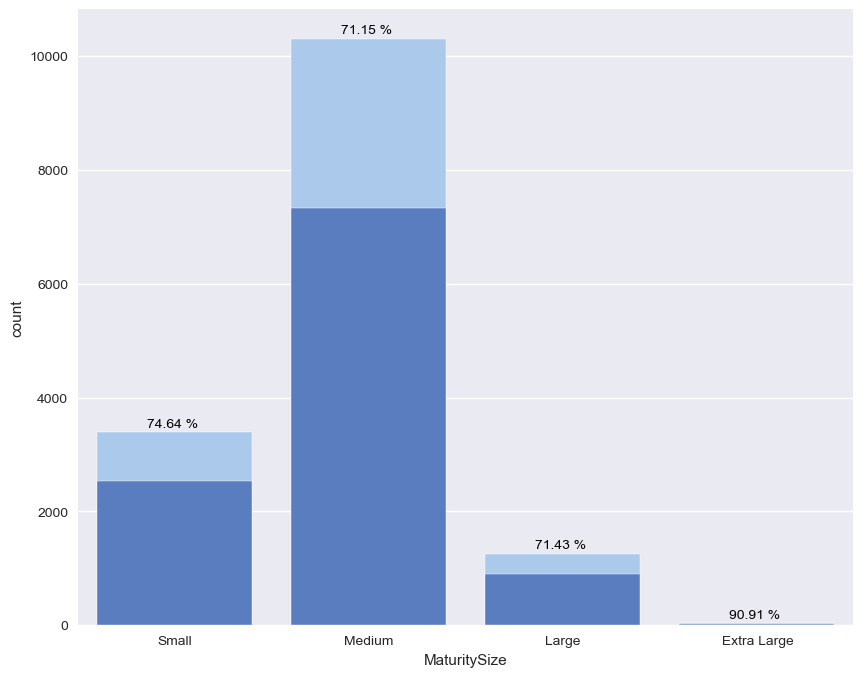

In [27]:
plt.figure(figsize=(10, 8))
adoptedYes_df=adopted_df.loc[adopted_df['AdoptionSpeed']=='Yes'] # all adopted pets

sns.set_color_codes("pastel")
ax=sns.countplot(x="MaturitySize", data=adopted_df, color='b',order = adopted_df['MaturitySize'].value_counts().sort_index(ascending =True).index) #plot all the pets by MaturitySize

df=adoptedYes_df['MaturitySize'].value_counts().sort_index(ascending =True)/adopted_df['MaturitySize'].value_counts().sort_index(ascending =True) # getting the right P%
df=df.to_numpy()

for i,p in enumerate(ax.patches):
    ratio = df[i]
    ax.annotate("%.2f %% " % (ratio*100)  , (p.get_x() + p.get_width() / 2., p.get_height()+20),ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')
        
sns.set_color_codes("muted")
sns.countplot(x="MaturitySize", data=adoptedYes_df ,color='b',order = adopted_df['MaturitySize'].value_counts().sort_index(ascending =True).index) # plot only the adopted by MaturitySize
ax.set_xticklabels(["Small","Medium", "Large"," Extra Large"])

#Small Pets have an advantage of 4% adoptation rate from Medium and Large, while extra large have 91% adoption rate, well it doesnt tell us much because Extra large pets are only 0.22% of our database.

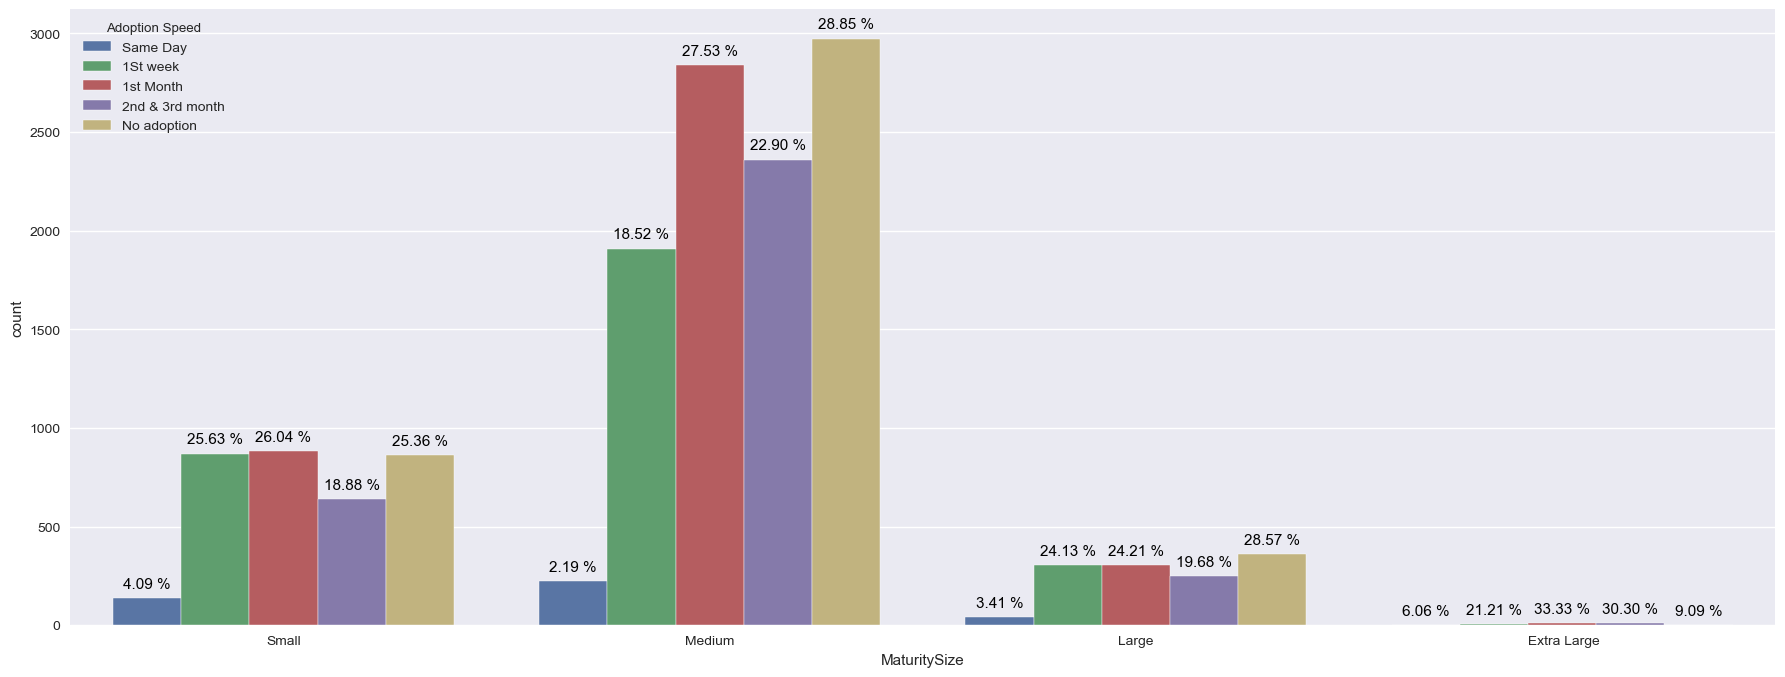

In [28]:
MaturitySizeP=[]
MaturitySizeP.append((train_df['MaturitySize']==1).value_counts()[1])
MaturitySizeP.append((train_df['MaturitySize']==2).value_counts()[1])
MaturitySizeP.append((train_df['MaturitySize']==3).value_counts()[1])
MaturitySizeP.append((train_df['MaturitySize']==4).value_counts()[1])
plt.figure(figsize=(22, 8))
ax=sns.countplot(data=train_df, x="MaturitySize",hue='AdoptionSpeed')
plt.legend(title='Adoption Speed', loc='upper left', labels=['Same Day', '1St week','1st Month','2nd & 3rd month','No adoption'])

ax.set_xticklabels(["Small","Medium", "Large"," Extra Large"])

for i,p in enumerate(ax.patches):
     ax.annotate("%.2f %%" % (p.get_height() *100/MaturitySizeP[i%4]) ,(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',fontsize=11,color='black',xytext=(0, 10),textcoords='offset points')

#around 55.6% small pets are adopted after a month or less
#48.2% of Medium sized pets a are dopted after a month or less.
#51.7% of Large sized pets are adopted after a month or less.
#seems like small pets are adopted faster than the rest.

#### 4.6 FurLength

[Text(0, 0, 'Short'), Text(1, 0, 'Medium'), Text(2, 0, 'Long')]

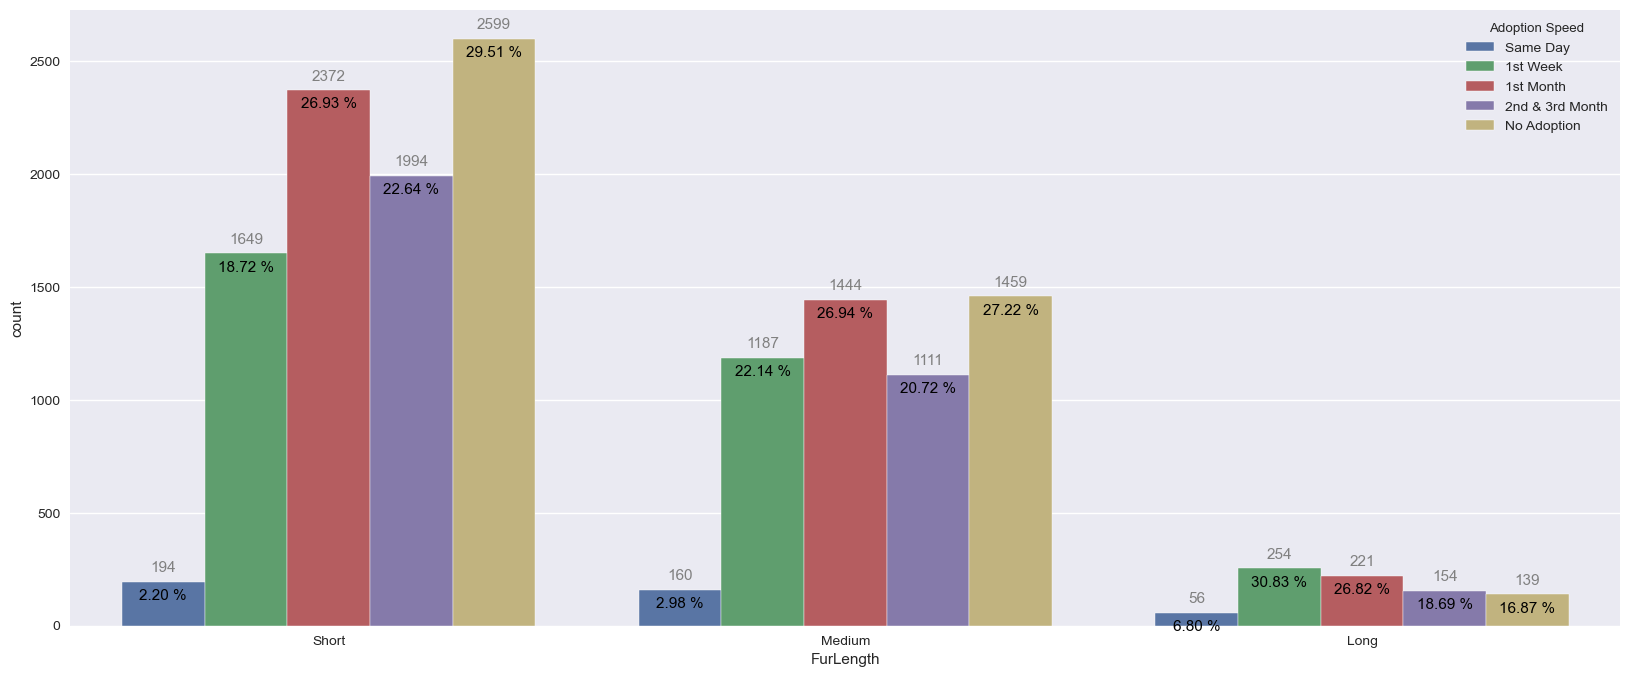

In [29]:
plt.figure(figsize=(20, 8))
ax=sns.countplot(x="FurLength",hue="AdoptionSpeed",data=train_df)
FurLengthP=[]
for i in range(1,4):
    FurLengthP.append((train_df['FurLength']==i).value_counts()[1])

plt.legend(title='Adoption Speed', loc='upper right', labels=['Same Day', '1st Week','1st Month','2nd & 3rd Month','No Adoption'])
for i,p in enumerate(ax.patches):
    ax.annotate(p.get_height() ,(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center',fontsize=11,color='gray',xytext=(0, 10),textcoords='offset points')
    ax.annotate("%.2f %%" % (p.get_height() *100 /FurLengthP[i%3]) ,(p.get_x()+p.get_width()/2.,p.get_height()),ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, -10),textcoords='offset points')  
ax.set_xticklabels(["Short","Medium", "Long"])

#people prefer Pets with longer hair.

[Text(0, 0, 'Short'), Text(1, 0, 'Medium'), Text(2, 0, 'Long')]

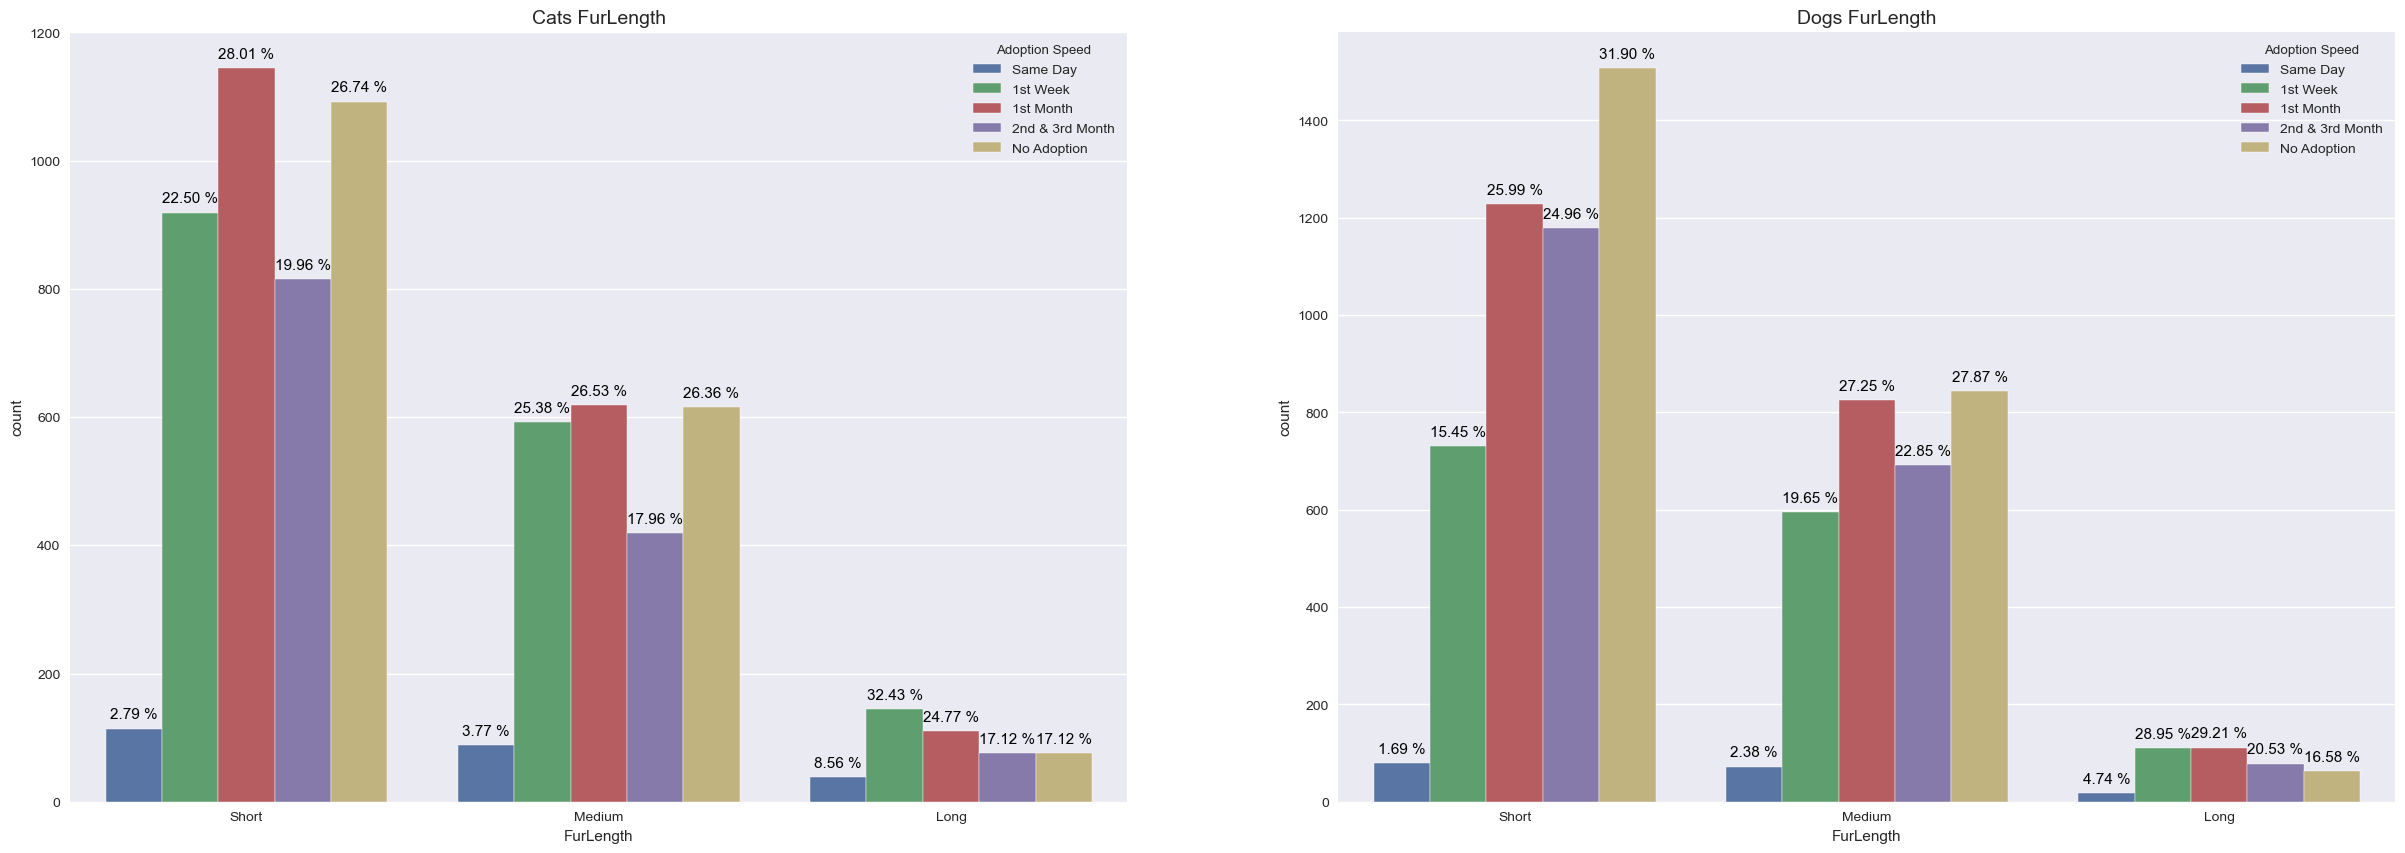

In [30]:
fig, ax = plt.subplots(1,2,figsize=(30,10))
ax[0].set_title("Cats FurLength",fontsize=14)
ax[1].set_title("Dogs FurLength",fontsize=14)
trainCats_df=train_df.copy()
trainCats_df.drop(trainCats_df[trainCats_df['Type'] ==1].index, inplace=True)
ax[0]=sns.countplot(data=trainCats_df, x="FurLength",hue='AdoptionSpeed',ax=ax[0])
FurLengthP=[]

for i in range(1,4):
    FurLengthP.append((trainCats_df['FurLength']==i).value_counts()[1])

for i,p in enumerate(ax[0].patches):
    ax[0].annotate("%.2f %%" % (p.get_height() *100/FurLengthP[i%3]),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',fontsize=11,color='black',rotation=0,xytext=(0, 10),textcoords='offset points')  

###########Dogs
    
trainDogs_df=train_df.copy()
trainDogs_df.drop(trainDogs_df[trainDogs_df['Type'] ==2].index,inplace=True)
ax[1]=sns.countplot(data=trainDogs_df,x="FurLength",hue='AdoptionSpeed',ax=ax[1])
FurLengthP=[]

for i in range(1,4):
    FurLengthP.append((trainDogs_df['FurLength']==i).value_counts()[1])

for i,p in enumerate(ax[1].patches):
    ax[1].annotate("%.2f %%" % (p.get_height()*100/FurLengthP[i%3]),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center', va='center',fontsize=11,color='black',rotation=0, xytext=(0, 10),textcoords='offset points')  

ax[0].legend(title='Adoption Speed', loc='upper right', labels=['Same Day', '1st Week','1st Month','2nd & 3rd Month','No Adoption'])
ax[1].legend(title='Adoption Speed', loc='upper right', labels=['Same Day', '1st Week','1st Month','2nd & 3rd Month','No Adoption'])
ax[0].set_xticklabels(["Short","Medium", "Long"])
ax[1].set_xticklabels(["Short","Medium", "Long"])

#there is a differnce in adoption Rate per dogs and per Cats, Seems like the fur length on dogs is more important than on cats

train_df[train_df['FurLength']==0]

#### 4.7 Health Section

Text(0.5, 0.98, 'Adoption Speed and health conditions')

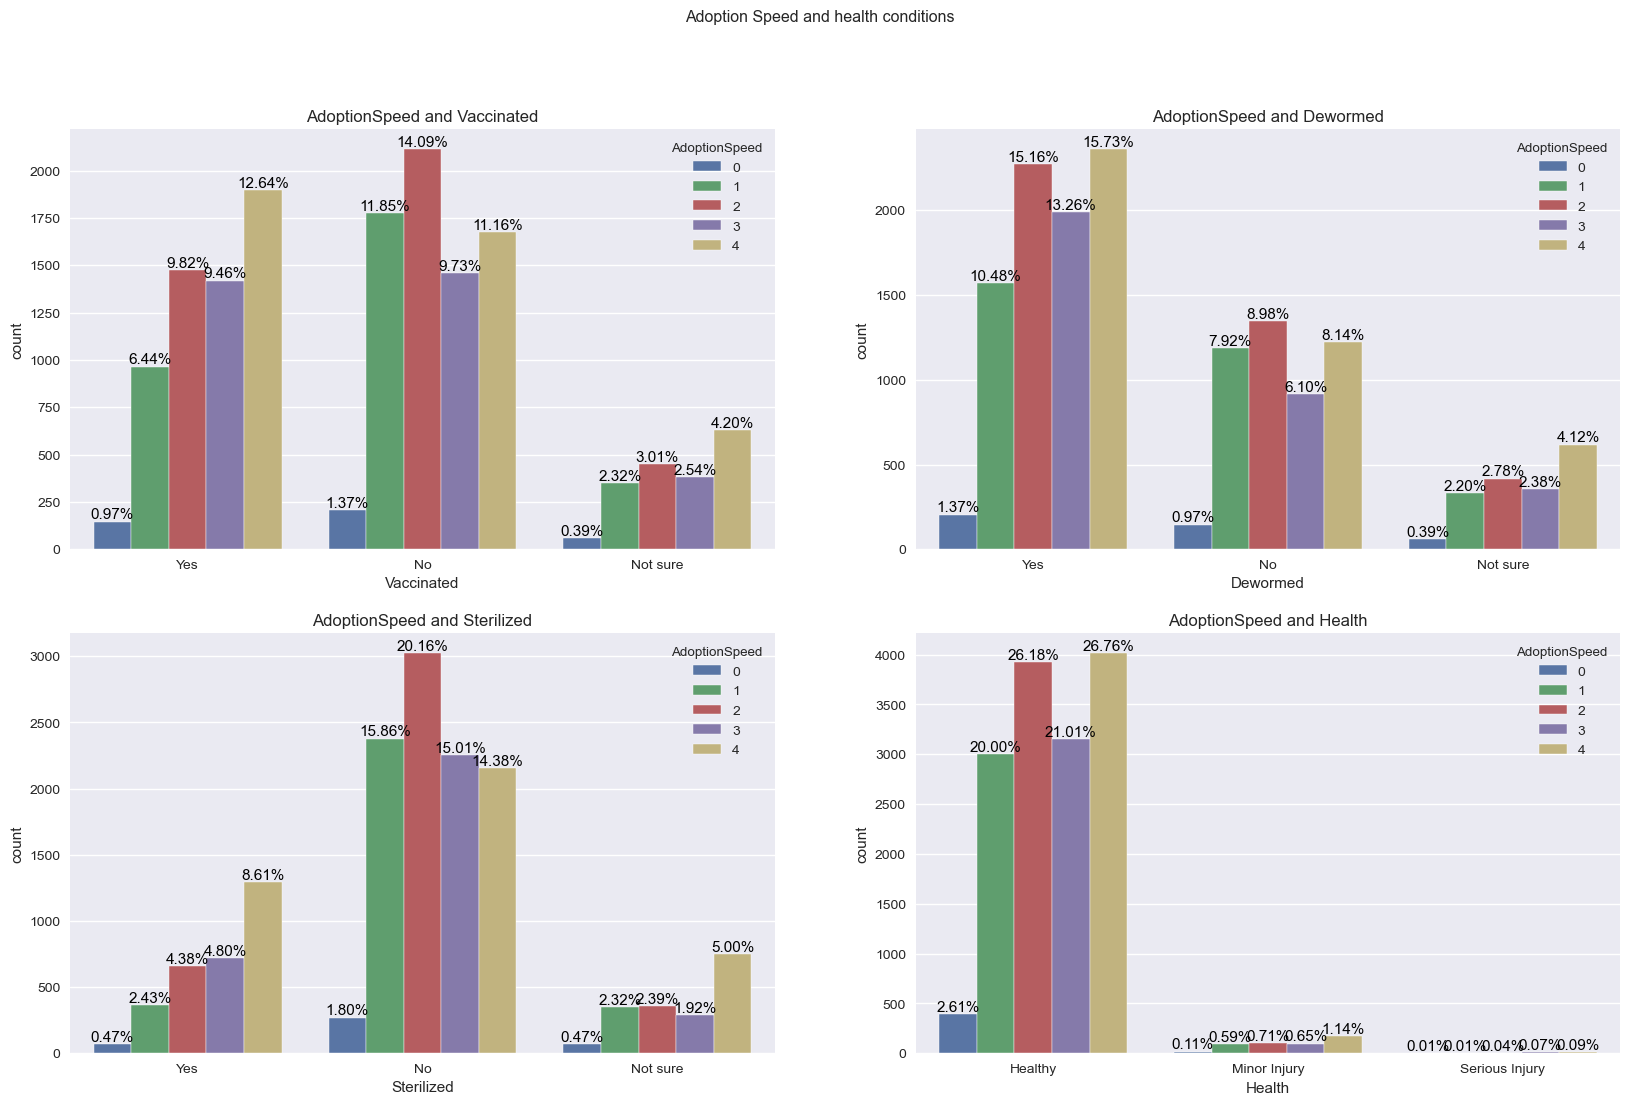

In [31]:
def make_count_plot(df, x, hue='AdoptionSpeed', title=''):
    g = sns.countplot(x=x, data=df, hue=hue)
    plt.title(f'AdoptionSpeed by {title}')
    ax = g.axes

    for p in ax.patches:
        ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2.,p.get_height()),ha='center', va='top', fontsize=11, color='black', rotation=0, xytext=(0, 10),textcoords='offset points')

plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
make_count_plot(df=train_df, x='Vaccinated', title='Vaccinated')
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure'])
plt.title('AdoptionSpeed and Vaccinated')

plt.subplot(2, 2, 2)
make_count_plot(df=train_df, x='Dewormed', title='Dewormed')
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure'])
plt.title('AdoptionSpeed and Dewormed')

plt.subplot(2, 2, 3)
make_count_plot(df=train_df, x='Sterilized', title='Sterilized')
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure'])
plt.title('AdoptionSpeed and Sterilized')

plt.subplot(2, 2, 4)
make_count_plot(df=train_df, x='Health', title='Health')
plt.xticks([0, 1, 2], ['Healthy', 'Minor Injury', 'Serious Injury'])
plt.title('AdoptionSpeed and Health')

plt.suptitle('Adoption Speed and health conditions')



#### 4.8 Quantity

In [32]:
train_df['Quantity'].value_counts()
#surprsingly we can see some listing of pets with a very high Qauntity, I will bin all the 10+ listing to a one column that will be called 10+

1     11565
2      1422
3       726
4       531
5       333
6       185
7        84
8        52
9        33
10       19
20       12
11       10
12        6
15        4
17        3
16        3
14        2
13        2
18        1
Name: Quantity, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


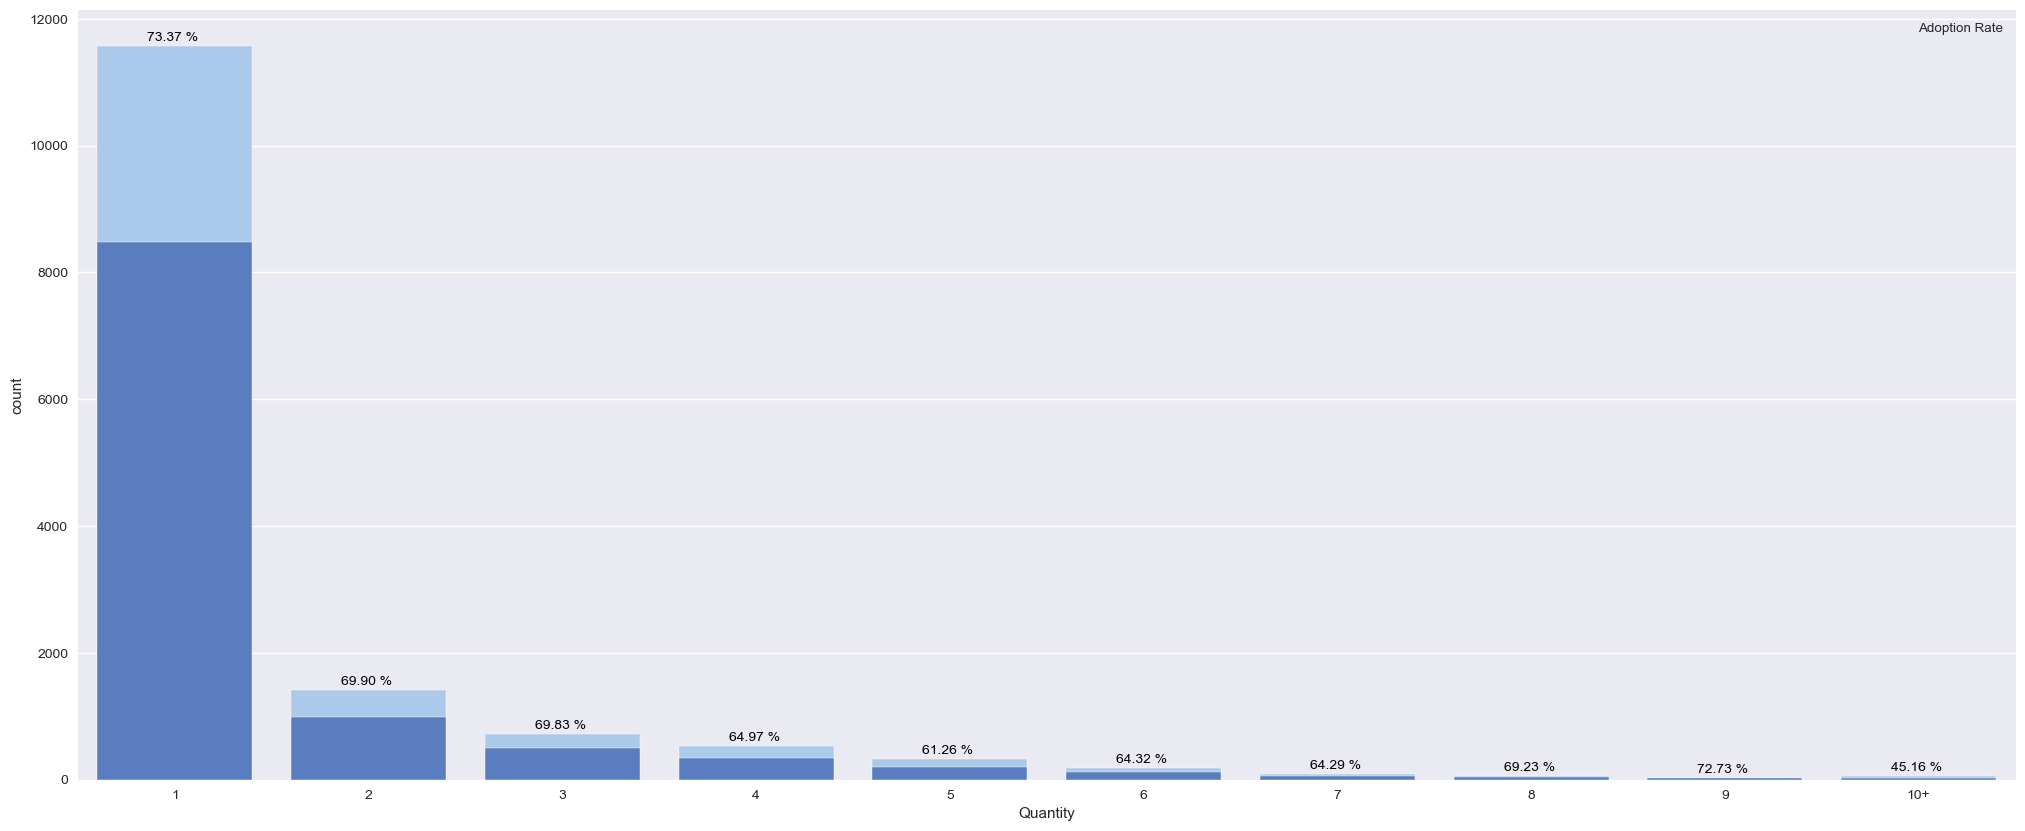

In [33]:
adopted01_df=train_df.copy()
adopted01_df['AdoptionSpeed'].replace(to_replace=[ 0, 1, 2 ,3 ],value=0,inplace=True)
adopted01_df['AdoptionSpeed'].replace(to_replace=[ 4 ],value=1,inplace=True)

train10_df=adopted01_df.copy()
train10_df.loc[train10_df['Quantity']>=10, 'Quantity']=10

plt.figure(figsize=(25, 10))
sns.set_color_codes("pastel")
ax=sns.countplot(data=train10_df, x="Quantity",order = train10_df['Quantity'].value_counts().sort_index(ascending =True).index,color='b')
plt.legend(title='Adoption Rate', loc='upper right')
adopted0_df=train10_df.loc[train10_df['AdoptionSpeed']==0]

df=adopted0_df['Quantity'].value_counts().sort_index(ascending =True)/train10_df['Quantity'].value_counts().sort_index(ascending =True) # getting the right P%
df=df.to_numpy()
    
for i,p in enumerate(ax.patches):
    ratio = df[i]
    ax.annotate("%.2f %% " % (ratio*100)  , (p.get_x() + p.get_width() / 2., p.get_height()+20),ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')
    
sns.set_color_codes("muted")
sns.countplot(data=adopted0_df, x="Quantity",order = train10_df['Quantity'].value_counts().sort_index(ascending =True).index, color='b')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[-1] = '10+'
ax=ax.set_xticklabels(labels)

#pretty much obvious but pets who are grouped have lower Adoption rate... It might be better to list every pet on their own if possible.

In [34]:
train_df['Breed2'].value_counts()
#train_df['Breed2'].count()
a=10762/14993
a

0.7178016407656906

#### 4.9 Fee

In [35]:
train_df['Fee'].describe()

#seems like we have some outliers in Fees, the Mean is 21 but the max Value is 3000

count    14993.000000
mean        21.259988
std         78.414548
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3000.000000
Name: Fee, dtype: float64

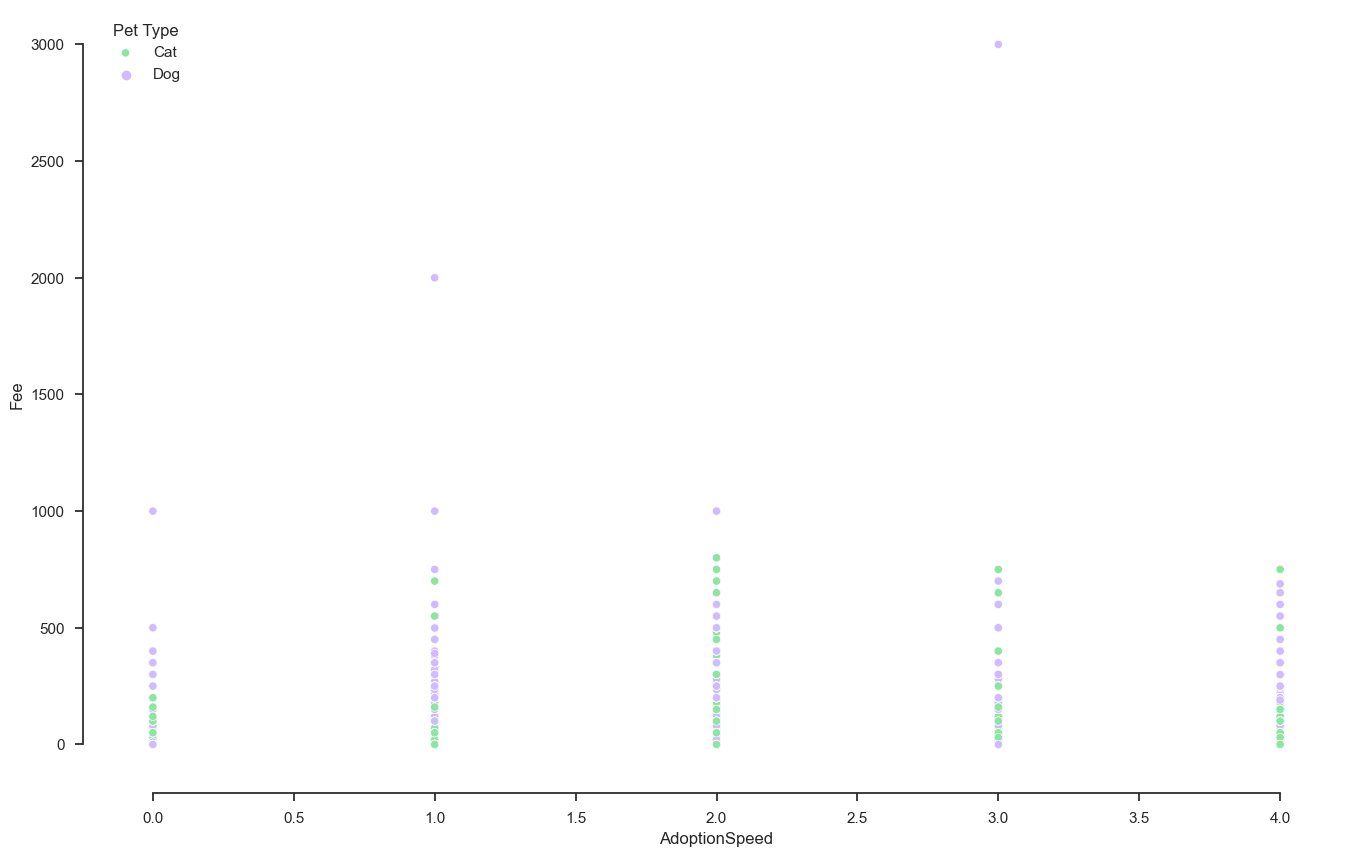

In [36]:
plt.figure(figsize=(16,10))
sns.set_theme(style="ticks", palette="pastel")
sns.scatterplot(data=train_df, x=train_df['AdoptionSpeed'],hue='Type',y=train_df['Fee'],palette=["m", "g"])
plt.legend(title='Pet Type', loc='upper left', labels=['Cat','Dog'])

sns.despine(offset=10, trim=True)

#Seems like after 500 we can cut the outliers and settle with 0.996% of the train set

In [37]:
fee_df=train_df.copy()
print(fee_df['Fee'].value_counts(normalize=True,bins=12)) #seems like after 500 we can cut the outliers

fee_df.drop(fee_df[fee_df['Fee'] >500].index, inplace=True)

(-3.001, 250.0]     0.978257
(250.0, 500.0]      0.018809
(500.0, 750.0]      0.002401
(750.0, 1000.0]     0.000400
(1750.0, 2000.0]    0.000067
(2750.0, 3000.0]    0.000067
(1000.0, 1250.0]    0.000000
(1250.0, 1500.0]    0.000000
(1500.0, 1750.0]    0.000000
(2000.0, 2250.0]    0.000000
(2250.0, 2500.0]    0.000000
(2500.0, 2750.0]    0.000000
Name: Fee, dtype: float64


plt.figure(figsize=(16, 10));
sns.set_theme(style="ticks", palette="pastel")
sns.violinplot(data=fee_df, x=fee_df['AdoptionSpeed'],hue='Type',y=fee_df['Fee'],palette=["m", "g"])
sns.despine(offset=10, trim=True)

#most pets are free

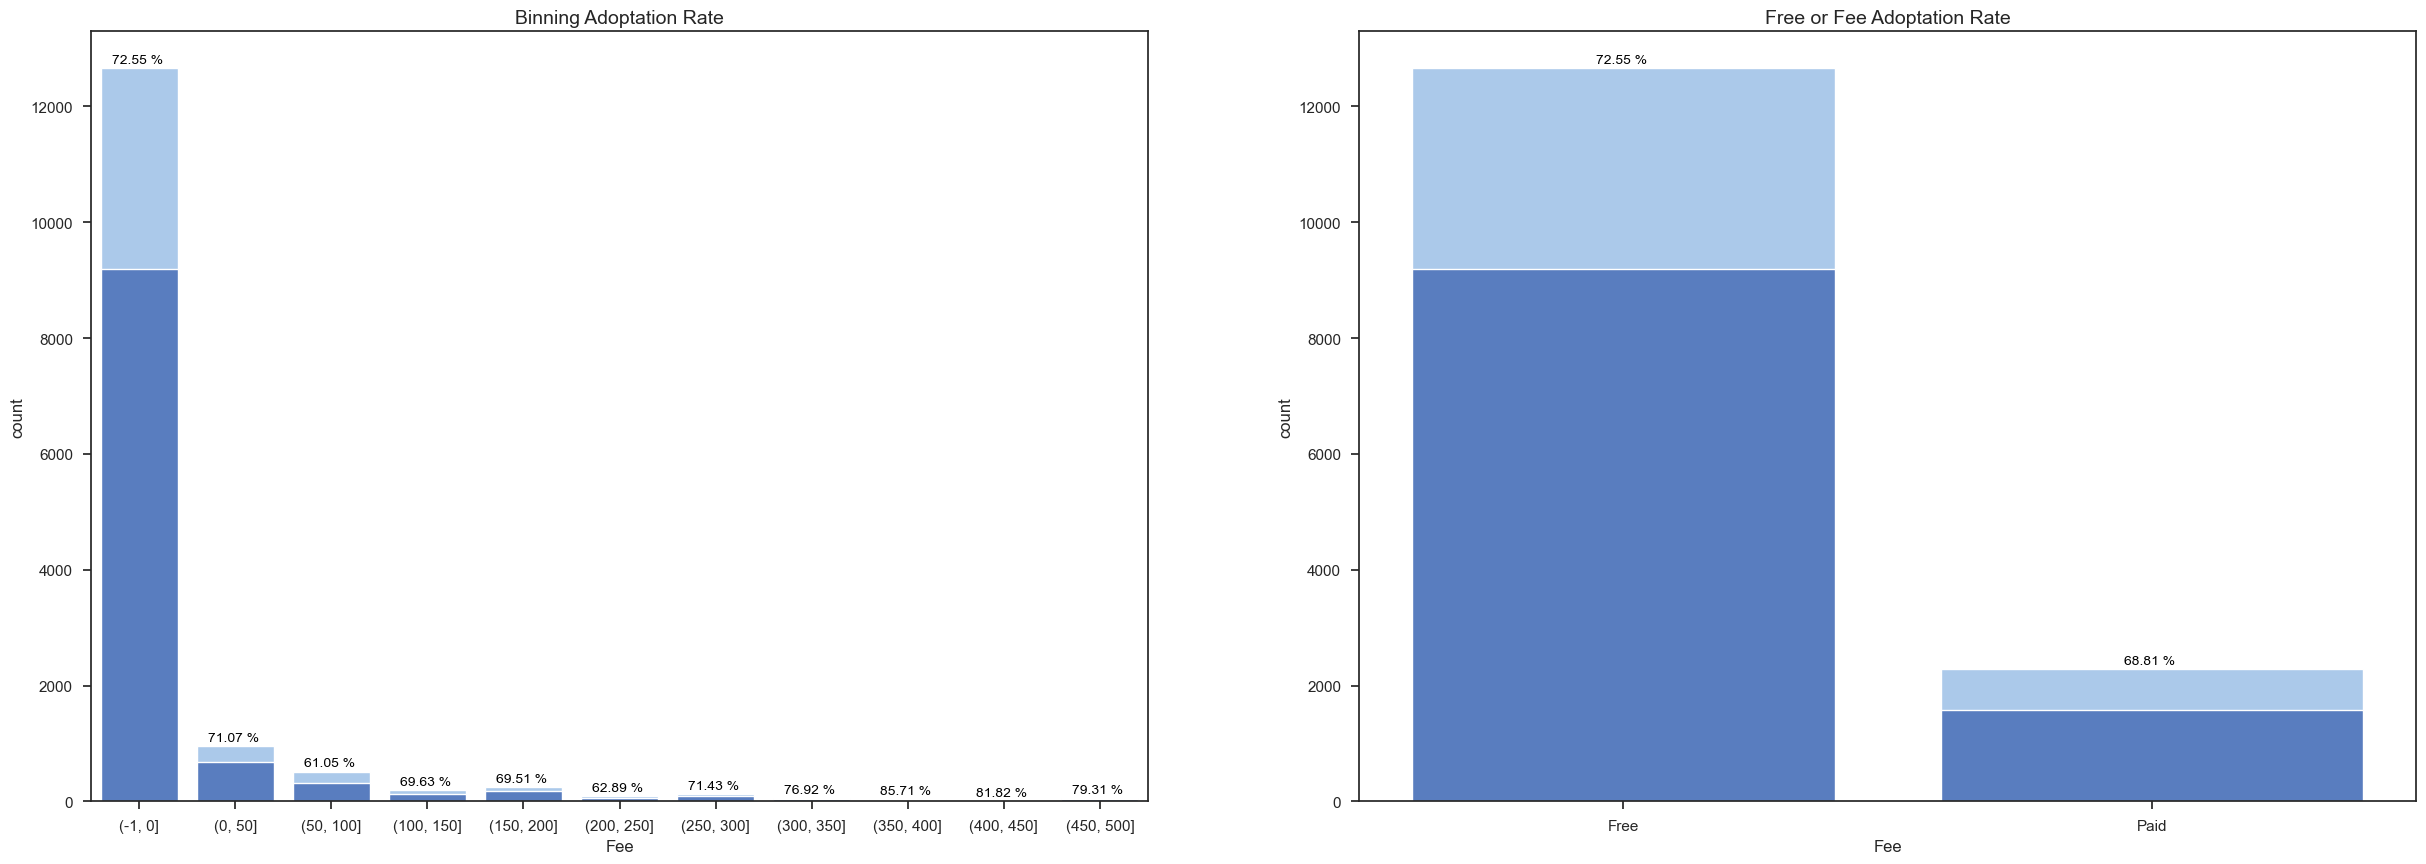

In [38]:
#compare AdoptionSpeed of Pets that are free to non free pets
adopted01Fee_df=adopted01_df.copy()
adopted01Fee_df.drop(adopted01Fee_df[adopted01Fee_df['Fee'] >500].index, inplace=True)
adopted01Fee_df.loc[adopted01Fee_df['Fee']>=1, 'Fee']='Paid'
adopted01Fee_df.loc[adopted01Fee_df['Fee']==0, 'Fee']='Free'
#################### Fee with Binning
adoptedBinsFee_df=adopted01_df.copy()
bins=[-1,0,50,100,150,200,250,300,350,400,450,500]
adoptedBinsFee_df['Fee'] = pd.cut(adoptedBinsFee_df['Fee'], bins)
adoptedBinsFee_df['Fee'].value_counts()

fig, ax = plt.subplots(1,2,figsize=(30,10))
ax[0].set_title("Binning Adoptation Rate",fontsize=14)
ax[1].set_title("Free or Fee Adoptation Rate",fontsize=14)

######################Free or Fee Adoptation Rate 


sns.set_color_codes("pastel")
ax[0]=sns.countplot(data=adoptedBinsFee_df, x="Fee",order = adoptedBinsFee_df['Fee'].value_counts().sort_index(ascending =True).index,color='b',ax=ax[0])
adopted0BinsFee_df=adoptedBinsFee_df.loc[adoptedBinsFee_df['AdoptionSpeed']==0]

df=adopted0BinsFee_df['Fee'].value_counts().sort_index(ascending =True)/adoptedBinsFee_df['Fee'].value_counts().sort_index(ascending =True) # getting the right P%
df=df.to_numpy()

for i,p in enumerate(ax[0].patches):
    ratio = df[i]
    ax[0].annotate("%.2f %% " % (ratio*100)  , (p.get_x() + p.get_width() / 2., p.get_height()+20),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
sns.set_color_codes("muted")
ax[0]=sns.countplot(data=adopted0BinsFee_df, x="Fee",order = adoptedBinsFee_df['Fee'].value_counts().sort_index(ascending =True).index, color='b',ax=ax[0])

######################Binning Adoptation Rate 


sns.set_color_codes("pastel")
ax[1]=sns.countplot(data=adopted01Fee_df, x="Fee",order = adopted01Fee_df['Fee'].value_counts().sort_index(ascending =True).index,color='b',ax=ax[1])
adopted0Fee_df=adopted01Fee_df.loc[adopted01Fee_df['AdoptionSpeed']==0]

df=adopted0Fee_df['Fee'].value_counts().sort_index(ascending =True)/adopted01Fee_df['Fee'].value_counts().sort_index(ascending =True) # getting the right P%
df=df.to_numpy()


for i,p in enumerate(ax[1].patches):
    ratio = df[i]
    ax[1].annotate("%.2f %% " % (ratio*100)  , (p.get_x() + p.get_width() / 2., p.get_height()+20),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
sns.set_color_codes("muted")
ax[1]=sns.countplot(data=adopted0Fee_df, x="Fee",order = adopted01Fee_df['Fee'].value_counts().sort_index(ascending =True).index, color='b',ax=ax[1])

#Pets Free of fee has higher Adoptation Rate, there is also a downtrend of adoptation rate as the fee increases

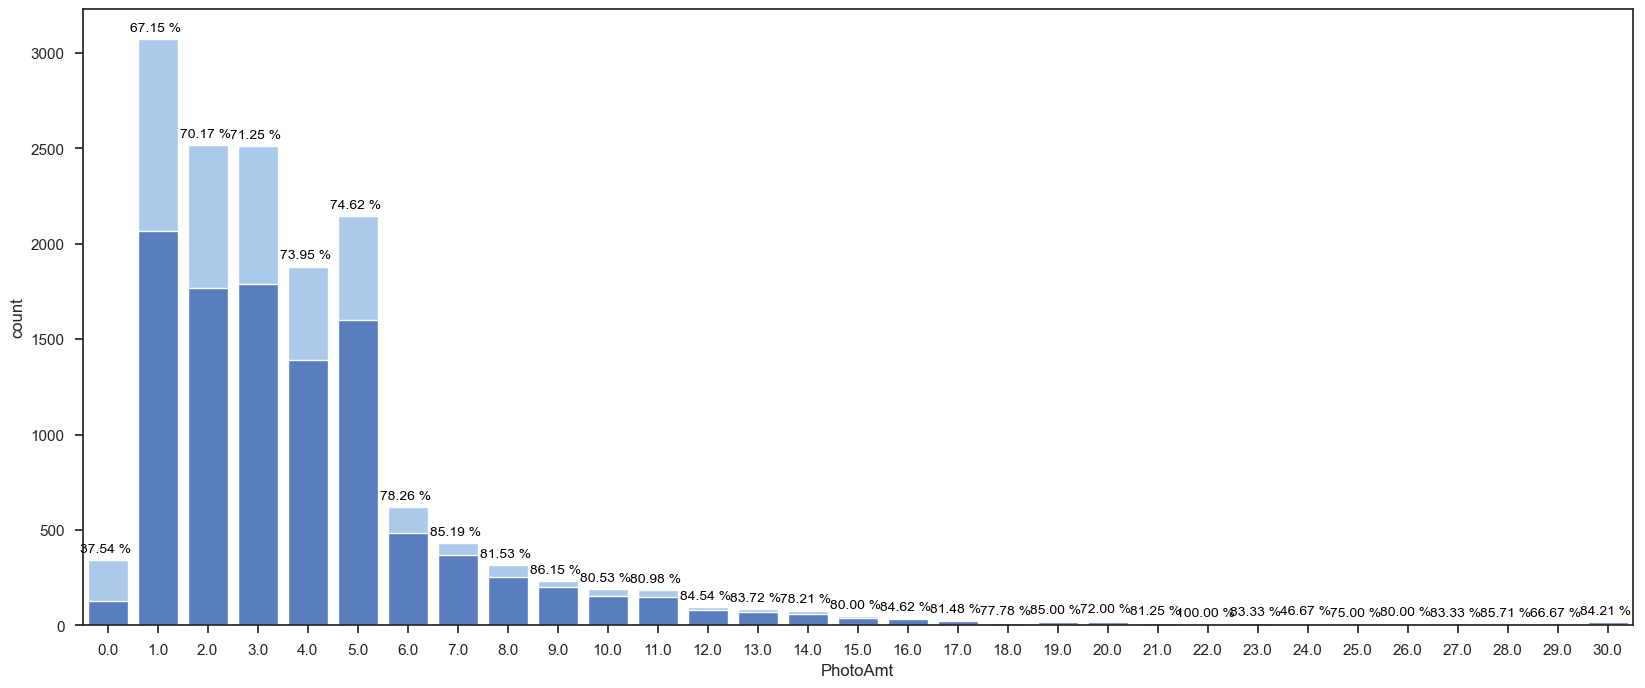

In [39]:
#the Adoption Rate per Photo amount
plt.figure(figsize=(20, 8));
adoptedPhoto01_df=adopted01_df.copy()

sns.set_color_codes("pastel")
ax=sns.countplot(data=adoptedPhoto01_df, x="PhotoAmt",order = adoptedPhoto01_df['PhotoAmt'].value_counts().sort_index(ascending =True).index,color='b')
adoptedPhoto0_df=adoptedPhoto01_df.loc[adoptedPhoto01_df['AdoptionSpeed']==0]


df=adoptedPhoto0_df['PhotoAmt'].value_counts().sort_index(ascending =True)/adoptedPhoto01_df['PhotoAmt'].value_counts().sort_index(ascending =True) # getting the right P%
df=df.to_numpy()


for i,p in enumerate(ax.patches):
    ratio = df[i]
    ax.annotate("%.2f %% " % (ratio*100)  , (p.get_x() + p.get_width() / 2., p.get_height()+20),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
sns.set_color_codes("muted")
ax=sns.countplot(data=adoptedPhoto0_df, x="PhotoAmt",order = adoptedPhoto01_df['PhotoAmt'].value_counts().sort_index(ascending =True).index, color='b')

#the more Photos a pet has the higher the chances for Adoption

(0.0, 4736.0)

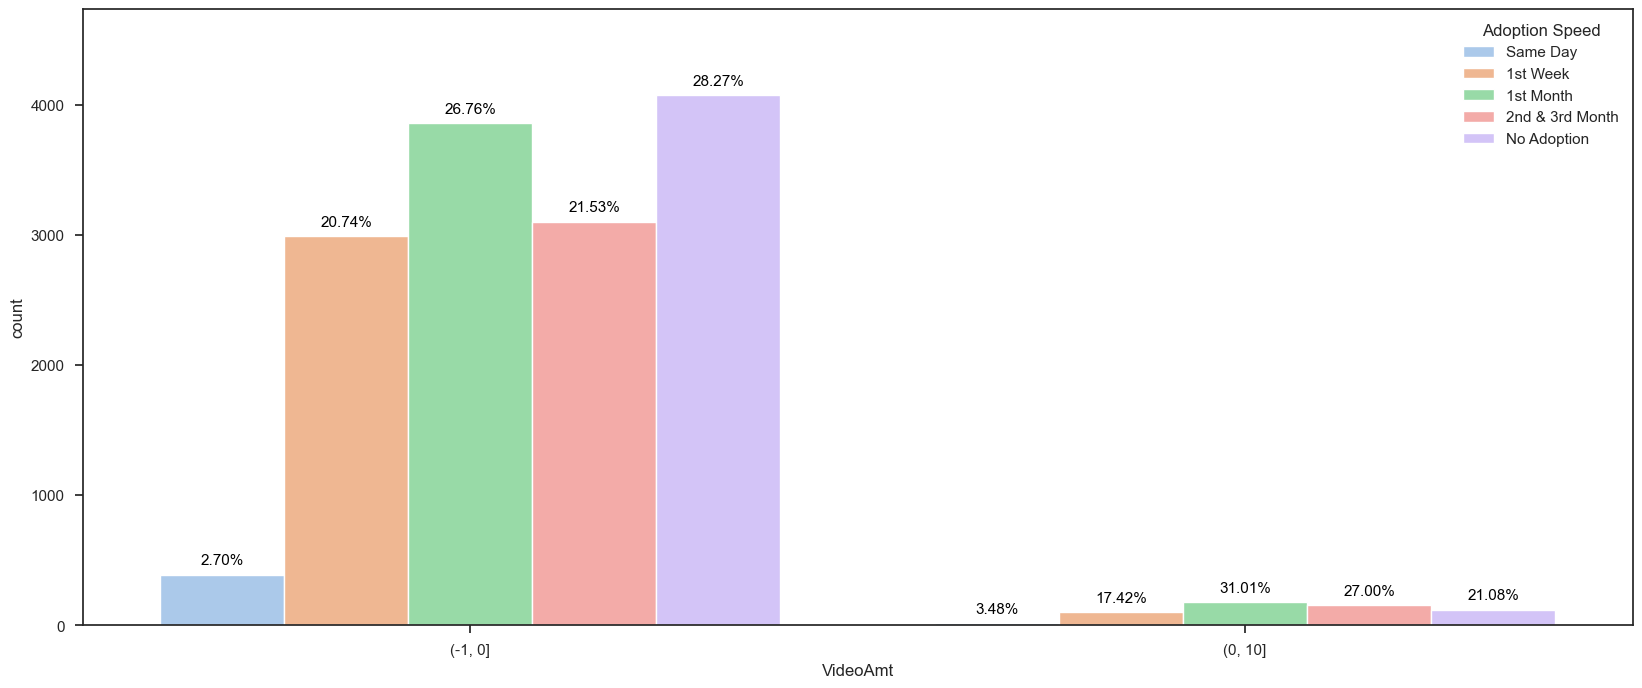

In [40]:
videoAmt_df=train_df.copy()

videoAmt_df['VideoAmt'] = pd.cut(videoAmt_df['VideoAmt'], bins=[-1,0,10])
videoAmt_df['VideoAmt'].value_counts()

plt.figure(figsize=(20, 8));


ax=sns.countplot(data=videoAmt_df, x="VideoAmt",hue='AdoptionSpeed')
videoP=[]
videoP.append((videoAmt_df['VideoAmt']==pd.Interval(-1, 0, closed='right')).value_counts()[1])
videoP.append((videoAmt_df['VideoAmt']==pd.Interval(0, 10, closed='right')).value_counts()[1])

plt.legend(title='Adoption Speed', loc='upper right', labels=['Same Day', '1st Week','1st Month','2nd & 3rd Month','No Adoption'])
max=0
for i,p in enumerate(ax.patches):
    ax.annotate("%.2f%%" % (p.get_height() *100  / videoP[i%2]) , (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),textcoords='offset points')
    if p.get_height()>max:
        max=p.get_height()
ax.set_ylim(0,max+ 660)

#seems like most pets has 0 videos, I'm not so sure we would be able to use that column in prediction but we can see that pets with videos (at any amount) do have a higher adoption rate,
#therefore I can recommend animal shelters to take a small video of the pet

#### 4.12 States

In [41]:
states_dict = {k: v for k, v in zip(states['StateID'], states['StateName'])}
train_df['State_name'] = train_df['State'].apply(lambda x: '_'.join(states_dict[x].split()) if x in states_dict else 'Unknown')
train_df['State_name'].value_counts(normalize=True)

#Selangor peeps seems to be more keen on adopting dogs compared to KL and Penang. Sad to see such a high number of unadopted dogs at Penang.

Selangor           0.581205
Kuala_Lumpur       0.256453
Pulau_Pinang       0.056226
Johor              0.033816
Perak              0.028013
Negeri_Sembilan    0.016875
Melaka             0.009138
Kedah              0.007337
Pahang             0.005669
Terengganu         0.001734
Sabah              0.001467
Kelantan           0.001000
Sarawak            0.000867
Labuan             0.000200
Name: State_name, dtype: float64

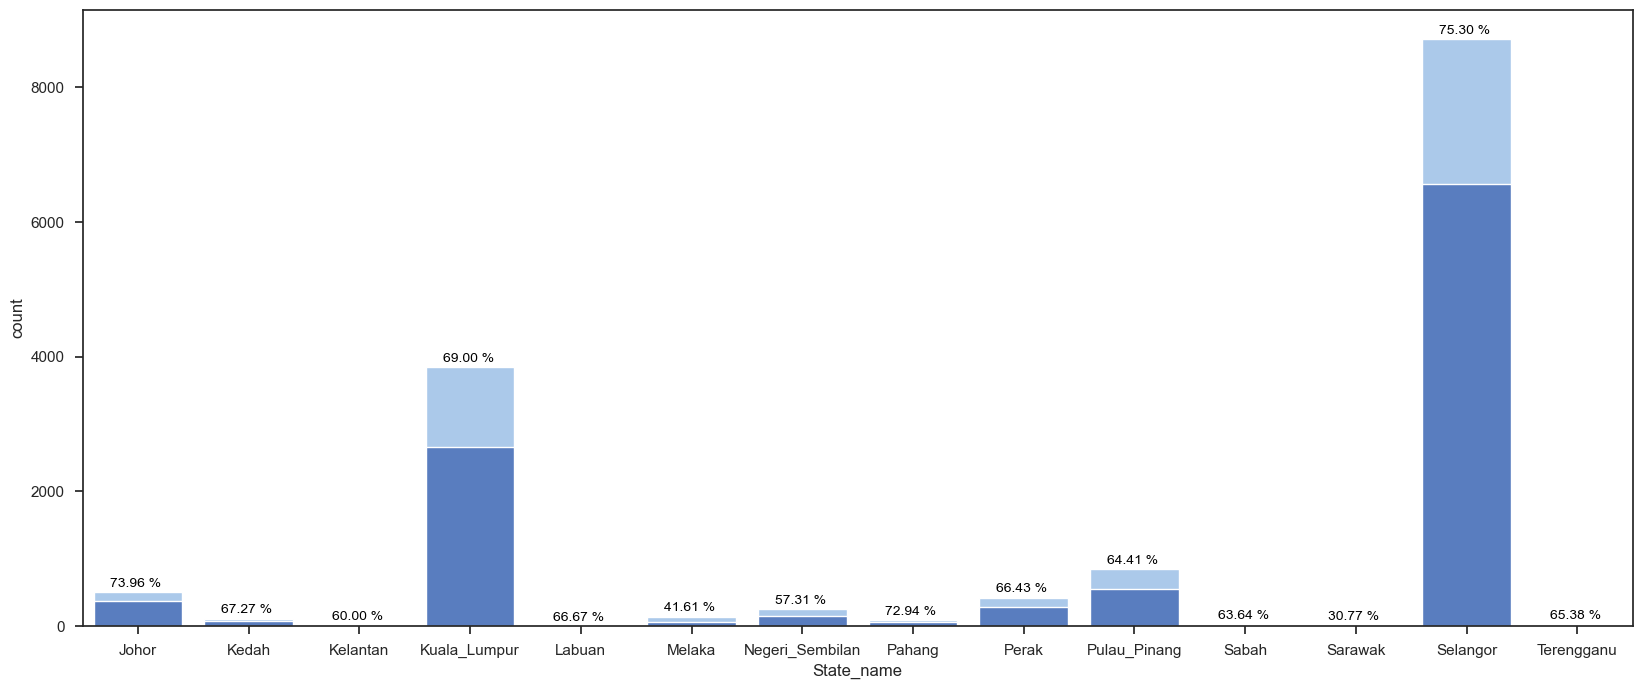

In [42]:
plt.figure(figsize=(20, 8))
adoptedState01_df=adopted01_df.copy()
adoptedState01_df['State_name'] = train_df['State'].apply(lambda x: '_'.join(states_dict[x].split()) if x in states_dict else 'Unknown')

sns.set_color_codes("pastel")
ax=sns.countplot(data=train_df, x="State_name",order = adoptedState01_df['State_name'].value_counts().sort_index(ascending =True).index,color='b')
adoptedState0_df=adoptedState01_df.loc[adoptedState01_df['AdoptionSpeed']==0]


df=adoptedState0_df['State_name'].value_counts().sort_index(ascending =True)/adoptedState01_df['State_name'].value_counts().sort_index(ascending =True) # getting the right P%
df=df.to_numpy()


for i,p in enumerate(ax.patches):
    ratio = df[i]
    ax.annotate("%.2f %% " % (ratio*100)  , (p.get_x() + p.get_width() / 2., p.get_height()+20),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
sns.set_color_codes("muted")
ax=sns.countplot(data=adoptedState0_df, x="State_name",order = adoptedState01_df['State_name'].value_counts().sort_index(ascending =True).index, color='b')


#### 4.13 Description/Sentiment

Text(0.5, 1.0, 'Top words in description')

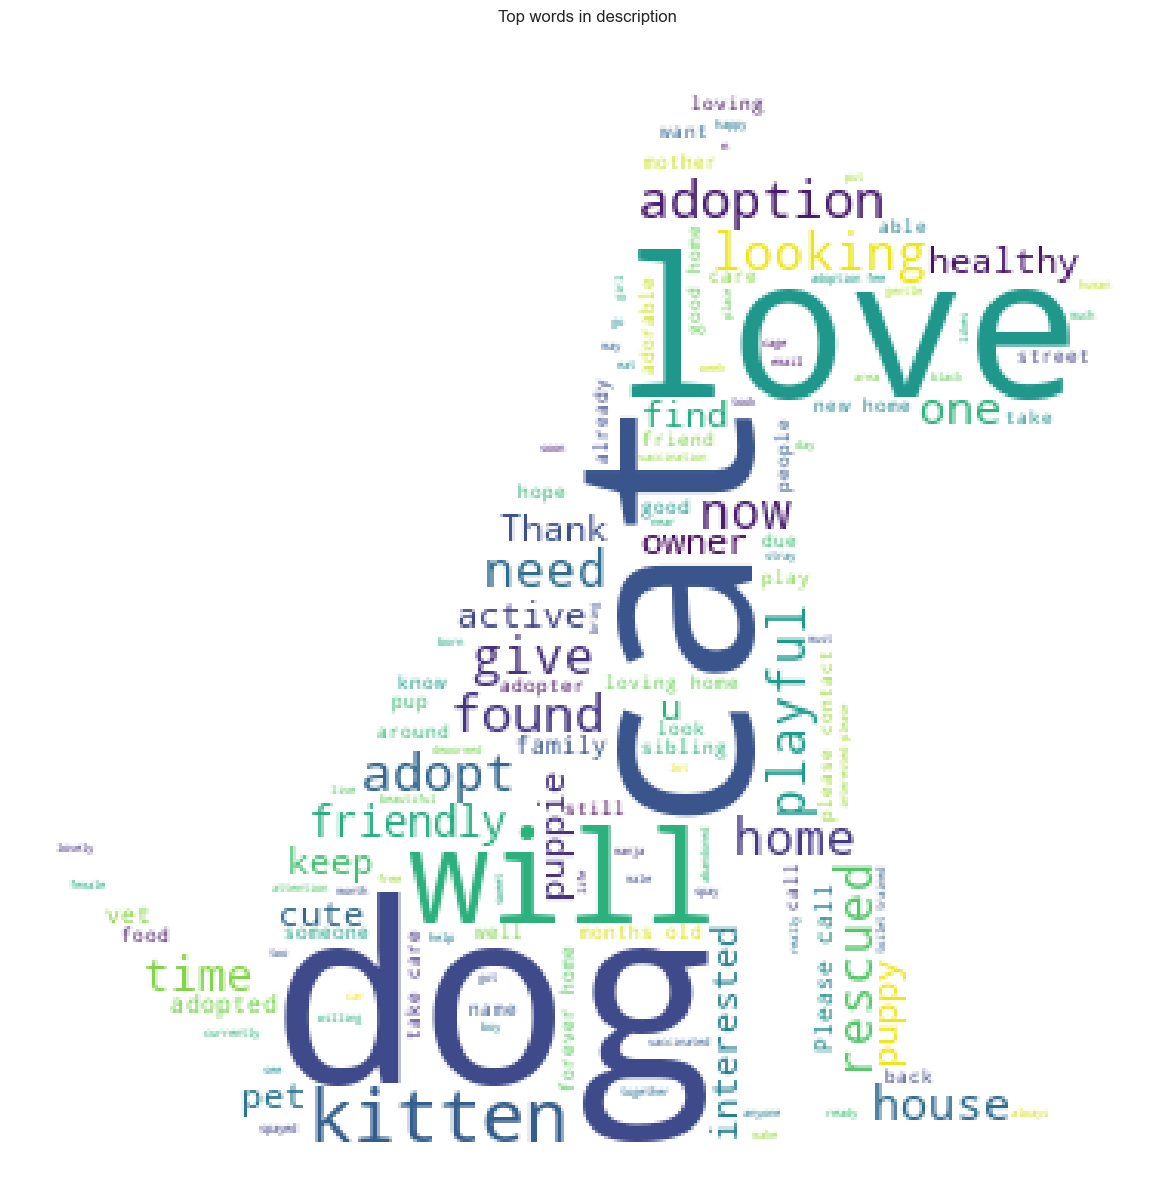

In [43]:
from PIL import Image
mask = np.array(Image.open(r'C:\Users\xy\Desktop\petfinder-adoption-prediction\Picture1.jpg'))

train_df['Description']=train_df['Description'].fillna('').values
fig, ax = plt.subplots(figsize = (15, 15))
Description = ' '.join(train_df['Description'])
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=mask.shape[1], height=mask.shape[0],mask=mask).generate(Description)
plt.axis("off");
plt.imshow(wordcloud)
plt.title('Top words in description')

(0.0, 1704.0)

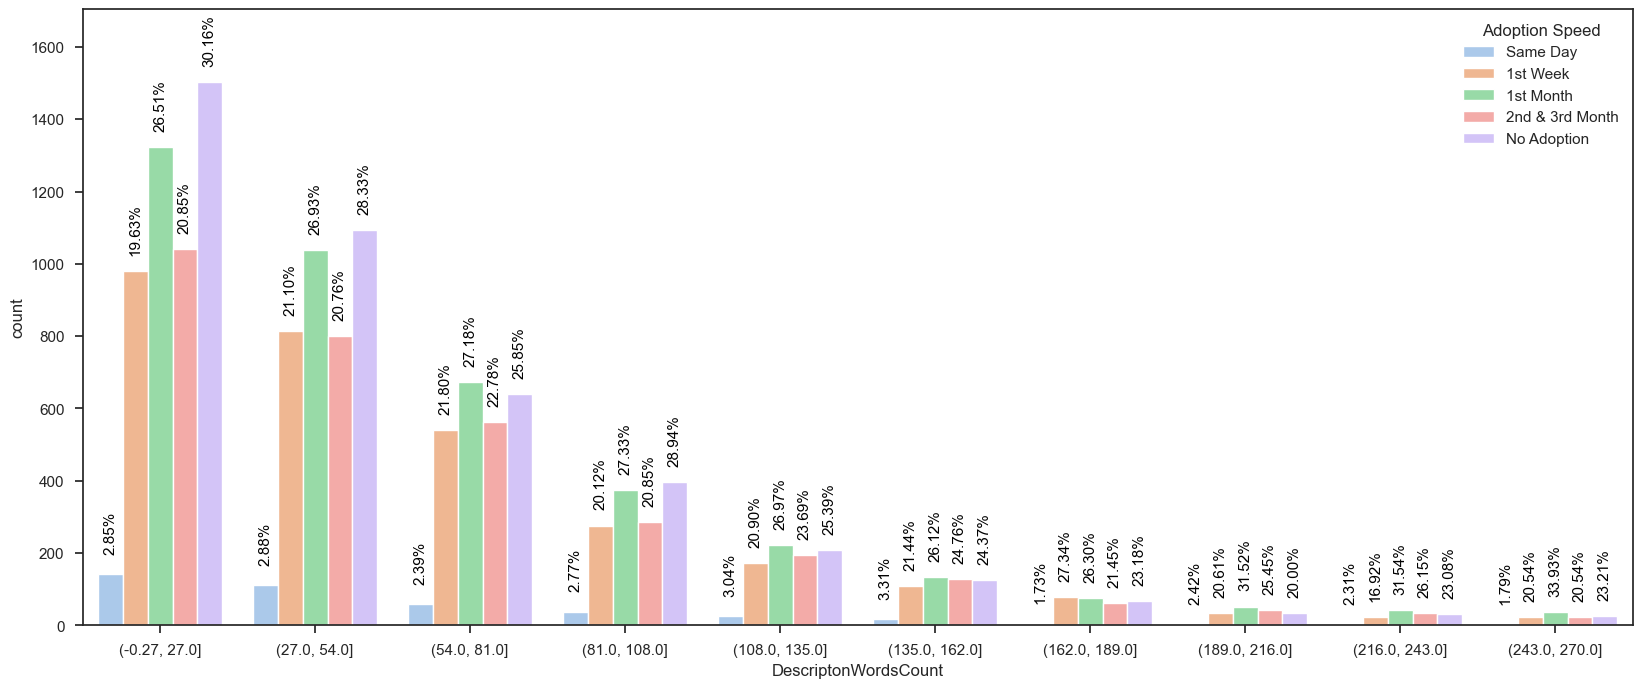

In [44]:
#if the length of the Descripton effects adoption rate (In words Count or in total Length)
train_df['DescriptonWordsCount'] = train_df['Description'].apply(lambda x: len(x.split()))

#Normalizing the Data with Zscore
cleanedDescripton=train_df.copy()
cleanedDescripton=cleanedDescripton[(np.abs(stats.zscore(cleanedDescripton['DescriptonWordsCount'])) < 3)]

#bin the data to 10 bins to see it more clearly
cleanedDescriptonBins=cleanedDescripton.copy()

cleanedDescriptonBins['DescriptonWordsCount'] = pd.cut(cleanedDescriptonBins['DescriptonWordsCount'], bins=10)
cleanedDescriptonBins['DescriptonWordsCount'].value_counts()

plt.figure(figsize=(20, 8));

    
ax=sns.countplot(data=cleanedDescriptonBins, x="DescriptonWordsCount",hue='AdoptionSpeed')
wordsP=[]
wordsP.append((cleanedDescriptonBins['DescriptonWordsCount']==pd.Interval(-0.27, 27, closed='right')).value_counts()[1])

for i in range(1,10):
    wordsP.append((cleanedDescriptonBins['DescriptonWordsCount']==pd.Interval(i*27, (i+1)*27, closed='right')).value_counts()[1])


plt.legend(title='Adoption Speed', loc='upper right', labels=['Same Day', '1st Week','1st Month','2nd & 3rd Month','No Adoption'])
max=0
for i,p in enumerate(ax.patches):
    
    ax.annotate("%.2f%%" % (p.get_height() *100  / wordsP[i%10]) , (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', fontsize=11, color='black', rotation=90, xytext=(0, 30),textcoords='offset points')
    if p.get_height()>max:
        max=p.get_height()
ax.set_ylim(0,max+200)

#most of the Descripton are quite short, 
#People do prefer to know more about the pet before adopting it, It's better to write a longer summary about the pet! This is an insight that we should display to animal shelers.

In [45]:
#Sentiment
#Loading up the JsonFile Data and adding that to our train_df, cleaning some NANS and fill them with 0 too
train_sentiment_files = sorted(glob.glob(r'C:\Users\xy\Desktop\petfinder-adoption-prediction\train_sentiment\*.json'))
print('num of train sentiment files: {}'.format(len(train_sentiment_files)))
data=[]

for i in range (len(train_sentiment_files)):
    with open(train_sentiment_files[i], encoding='utf-8') as jsonFile:
        jsonObject = json.load(jsonFile)
        jsonFile.close()
    score=jsonObject['documentSentiment']['score']
    magnitude=jsonObject['documentSentiment']['magnitude']
    path=train_sentiment_files[i]
    firstpos=path.rfind("\\")
    lastpos=path.rfind(".")
    PetID=path[firstpos+1:lastpos]
    data.append([PetID,score,magnitude,score*magnitude])

data = pd.DataFrame(data, columns=['PetID','Score', 'Magnitude','Sentiment'])

train_df=pd.merge(train_df, data, on='PetID',how='outer')
train_df=train_df.fillna(0)

num of train sentiment files: 14442


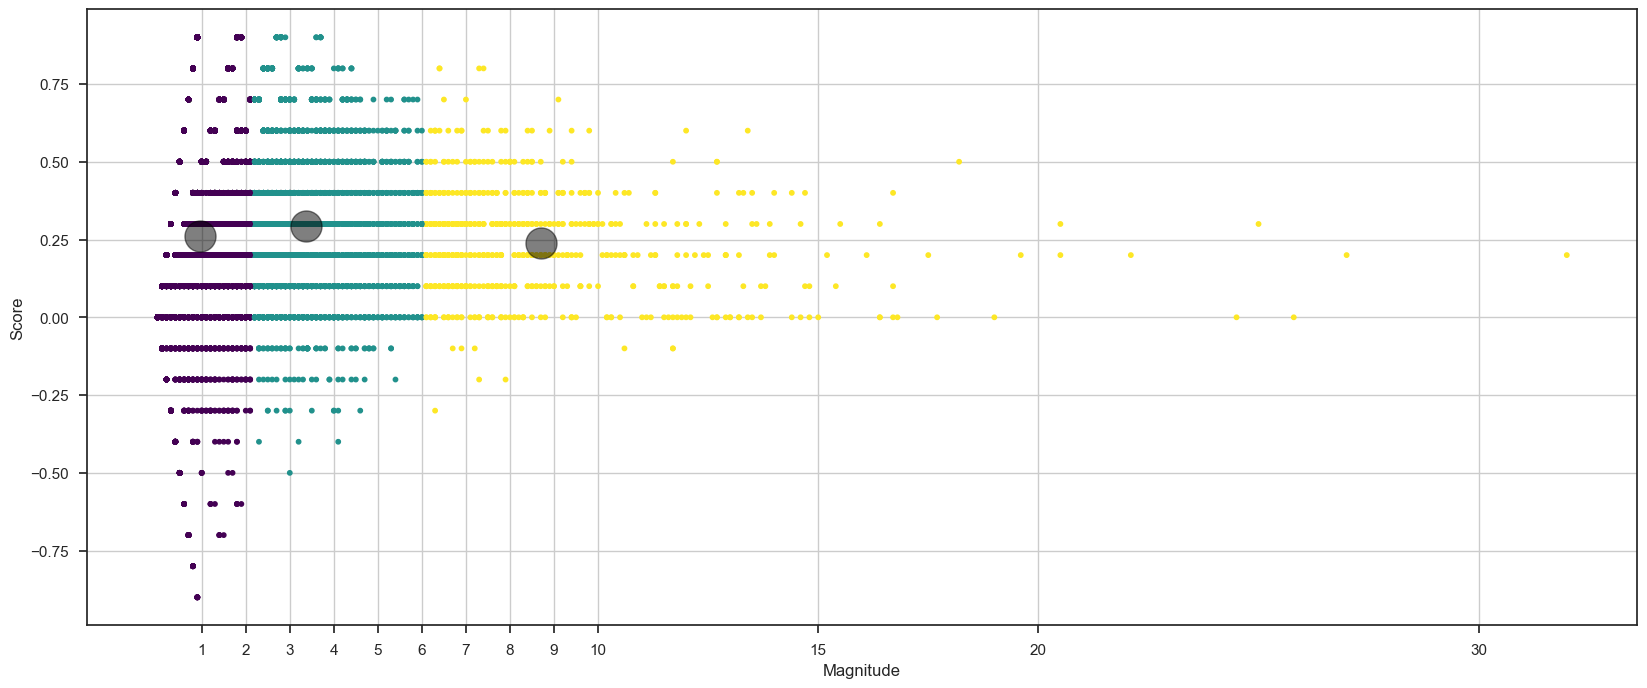

In [46]:
#NLP
#Using Kmeans clustring to find a way to use Score and Magnitude together in one column.
#I have found that using 3 clusters seperate the data pretty good, therefore i will try to use 3 classes when building sentiment textcolumn.
plt.figure(figsize=(20, 8));

cluster_df=train_df.copy()
cluster_df=cluster_df.drop(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2','Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed','Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID','VideoAmt', 'Description', 'PetID', 'PhotoAmt','DescriptonWordsCount'],axis=1)

kmeans = KMeans(n_clusters=3, random_state=0).fit(cluster_df[['Score','Magnitude']])
y_kmeans = kmeans.predict(cluster_df[['Score','Magnitude']])

plt.scatter( cluster_df['Magnitude'],cluster_df['Score'], c=y_kmeans, s=10, cmap='viridis')

centers = kmeans.cluster_centers_
plt.xticks([1,2,3,4,5,6,7,8,9,10,15,20,30])
plt.grid(which='both')
plt.xlabel('Magnitude')
plt.ylabel('Score')
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=500, alpha=0.5)

In [47]:
data=[]

for i in range (len(train_sentiment_files)):
    with open(train_sentiment_files[i], encoding='utf-8') as jsonFile:
        jsonObject = json.load(jsonFile)
        jsonFile.close()
    score=jsonObject['documentSentiment']['score']
    magnitude=jsonObject['documentSentiment']['magnitude']
    path=train_sentiment_files[i]
    firstpos=path.rfind("\\")
    lastpos=path.rfind(".")
    PetID=path[firstpos+1:lastpos]
    if score >=0.1:
        if magnitude < 2:
            data.append([PetID,'Weak Postive'])
        elif magnitude < 6 and magnitude>=2:
            data.append([PetID,'Medium Postive'])
        elif magnitude >=6:
            data.append([PetID,'Strong Postive'])
            
    elif score <=-0.1 :
        if magnitude < 2:
            data.append([PetID,'Weak Negative'])
        elif magnitude < 6 and magnitude>=2:
            data.append([PetID,'Medium Negative'])
        elif magnitude >=6:
            data.append([PetID,'Strong Negative'])
            
    else:
        data.append([PetID,'Netural'])

data = pd.DataFrame(data, columns=['PetID','sentiment_TEXT'])

train_df=pd.merge(train_df, data, on='PetID',how='outer')
train_df=train_df.drop(['Score','Magnitude','Sentiment'],axis=1)

train_df.head()

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  \
0             1          1           2         2           2       1   
1             2          2           3         3           3       1   
2             2          2           1         1           2       1   
3             2          1           1         1           2       1   
4             2          1           2         2           2       1   

   Quantity  Fee  State                         RescuerID  VideoAmt  \
0         1  100  41326  8480853f516546f6cf33aa88cd76c379         0   
1         1    0  41401  3082c7125d8fb66f7dd4bff4192c8b14         0   
2         1    0  41326  fa90fa5b1ee11c86938398b60abc32cb         0   
3         1  150  41401  9238e4f44c71a75282e62f7136c6b240         0   
4         1    0  41326  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description      PetID  PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3       1.0   
1  I just found it alone yesterday near my apartm...  6296e909a       2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906       7.0   
3  Good guard dog, very alert, active, obedience ...  5842f1ff5       8.0   
4  This handsome yet cute boy is up for adoption....  850a43f90       3.0   

   AdoptionSpeed    State_name  DescriptonWordsCount  sentiment_TEXT  
0              2      Selangor                    69  Medium Postive  
1              0  Kuala_Lumpur                    23   Weak Negative  
2              3      Selangor                    69  Medium Postive  
3              2  Kuala_Lumpur                    25    Weak Postive  
4              2      Selangor                    81  Medium Postive

Weak Postive       6211
Medium Postive     4630
Netural            2328
Weak Negative       587
Strong Postive      557
Medium Negative     120
Strong Negative       9
Name: sentiment_TEXT, dtype: int64


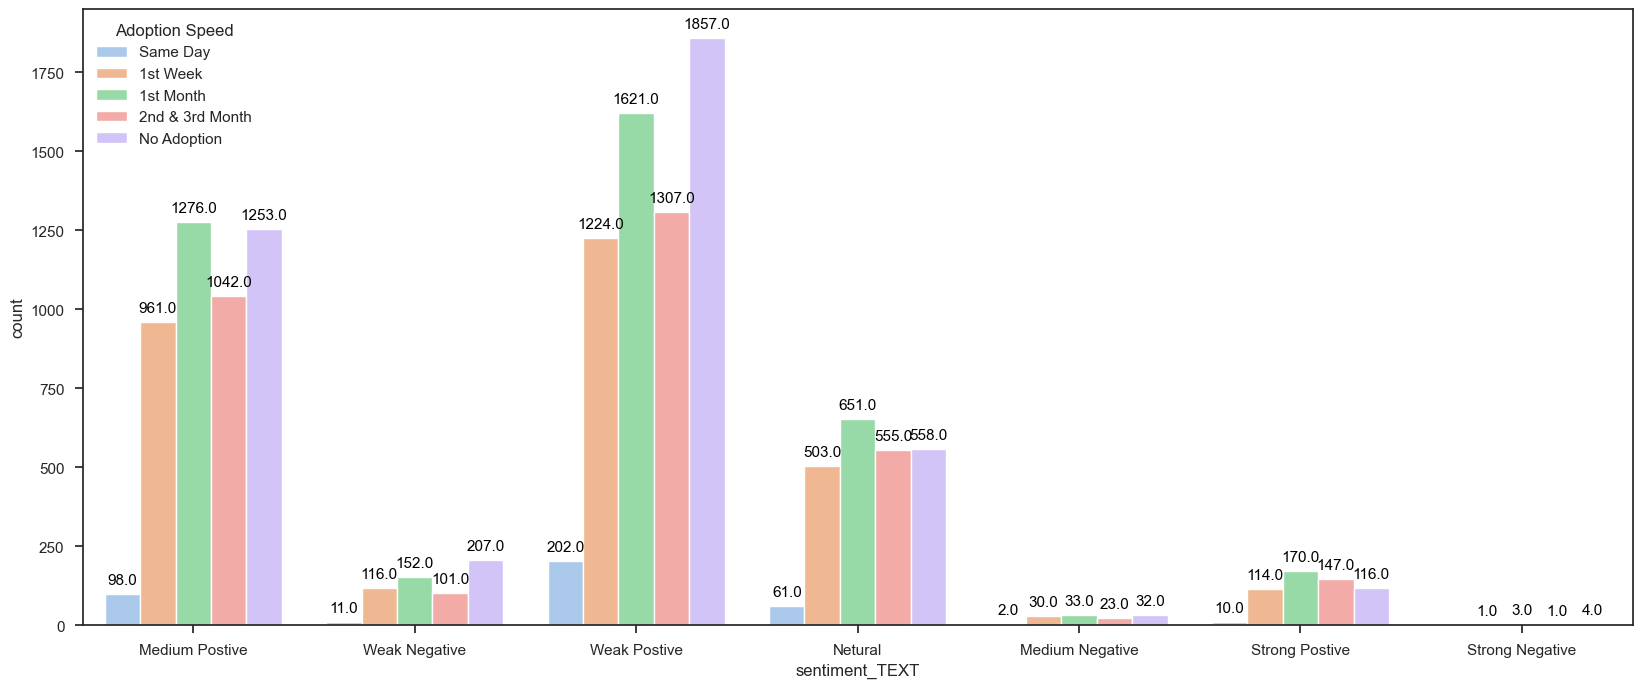

In [48]:
plt.figure(figsize=(20, 8))

ax=sns.countplot(data=train_df, x="sentiment_TEXT", hue="AdoptionSpeed")
sentimentP=[]
print(train_df['sentiment_TEXT'].value_counts())

plt.legend(title='Adoption Speed', loc='upper left', labels=['Same Day', '1st Week','1st Month','2nd & 3rd Month','No Adoption'])
for i,p in enumerate(ax.patches):
    ax.annotate(  p.get_height() , (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                textcoords='offset points')
#as we can see the sentiment of the text does effect the adoptionSpeed column
#We dont have a lot of Negative sentiment descriptions in our database, It's not a surprise because people do want to show the adopted pet in a positive light.
#the negative sentiment descriptions tend to have lower adoption rate as we can see in the columns "Weak Negative"
#The Big surprise here is that the "Netural" column has the best adoption rate over the five periods!

# III. Data preparation 

In [49]:
#remove Outliers and Normalize Numerical columns
#Work with one hot encoding for categorical data

train_df.copy()
train_df['OneColor']=np.where(train_df['Color2']==0,1,0)
train_df['OneColor']=np.where(train_df['Color3']==0,1,0)
train_df

Type            Name  Age  Breed1  Breed2  Gender  Color1  Color2  \
0         2          Nibble    3     299       0       1       1       7   
1         2     No Name Yet    1     265       0       1       1       2   
2         1          Brisco    1     307       0       1       2       7   
3         1            Miko    4     307       0       2       1       2   
4         1          Hunter    1     307       0       1       1       0   
...     ...             ...  ...     ...     ...     ...     ...     ...   
14988     2            NULL    2     266       0       3       1       0   
14989     2  Serato & Eddie   60     265     264       3       1       4   
14990     2         Monkies    2     265     266       3       5       6   
14991     2         Ms Daym    9     266       0       2       4       7   
14992     1            Fili    1     307     307       1       2       0   

       Color3  MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  \
0           0             1          1           2         2           2   
1           0             2          2           3         3           3   
2           0             2          2           1         1           2   
3           0             2          1           1         1           2   
4           0             2          1           2         2           2   
...       ...           ...        ...         ...       ...         ...   
14988       0             2          2           2         2           2   
14989       7             2          2           1         1           1   
14990       7             3          2           2         1           3   
14991       0             1          1           1         1           1   
14992       0             2          1           2         2           2   

       Health  Quantity  Fee  State                         RescuerID  \
0           1         1  100  41326  8480853f516546f6cf33aa88cd76c379   
1           1         1    0  41401  3082c7125d8fb66f7dd4bff4192c8b14   
2           1         1    0  41326  fa90fa5b1ee11c86938398b60abc32cb   
3           1         1  150  41401  9238e4f44c71a75282e62f7136c6b240   
4           1         1    0  41326  95481e953f8aed9ec3d16fc4509537e8   
...       ...       ...  ...    ...                               ...   
14988       1         4    0  41326  61c84bd7bcb6fb31d2d480b1bcf9682e   
14989       1         2    0  41326  1d5096c4a5e159a3b750c5cfcf6ceabf   
14990       1         5   30  41326  6f40a7acfad5cc0bb3e44591ea446c05   
14991       1         1    0  41336  c311c0c569245baa147d91fa4e351ae4   
14992       1         1    0  41332  9ed1d5493d223eaa5024c1a031dbc9c2   

       VideoAmt                                        Description      PetID  \
0             0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3   
1             0  I just found it alone yesterday near my apartm...  6296e909a   
2             0  Their pregnant mother was dumped by her irresp...  3422e4906   
3             0  Good guard dog, very alert, active, obedience ...  5842f1ff5   
4             0  This handsome yet cute boy is up for adoption....  850a43f90   
...         ...                                                ...        ...   
14988         0  I have 4 kittens that need to be adopt urgentl...  dc0935a84   
14989         0  Serato(female cat- 3 color) is 4 years old and...  a01ab5b30   
14990         0  Mix breed, good temperament kittens. Love huma...  d981b6395   
14991         0  she is very shy..adventures and independent..s...  e4da1c9e4   
14992         0  Fili just loves laying around and also loves b...  a83d95ead   

       PhotoAmt  AdoptionSpeed       State_name  DescriptonWordsCount  \
0           1.0              2         Selangor                    69   
1           2.0              0     Kuala_Lumpur                    23   
2           7.0              3         Selangor                    69   
3           8.0              2     Kual

In [50]:
trainDropped_df=train_df.copy()
trainDropped_df.drop(['Breed2', 'State','RescuerID','Description','Color2','Color3','PetID'], axis=1, inplace=True)
trainDropped_df.head()

Type         Name  Age  Breed1  Gender  Color1  MaturitySize  FurLength  \
0     2       Nibble    3     299       1       1             1          1   
1     2  No Name Yet    1     265       1       1             2          2   
2     1       Brisco    1     307       1       2             2          2   
3     1         Miko    4     307       2       1             2          1   
4     1       Hunter    1     307       1       1             2          1   

   Vaccinated  Dewormed  Sterilized  Health  Quantity  Fee  VideoAmt  \
0           2         2           2       1         1  100         0   
1           3         3           3       1         1    0         0   
2           1         1           2       1         1    0         0   
3           1         1           2       1         1  150         0   
4           2         2           2       1         1    0         0   

   PhotoAmt  AdoptionSpeed    State_name  DescriptonWordsCount  \
0       1.0              2      Selangor                    69   
1       2.0              0  Kuala_Lumpur                    23   
2       7.0              3      Selangor                    69   
3       8.0              2  Kuala_Lumpur                    25   
4       3.0              2      Selangor                    81   

   sentiment_TEXT  OneColor  
0  Medium Postive         1  
1   Weak Negative         1  
2  Medium Postive         1  
3    Weak Postive         1  
4  Medium Postive         1

In [51]:
trainCleaned1_df=trainDropped_df.copy()

In [52]:
#Change Name Column to Name Vs No Name
trainCleaned1_df['Name'] =trainCleaned1_df['Name'].fillna('NULL')
trainCleaned1_df['Name'].replace({"No Name": "NULL", "No Name Yet": "NULL", "Unknown": "NULL"},inplace=True)
trainCleaned1_df.loc[trainCleaned1_df['Name'] !="NULL", 'Name'] = 'HasName'
print(trainCleaned1_df['Name'].value_counts())

HasName    13645
NULL        1348
Name: Name, dtype: int64


In [53]:
#Bin the Breed1 Column to 6 categories like in the EDA
trainCleaned1_df.loc[(trainCleaned1_df['Breed1']!=266) & (trainCleaned1_df['Breed1']!=265) & (trainCleaned1_df['Breed1']!=264) & (trainCleaned1_df['Breed1']!=307) & (trainCleaned1_df['Type']== 2),'Breed1'] ="Pure Cats"
trainCleaned1_df.loc[(trainCleaned1_df['Breed1']!=266) & (trainCleaned1_df['Breed1']!=265) & (trainCleaned1_df['Breed1']!=264) & (trainCleaned1_df['Breed1']!=307) & (trainCleaned1_df['Type']== 1),'Breed1'] ="Pure Dogs"
trainCleaned1_df.loc[(trainCleaned1_df['Breed1']==307),'Breed1']='Mixed Dog'
trainCleaned1_df.loc[(trainCleaned1_df['Breed1']==266),'Breed1']='Domestic short Hair Cat'
trainCleaned1_df.loc[(trainCleaned1_df['Breed1']==265),'Breed1']='Domestic Medium Hair Cat'
trainCleaned1_df.loc[(trainCleaned1_df['Breed1']==264),'Breed1']='Domestic Long Hair Cat'

print(trainCleaned1_df['Breed1'].value_counts())

Mixed Dog                   5927
Domestic short Hair Cat     3634
Pure Dogs                   2209
Pure Cats                   1669
Domestic Medium Hair Cat    1258
Domestic Long Hair Cat       296
Name: Breed1, dtype: int64


In [54]:
#Change Gender Labels to Male, Female, Group
trainCleaned1_df.loc[(trainCleaned1_df['Gender']==1),'Gender']='Male'
trainCleaned1_df.loc[(trainCleaned1_df['Gender']==2),'Gender']='Female'
trainCleaned1_df.loc[(trainCleaned1_df['Gender']==3),'Gender']='Mixed'

#Change Color1 Labels to 1-Black 2-Brown 3-Golden 4-Yellow 5-Cream 6-Gray 7-White
colors=["Nan","Black","Brown","Golden","Yellow","Cream","Gray","White"]
for i in range(1,8):
    trainCleaned1_df.loc[(trainCleaned1_df['Color1']==i),'Color1']=colors[i]  
print(trainCleaned1_df['Color1'].value_counts())
colors=["Nan","Black","Brown","Golden","Yellow","Cream","Gray","White"]

Black     7427
Brown     3750
Golden     947
Cream      884
Gray       684
White      667
Yellow     634
Name: Color1, dtype: int64


In [55]:
#Bin Fee to Paid Pets and Free Pets: we can also try to bin per intervals or leave it as numerical value
trainCleaned1_df.loc[trainCleaned1_df['Fee']>=1, 'Fee']='Paid'
trainCleaned1_df.loc[trainCleaned1_df['Fee']==0, 'Fee']='Free'

#Bin Video Amount to Have Video Vs No Video
trainCleaned1_df.loc[trainCleaned1_df['VideoAmt']>=1, 'VideoAmt']='YesVideo'
trainCleaned1_df.loc[trainCleaned1_df['VideoAmt']==0, 'VideoAmt']='NoVideo'

In [56]:
#Make Dummies for Categorical Data
trainCleaned1_df['Type'] = pd.Categorical(trainCleaned1_df.Type)
trainCleaned1_df['Gender'] = pd.Categorical(trainCleaned1_df.Gender)
trainCleaned1_df['Vaccinated'] = pd.Categorical(trainCleaned1_df.Vaccinated)
trainCleaned1_df['Dewormed'] = pd.Categorical(trainCleaned1_df.Dewormed)
trainCleaned1_df['Sterilized'] = pd.Categorical(trainCleaned1_df.Sterilized)
trainCleaned1_df['Health'] = pd.Categorical(trainCleaned1_df.Health)
trainCleaned1_df['State_name'] = pd.Categorical(trainCleaned1_df.State_name)
trainCleaned1_df=pd.get_dummies(trainCleaned1_df)

count    14993.000000
mean        10.452078
std         18.155790
min          0.000000
25%          2.000000
50%          3.000000
75%         12.000000
max        255.000000
Name: Age, dtype: float64
count    14615.000000
mean         8.351488
std         12.037444
min          0.000000
25%          2.000000
50%          3.000000
75%          9.000000
max         64.000000
Name: Age, dtype: float64


<AxesSubplot:xlabel='Age', ylabel='Count'>

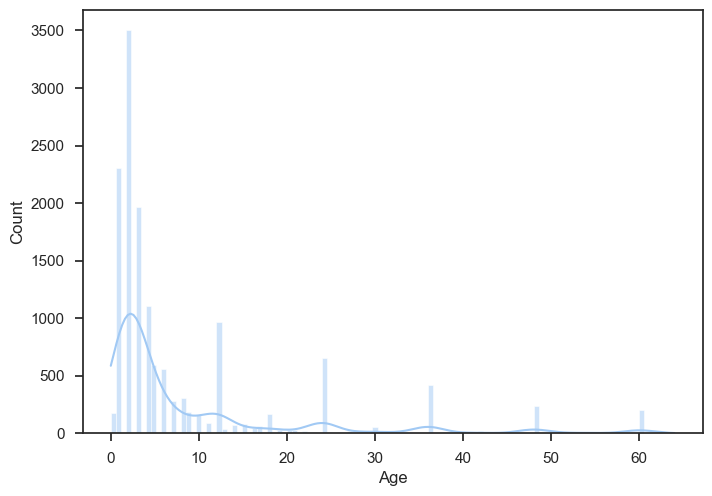

In [57]:
#remove outliers from the rest of the Numeric values
#Remove Outliers from Age
print(trainCleaned1_df['Age'].describe())
trainCleaned1_df=trainCleaned1_df[(np.abs(stats.zscore(trainCleaned1_df['Age'])) < 3)]
print(trainCleaned1_df['Age'].describe())
sns.histplot(data=trainCleaned1_df, x='Age',kde=True)

count    14615.000000
mean         3.912077
std          3.500533
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         30.000000
Name: PhotoAmt, dtype: float64
count    14332.000000
mean         3.592241
std          2.603131
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         14.000000
Name: PhotoAmt, dtype: float64


<AxesSubplot:xlabel='PhotoAmt', ylabel='Count'>

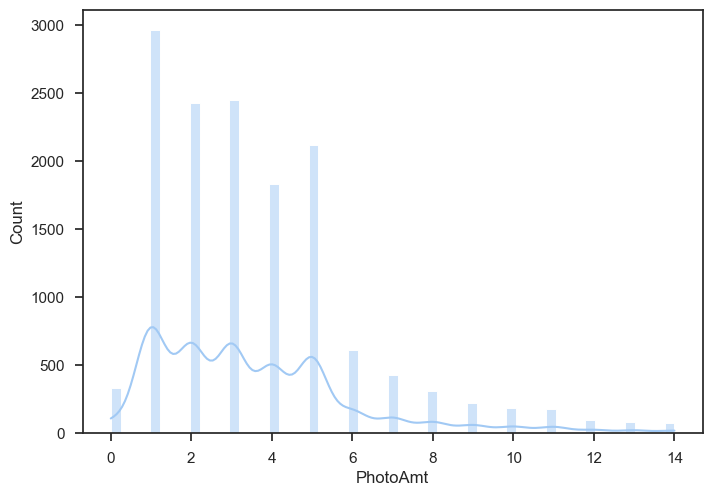

In [58]:
print(trainCleaned1_df['PhotoAmt'].describe())
trainCleaned1_df=trainCleaned1_df[(np.abs(stats.zscore(trainCleaned1_df['PhotoAmt'])) < 3)]
print(trainCleaned1_df['PhotoAmt'].describe())

sns.histplot(data=trainCleaned1_df, x='PhotoAmt',kde=True)

count    14332.000000
mean         1.570541
std          1.451413
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         20.000000
Name: Quantity, dtype: float64
count    13944.000000
mean         1.398523
std          0.913705
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: Quantity, dtype: float64


<AxesSubplot:xlabel='Quantity', ylabel='Count'>

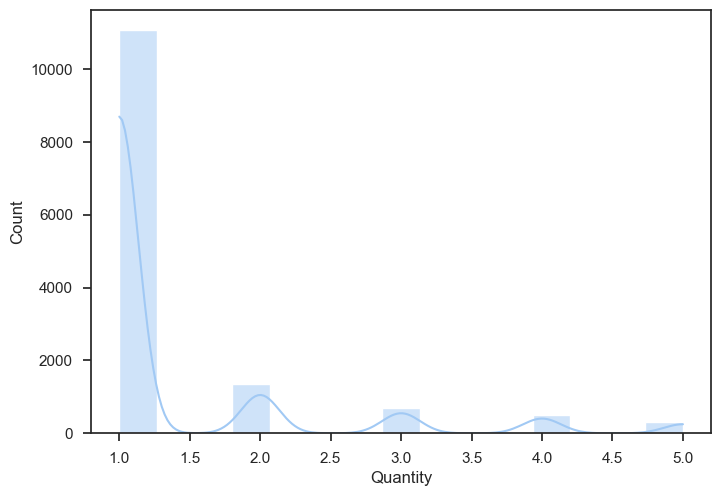

In [59]:
print(trainCleaned1_df['Quantity'].describe())
trainCleaned1_df=trainCleaned1_df[(np.abs(stats.zscore(trainCleaned1_df['Quantity'])) < 3)]
print(trainCleaned1_df['Quantity'].describe())

sns.histplot(data=trainCleaned1_df, x='Quantity',kde=True)

count    13944.000000
mean        61.205536
std         66.060187
min          0.000000
25%         21.000000
50%         43.000000
75%         79.000000
max       1257.000000
Name: DescriptonWordsCount, dtype: float64
count    13693.000000
mean        55.595268
std         48.363082
min          0.000000
25%         20.000000
50%         42.000000
75%         77.000000
max        259.000000
Name: DescriptonWordsCount, dtype: float64


<AxesSubplot:xlabel='DescriptonWordsCount', ylabel='Count'>

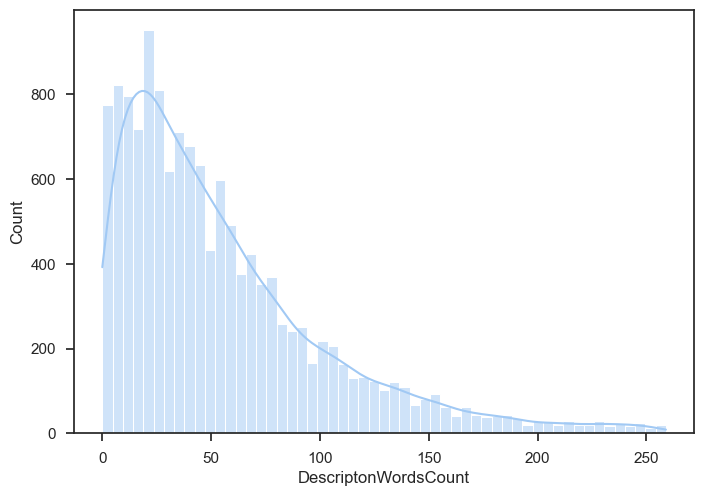

In [60]:
print(trainCleaned1_df['DescriptonWordsCount'].describe())
trainCleaned1_df=trainCleaned1_df[(np.abs(stats.zscore(trainCleaned1_df['DescriptonWordsCount'])) < 3)]
print(trainCleaned1_df['DescriptonWordsCount'].describe())

sns.histplot(data=trainCleaned1_df, x='DescriptonWordsCount',kde=True)

In [61]:
#Normalize the data
column_names_to_normalize = ['Age','MaturitySize','FurLength','Quantity','PhotoAmt','DescriptonWordsCount']
x = trainCleaned1_df[column_names_to_normalize].values
scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = trainCleaned1_df.index)
trainCleaned1_df[column_names_to_normalize] = df_temp

In [62]:
trainCleaned1_df

Age  MaturitySize  FurLength  Quantity  PhotoAmt  AdoptionSpeed  \
0      0.046875      0.000000        0.0      0.00  0.071429              2   
1      0.015625      0.333333        0.5      0.00  0.142857              0   
2      0.015625      0.333333        0.5      0.00  0.500000              3   
3      0.062500      0.333333        0.0      0.00  0.571429              2   
4      0.015625      0.333333        0.0      0.00  0.214286              2   
...         ...           ...        ...       ...       ...            ...   
14988  0.031250      0.333333        0.5      0.75  0.214286              2   
14989  0.937500      0.333333        0.5      0.25  0.214286              4   
14990  0.031250      0.666667        0.5      1.00  0.357143              3   
14991  0.140625      0.000000        0.0      0.00  0.214286              4   
14992  0.015625      0.333333        0.0      0.00  0.071429              3   

       DescriptonWordsCount  OneColor  Type_1  Type_2  Name_HasName  \
0                  0.266409         1       0       1             1   
1                  0.088803         1       0       1             0   
2                  0.266409         1       1       0             1   
3                  0.096525         1       1       0             1   
4                  0.312741         1       1       0             1   
...                     ...       ...     ...     ...           ...   
14988              0.301158         1       0       1             0   
14989              0.119691         0       0       1             1   
14990              0.034749         0       0       1             1   
14991              0.069498         1       0       1             1   
14992              0.061776         1       1       0             1   

       Name_NULL  Breed1_Domestic Long Hair Cat  \
0              0                              0   
1              1                              0   
2              0                              0   
3              0                              0   
4              0                              0   
...          ...                            ...   
14988          1                              0   
14989          0                              0   
14990          0                              0   
14991          0                              0   
14992          0                              0   

       Breed1_Domestic Medium Hair Cat  Breed1_Domestic short Hair Cat  \
0                                    0                               0   
1                                    1                               0   
2                                    0                               0   
3                                    0                               0   
4                                    0                               0   
...                                ...                             ...   
14988                                0                               1   
14989                                1                               0   
14990                                1                               0   
14991                                0                               1   
14992                                0                               0   

       Breed1_Mixed Dog  Breed1_Pure Cats  Breed1_Pure Dogs  Gender_Female  \
0                     0                 1                 0              0   
1                     0                 0                 0              0   
2                     1                 0                 0              0   
3                     1                 0                 0              1   
4                     1                 0                 0              0   
...                 ...               ...               ...            ...   
14988                 0                 0                 0              0   
14989                 0                 0                 0              0   
14990 

In [63]:
#Prepare Train Data and Prepare TestData as valid data
trainData=trainCleaned1_df.copy()
trainData=trainData.drop(['AdoptionSpeed'],axis=1)
trainTarget=trainCleaned1_df.copy()
trainTarget=trainTarget['AdoptionSpeed']

#making a Dog DS
dogsTrainData=trainCleaned1_df[(trainCleaned1_df['Type_1']==1)]
dogsTrainData=dogsTrainData.drop(['Type_2'],axis=1)
dogsTrainData=dogsTrainData.drop(['Type_1'],axis=1)
dogsTrainTarget=dogsTrainData.copy()
dogsTrainTarget=dogsTrainTarget['AdoptionSpeed']
dogsTrainData=dogsTrainData.drop(['AdoptionSpeed'],axis=1)

#Making a Cat CS
catsTrainData=trainCleaned1_df[(trainCleaned1_df['Type_1']==0)]
catsTrainData=catsTrainData.drop(['Type_2'],axis=1)
catsTrainData=catsTrainData.drop(['Type_1'],axis=1)
catsTrainTarget=catsTrainData.copy()
catsTrainTarget=catsTrainTarget['AdoptionSpeed']
catsTrainData=catsTrainData.drop(['AdoptionSpeed'],axis=1)

# IV. Modeling 

In [64]:
def quadratic_kappa(actuals, preds, N=5):
    """This function calculates the Quadratic Kappa Metric used for Evaluation in the PetFinder competition
    at Kaggle. It returns the Quadratic Weighted Kappa metric score between the actual and the predicted values 
    of adoption rating."""
    w = np.zeros((N,N))
    O = confusion_matrix(actuals, preds)
    for i in range(len(w)): 
        for j in range(len(w)):
            w[i][j] = float(((i-j)**2)/(N-1)**2)
    
    act_hist=np.zeros([N])
    for item in actuals: 
        act_hist[item]+=1
    
    pred_hist=np.zeros([N])
    for item in preds: 
        pred_hist[item]+=1
                         
    E = np.outer(act_hist, pred_hist);
    E = E/E.sum();
    O = O/O.sum();
    
    num=0
    den=0
    for i in range(len(w)):
        for j in range(len(w)):
            num+=w[i][j]*O[i][j]
            den+=w[i][j]*E[i][j]
    return (1 - (num/den))

In [65]:
X_train, X_test, y_train, y_test = train_test_split(trainData, trainTarget, test_size=0.25, random_state=123,stratify=trainTarget)
X_trainDogs, X_testDogs, y_trainDogs, y_testDogs = train_test_split(dogsTrainData, dogsTrainTarget, test_size=0.25, random_state=123)
X_trainCats, X_testCats, y_trainCats, y_testCats = train_test_split(catsTrainData, catsTrainTarget, test_size=0.25, random_state=123)

import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

## 1. Logistics Regression

In [66]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
print('Logistic Regression Accuracy (Combined):')
print('Training score: {:.4f}'.format(logreg.score(X_train,y_train)))
print('Test score: {:.4f}'.format(logreg.score(X_test,y_test)))
print("quadratic_kappa:", quadratic_kappa(y_train,logreg.predict(X_train)))


Logistic Regression Accuracy (Combined):
Training score: 0.3842
Test score: 0.3741
quadratic_kappa: 0.2741932403643266


In [67]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, logreg.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg.predict(X_test)))

Confusion matrix:
[[  0  40  26   6  24]
 [  0 221 274  60 173]
 [  0 179 374  97 274]
 [  0 114 270 111 231]
 [  0 101 206  68 575]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.34      0.30      0.32       728
           2       0.33      0.40      0.36       924
           3       0.32      0.15      0.21       726
           4       0.45      0.61      0.52       950

    accuracy                           0.37      3424
   macro avg       0.29      0.29      0.28      3424
weighted avg       0.35      0.37      0.35      3424



In [68]:
logreg.fit(X_trainDogs, y_trainDogs)
print('Logistic Regression Accuracy (Dogs):')
print('Training score: {:.4f}'.format(logreg.score(X_trainDogs,y_trainDogs)))
print('Test score: {:.4f}'.format(logreg.score(X_testDogs, y_testDogs)))
print("quadratic_kappa:", quadratic_kappa(y_trainDogs,logreg.predict(X_trainDogs)))
confusion = confusion_matrix(y_testDogs, logreg.predict(X_testDogs))
print("Confusion matrix:\n{}".format(confusion))
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_testDogs, logreg.predict(X_testDogs)))

logreg.fit(X_trainCats, y_trainCats)
print('Logistic Regression Accuracy (Cats):')
print('Training score: {:.4f}'.format(logreg.score(X_trainCats,y_trainCats)))
print('Test score: {:.4f}'.format(logreg.score(X_testCats, y_testCats)))
print("quadratic_kappa:", quadratic_kappa(y_trainCats,logreg.predict(X_trainCats)))
confusion = confusion_matrix(y_testCats, logreg.predict(X_testCats))
print("Confusion matrix:\n{}".format(confusion))
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_testCats, logreg.predict(X_testCats)))

Logistic Regression Accuracy (Dogs):
Training score: 0.4069
Test score: 0.3955
quadratic_kappa: 0.29006717325763853
Confusion matrix:
[[  0  15  10   7  11]
 [  1  84 137  22  68]
 [  0  56 198  74 128]
 [  0  54 158 113 133]
 [  0  34 138  53 324]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.35      0.27      0.30       312
           2       0.31      0.43      0.36       456
           3       0.42      0.25      0.31       458
           4       0.49      0.59      0.53       549

    accuracy                           0.40      1818
   macro avg       0.31      0.31      0.30      1818
weighted avg       0.39      0.40      0.38      1818

Logistic Regression Accuracy (Cats):
Training score: 0.3769
Test score: 0.3686
quadratic_kappa: 0.271395633366563
Confusion matrix:
[[  0  28  17   0  15]
 [  0 136 164  11  83]
 [  0 116 196  14 123]
 [  0  68 121  19  85]
 [  0  65  94  10 241]]
             

In [69]:
#cross-validation
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=3,shuffle=True,random_state=123)
scores=cross_val_score(logreg,trainData,trainTarget,cv=kfold)
print('Cross-validation scores:{}'.format(scores))
print("Average cross-validation score: {:.4f}".format(scores.mean()))

Cross-validation scores:[0.3645126  0.36765995 0.37817704]
Average cross-validation score: 0.3701


In [70]:
#shuffle-split cross-validation
from sklearn.model_selection import StratifiedShuffleSplit
shuffle_split = StratifiedShuffleSplit(test_size=.5, train_size=.5, n_splits=5)
scores = cross_val_score(logreg, trainData, trainTarget, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))
print("Average cross-validation score: {:.4f}".format(scores.mean()))

Cross-validation scores:
[0.37330218 0.36629181 0.36468526 0.36965094 0.36906674]
Average cross-validation score: 0.3686


#Grid Search
#split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(trainData,trainTarget, random_state=123,stratify=trainTarget)
#split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=123,stratify=trainTarget)
print("Size of training set: {} size of validation set: {} size of test set:"" {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train a logistic
        logreg = LogisticRegression(gamma=gamma, C=C)
        logreg.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = logreg.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
#rebuild a model on the combined training and validation set,
#and evaluate it on the test set
logreg = LogisticRegression(**best_parameters)
logreg.fit(X_trainval, y_trainval)
test_score = logreg.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))




#tune parameter
logreg=lm.LogisticRegression(solver='saga',penalty='l1',C=10,class_weight=None,max_iter=10000,n_jobs=-1)
logreg.fit(X_train,y_train)
print('Logistic Regression Accuracy (Combined):')
print('Training score: {:.4f}'.format(logreg.score(X_train,y_train)))
print('Test score: {:.4f}'.format(logreg.score(X_test,y_test)))
print("quadratic_kappa:", quadratic_kappa(y_train,logreg.predict(X_train)))

logreg.fit(X_trainDogs, y_trainDogs)
print('Logistic Regression Accuracy (Dogs):')
print('Training score: {:.4f}'.format(logreg.score(X_trainDogs,y_trainDogs)))
print('Test score: {:.4f}'.format(logreg.score(X_trainDogs, y_trainDogs)))
print("quadratic_kappa:", quadratic_kappa(y_trainDogs,logreg.predict(X_trainDogs)))

logreg.fit(X_trainCats, y_trainCats)
print('Logistic Regression Accuracy (Cats):')
print('Training score: {:.4f}'.format(logreg.score(X_trainCats,y_trainCats)))
print('Test score: {:.4f}'.format(logreg.score(X_trainCats, y_trainCats)))
print("quadratic_kappa:", quadratic_kappa(y_trainCats,logreg.predict(X_trainCats)))

#Grid Search with Cross-Validation
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train a logistic
        logreg = LogisticRegression(gamma=gamma, C=C)
        #perform cross-validation
        scores=cross_val_score(logreg,X_trainval,y_trainval,cv=5)
        #compute mean cross-validation accuracy
        score=np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
#rebuild a model on the combined training and validation set,
#and evaluate it on the test set
logreg = LogisticRegression(**best_parameters)
logreg.fit(X_trainval, y_trainval)
test_score = logreg.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

## 2. Decision Tree/Random Forest

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt=DecisionTreeClassifier(max_depth=None,random_state=123).fit(X_train,y_train)
y_prediction=dt.predict(X_test)
print('Max Depth:',dt.get_depth())
print('Decision Tree Accuracy (Combined):')
print('Test score: {:.4f}'.format(dt.score(X_train,y_train)))
print('Test score: {:.4f}'.format(dt.score(X_test,y_test)))
print("quadratic_kappa:", quadratic_kappa(y_test,y_prediction))

dtDogs=DecisionTreeClassifier(max_depth=None,random_state=123).fit(X_trainDogs,y_trainDogs)
y_predictionDogs=dtDogs.predict(X_testDogs)
print('Max Depth:',dtDogs.get_depth())
print('Decision Tree Accuracy (Dogs):')
print('Training score: {:.4f}'.format(dtDogs.score(X_trainDogs,y_trainDogs)))
print('Test score: {:.4f}'.format(dtDogs.score(X_testDogs,y_testDogs)))
print("quadratic_kappa:", quadratic_kappa(y_testDogs,y_predictionDogs))

dtCats=DecisionTreeClassifier(max_depth=None,random_state=123).fit(X_trainCats,y_trainCats)
y_predictionCats=dtCats.predict(X_testCats)
print('Max Depth:',dtCats.get_depth())
print('Decision Tree Accuracy (Cats):')
print('Training score: {:.4f}'.format(dtCats.score(X_trainCats,y_trainCats)))
print('Test score: {:.4f}'.format(dtCats.score(X_testCats,y_testCats)))
print("quadratic_kappa:", quadratic_kappa(y_testCats,y_predictionCats))


Max Depth: 35
Decision Tree Accuracy (Combined):
Test score: 0.9968
Test score: 0.3338
quadratic_kappa: 0.19018565809719845
Max Depth: 33
Decision Tree Accuracy (Dogs):
Training score: 0.9947
Test score: 0.3625
quadratic_kappa: 0.2249100544568724
Max Depth: 35
Decision Tree Accuracy (Cats):
Training score: 0.9992
Test score: 0.3001
quadratic_kappa: 0.11399721771575366


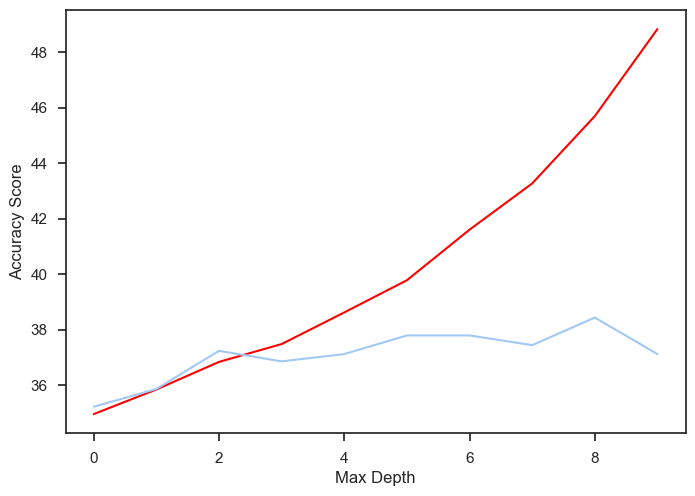

In [72]:
#decide max_depth
max_depth = 10
acc_train_list = []
acc_test_list = []

for i in range(1, max_depth + 1):
    dt = DecisionTreeClassifier(max_depth = i,random_state=123).fit(X_train, y_train)
    y_prediction = dt.predict(X_test)
    dt_training_score = 100 * dt.score(X_train, y_train)
    dt_test_score = 100 * dt.score(X_test, y_test)
    acc_train_list.append(dt_training_score)
    acc_test_list.append(dt_test_score)
    
plt.plot (acc_train_list, color='red')
plt.plot(acc_test_list)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.show()

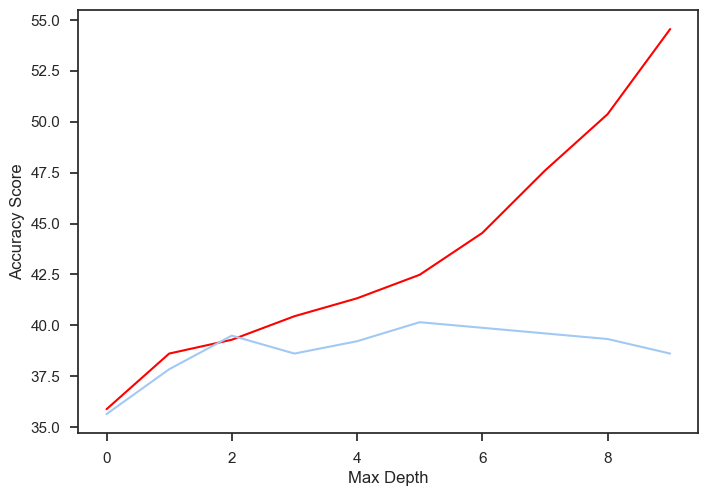

In [73]:
max_depth = 10
acc_train_list = []
acc_test_list = []

for i in range(1, max_depth + 1):
    dtDogs = DecisionTreeClassifier(max_depth = i,random_state=123).fit(X_trainDogs, y_trainDogs)
    y_prediction = dtDogs.predict(X_testDogs)
    dt_training_score = 100 * dtDogs.score(X_trainDogs, y_trainDogs)
    dt_test_score = 100 * dtDogs.score(X_testDogs, y_testDogs)
    acc_train_list.append(dt_training_score)
    acc_test_list.append(dt_test_score)
    
plt.plot (acc_train_list, color='red')
plt.plot(acc_test_list)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.show()

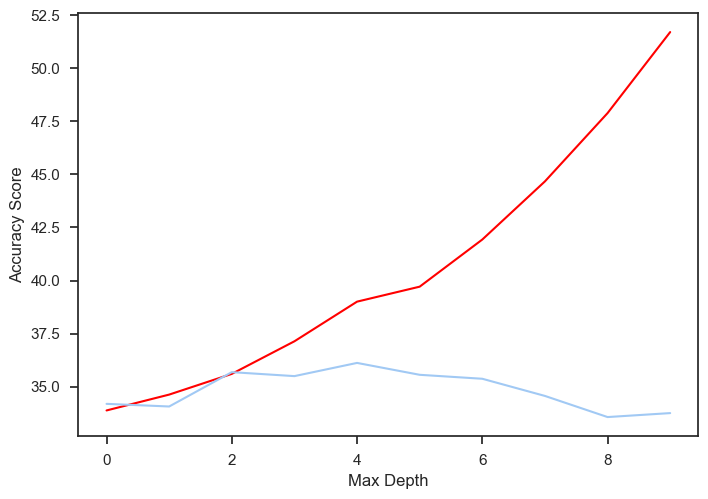

In [74]:
max_depth = 10
acc_train_list = []
acc_test_list = []

for i in range(1, max_depth + 1):
    dtCats = DecisionTreeClassifier(max_depth = i,random_state=123).fit(X_trainCats, y_trainCats)
    y_prediction = dtCats.predict(X_testCats)
    dt_training_score = 100 * dtCats.score(X_trainCats, y_trainCats)
    dt_test_score = 100 * dtCats.score(X_testCats, y_testCats)
    acc_train_list.append(dt_training_score)
    acc_test_list.append(dt_test_score)
    
plt.plot (acc_train_list, color='red')
plt.plot(acc_test_list)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.show()

In [75]:
dt=DecisionTreeClassifier(max_depth=9,random_state=123).fit(X_train,y_train)
y_prediction=dt.predict(X_test)
print('Max Depth:',dt.get_depth())
print('Decision Tree Accuracy (Combined):')
print('Test score: {:.4f}'.format(dt.score(X_train,y_train)))
print('Test score: {:.4f}'.format(dt.score(X_test,y_test)))
print("quadratic_kappa:", quadratic_kappa(y_test,y_prediction))

dtDogs=DecisionTreeClassifier(max_depth=3,random_state=123).fit(X_trainDogs,y_trainDogs)
y_predictionDogs=dtDogs.predict(X_testDogs)
print('Max Depth:',dtDogs.get_depth())
print('Decision Tree Accuracy (Dogs):')
print('Training score: {:.4f}'.format(dtDogs.score(X_trainDogs,y_trainDogs)))
print('Test score: {:.4f}'.format(dtDogs.score(X_testDogs,y_testDogs)))
print("quadratic_kappa:", quadratic_kappa(y_testDogs,y_predictionDogs))

dtCats=DecisionTreeClassifier(max_depth=5,random_state=123).fit(X_trainCats,y_trainCats)
y_predictionCats=dtCats.predict(X_testCats)
print('Max Depth:',dtCats.get_depth())
print('Decision Tree Accuracy (Cats):')
print('Training score: {:.4f}'.format(dtCats.score(X_trainCats,y_trainCats)))
print('Test score: {:.4f}'.format(dtCats.score(X_testCats,y_testCats)))
print("quadratic_kappa:", quadratic_kappa(y_testCats,y_predictionCats))

Max Depth: 9
Decision Tree Accuracy (Combined):
Test score: 0.4569
Test score: 0.3843
quadratic_kappa: 0.30544745060475287
Max Depth: 3
Decision Tree Accuracy (Dogs):
Training score: 0.3929
Test score: 0.3949
quadratic_kappa: 0.3348302736093569
Max Depth: 5
Decision Tree Accuracy (Cats):
Training score: 0.3900
Test score: 0.3611
quadratic_kappa: 0.29949215715827426


Feature importances:
[0.20557662 0.03404975 0.01742989 0.04317604 0.09811528 0.13778706
 0.00600122 0.         0.03401263 0.00905293 0.00675666 0.00105851
 0.00166313 0.01382201 0.08480831 0.00471207 0.00199036 0.00912667
 0.01757462 0.00100361 0.01312881 0.00958897 0.01305901 0.00362384
 0.00359281 0.00447373 0.00265191 0.00745329 0.01265971 0.01560447
 0.00698755 0.0023466  0.00913751 0.00910083 0.0353569  0.00516269
 0.         0.00121867 0.         0.00657416 0.         0.00527343
 0.         0.01043824 0.00131903 0.00109496 0.0124534  0.
 0.00928664 0.00398256 0.         0.00664652 0.01285033 0.002906
 0.         0.01291078 0.         0.00086024 0.00982558 0.00340365
 0.         0.00356828 0.00491739 0.00882416]
 1) Age                            0.205577
 2) DescriptonWordsCount           0.137787
 3) PhotoAmt                       0.098115
 4) Breed1_Mixed Dog               0.084808
 5) Quantity                       0.043176
 6) Sterilized_2                   0.035357
 7) Matur

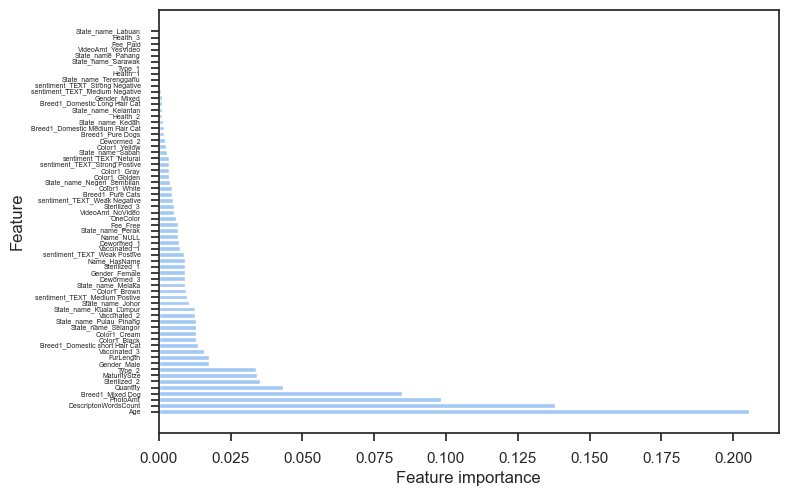

In [76]:
#feature importance
print("Feature importances:\n{}".format(dt.feature_importances_))
importances = dt.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = trainData.columns[:]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

def plot_feature_importances(model):
    n_features = trainData.shape[1]
    plt.barh(range(n_features), importances[sorted_indices], align='center')
    plt.yticks(np.arange(n_features),trainData.columns[sorted_indices],fontsize=5)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(dt)

Feature importances:
[0.32220454 0.         0.         0.         0.11454535 0.
 0.         0.         0.         0.         0.         0.
 0.39123094 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.03478922 0.09745407 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.03977588 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
 1) Breed1_Mixed Dog               0.391231
 2) Age                            0.322205
 3) PhotoAmt                       0.114545
 4) Sterilized_2                   0.097454
 5) State_name_Melaka              0.039776
 6) Sterilized_1                   0.034789
 7) Color1_Golden                  0.000000
 8) Color1_Black                   0.000000
 9) Color1_Br

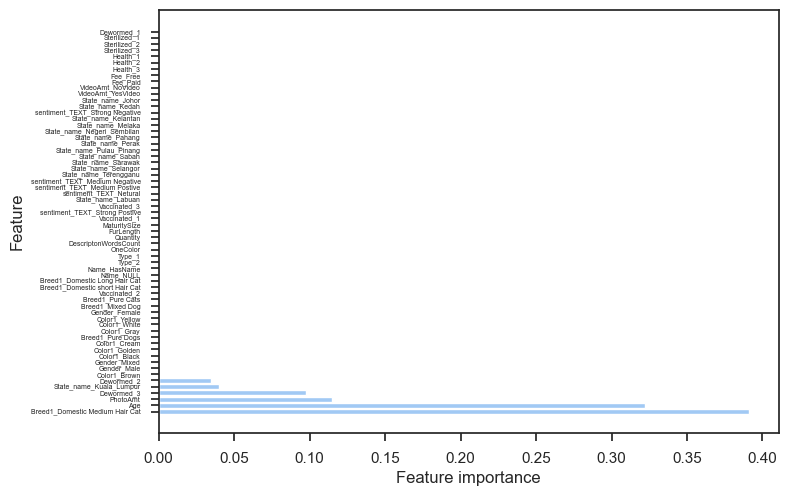

In [77]:
print("Feature importances:\n{}".format(dtDogs.feature_importances_))
importances = dtDogs.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = dogsTrainData.columns[:]
for f in range(X_trainDogs.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

def plot_feature_importances(model):
    n_features = dogsTrainData.shape[1]
    plt.barh(range(n_features), importances[sorted_indices], align='center')
    plt.yticks(np.arange(n_features),trainData.columns[sorted_indices],fontsize=5)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(dtDogs)

Feature importances:
[0.46019418 0.02736002 0.06244281 0.0839797  0.14265013 0.07566243
 0.02189272 0.         0.         0.         0.         0.
 0.         0.         0.         0.0130588  0.         0.
 0.00860907 0.         0.         0.         0.         0.
 0.         0.04023242 0.         0.         0.         0.01151974
 0.00585895 0.00760468 0.01752499 0.01279685 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00861249 0.         0.
 0.         0.        ]
 1) Age                            0.460194
 2) PhotoAmt                       0.142650
 3) Quantity                       0.083980
 4) DescriptonWordsCount           0.075662
 5) FurLength                      0.062443
 6) Vaccinated_1                   0.040232
 7) MaturitySize                   0.027360
 8) OneColor                       0.0218

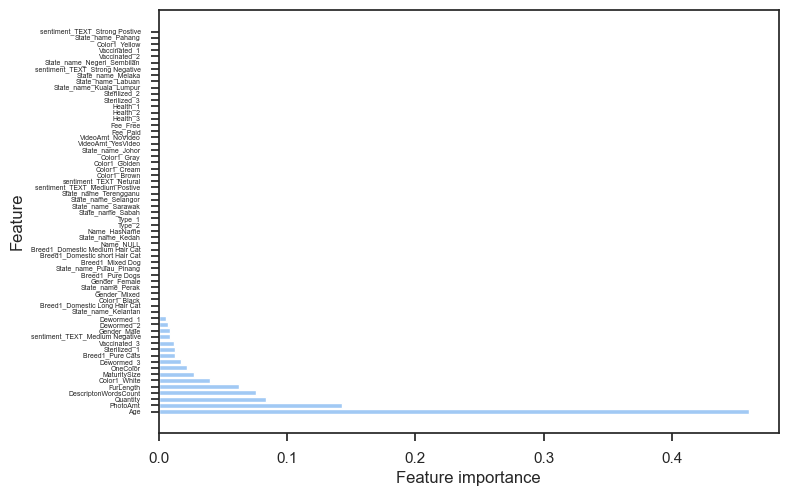

In [78]:
print("Feature importances:\n{}".format(dtCats.feature_importances_))
importances = dtCats.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = catsTrainData.columns[:]
for f in range(X_trainCats.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

def plot_feature_importances(model):
    n_features = catsTrainData.shape[1]
    plt.barh(range(n_features), importances[sorted_indices], align='center')
    plt.yticks(np.arange(n_features),trainData.columns[sorted_indices],fontsize=5)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(dtCats)

In [79]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100,random_state=123)
forest.fit(X_train,y_train)
print("Accuracy on training set: {:.4f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.9968
Accuracy on test set: 0.4027


In [80]:
#random forests
# Create first pipeline for base without reducing features.
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# Create param grid.
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]
# Create grid search object
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
# Fit on data
best_clf = clf.fit(X_train, y_train)
print("Best parameters: {}".format(best_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(best_clf.best_score_))

#results = pd.DataFrame(best_clf.cv_results_)
#display(results.T)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'classifier': RandomForestClassifier(max_features=26, n_estimators=90), 'classifier__max_features': 26, 'classifier__n_estimators': 90}
Best cross-validation score: 0.4145


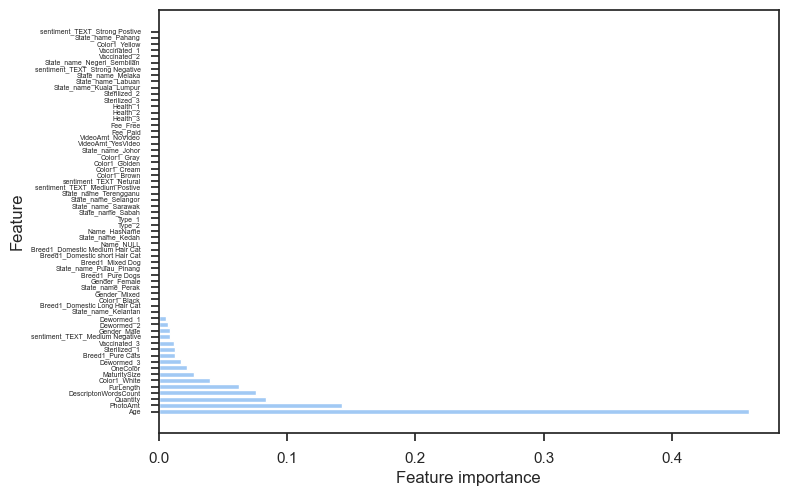

In [81]:
plot_feature_importances(best_clf)

## 3. XGBoost

In [82]:
data_dmatrix = xgb.DMatrix(data=trainData,label=trainTarget)
X_train, X_test, y_train, y_test = train_test_split(trainData, trainTarget, test_size=0.25, random_state=123,stratify=trainTarget)
# Cats and Dogs Models
dataDogs_dmatrix = xgb.DMatrix(data=dogsTrainData,label=dogsTrainTarget)
dataCats_dmatrix = xgb.DMatrix(data=catsTrainData,label=catsTrainTarget)

X_trainDogs, X_testDogs, y_trainDogs, y_testDogs = train_test_split(dogsTrainData, dogsTrainTarget, test_size=0.25, random_state=123)
X_trainCats, X_testCats, y_trainCats, y_testCats = train_test_split(catsTrainData, catsTrainTarget, test_size=0.25, random_state=123)

In [83]:
model = XGBClassifier( colsample_bytree = 0.3, learning_rate = 0.5,
                max_depth = 15, alpha = 20, n_estimators = 20,use_label_encoder=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(quadratic_kappa(y_test, predictions))

#Training Dogs and Cats Models
DogsModel = XGBClassifier( colsample_bytree = 0.3, learning_rate = 0.5,
                max_depth = 15, alpha = 20, n_estimators = 20, use_label_encoder=False)
DogsModel.fit(X_trainDogs, y_trainDogs)
y_predDogs = DogsModel.predict(X_testDogs)
predictionsDogs = [round(value) for value in y_predDogs]
accuracyDogs = accuracy_score(y_testDogs, predictionsDogs)
print('Dogs Model Details:')
print("Accuracy: %.2f%%" % (accuracyDogs * 100.0))
print(f'Quadratic_kappa {quadratic_kappa(y_testDogs, predictionsDogs)}')


CatsModel = XGBClassifier( colsample_bytree = 0.3, learning_rate = 0.5,
                max_depth = 15, alpha = 20, n_estimators = 20,use_label_encoder=False)
CatsModel.fit(X_trainCats, y_trainCats)
y_predCats = CatsModel.predict(X_testCats)

predictionsCats = [round(value) for value in y_predCats]
accuracyCats = accuracy_score(y_testCats, predictionsCats)
print('Cats Model Details:')
print("Accuracy: %.2f%%" % (accuracyCats * 100.0))
print(f'Quadratic_kappa {quadratic_kappa(y_testCats, predictionsCats)}')

Accuracy: 39.46%
0.3275548398196394
Dogs Model Details:
Accuracy: 41.25%
Quadratic_kappa 0.36082061981136193
Cats Model Details:
Accuracy: 37.11%
Quadratic_kappa 0.2889184690479262


In [84]:
print(tabulate([['CombinedModel', accuracy * 100.0,quadratic_kappa(y_test, predictions)],
                ['CatsModel', accuracyCats * 100.0,quadratic_kappa(y_testCats, predictionsCats)],
                ['DogsModel',accuracyDogs * 100.0,quadratic_kappa(y_testDogs, predictionsDogs)]],
               headers=['Model Name', 'Accuracy','Quadratic Kappa']))

Model Name       Accuracy    Quadratic Kappa
-------------  ----------  -----------------
CombinedModel     39.4568           0.327555
CatsModel         37.1108           0.288918
DogsModel         41.2541           0.360821


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

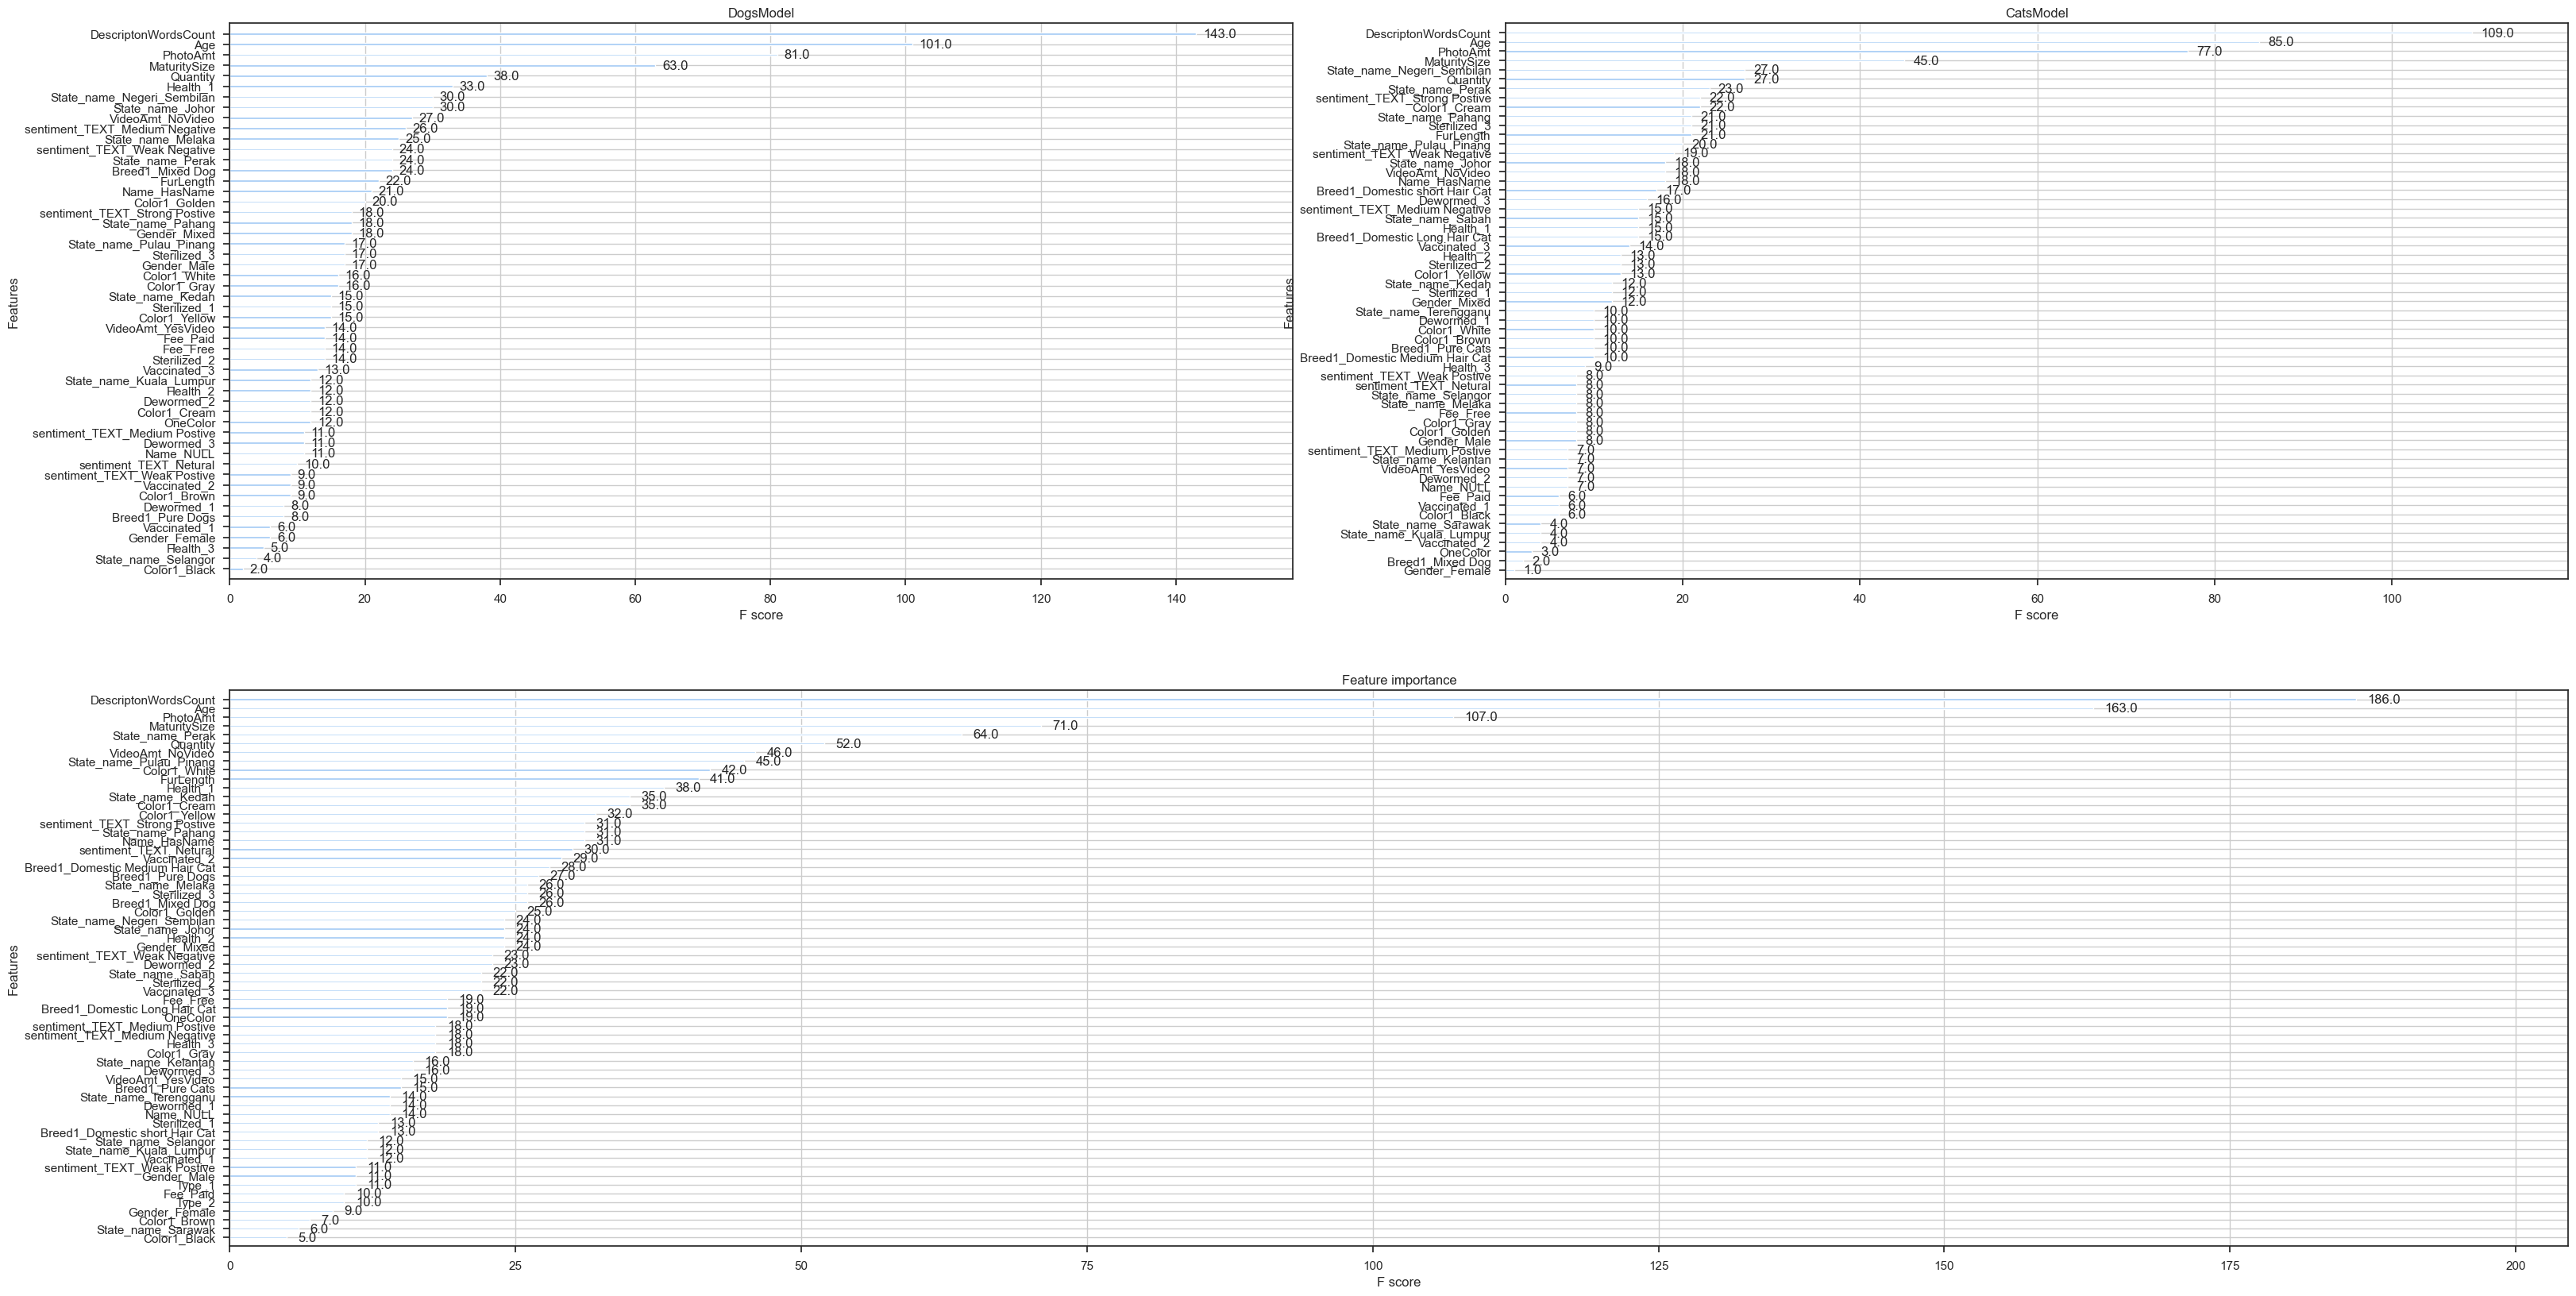

In [85]:
#importance of features
plt.figure(figsize=(38, 20));
ax2 = plt.subplot2grid((2, 2), (0, 0))
xgb.plot_importance(DogsModel,ax=ax2)

plt.title('DogsModel');

ax3 = plt.subplot2grid((2, 2), (0, 1))
xgb.plot_importance(CatsModel,ax=ax3)
plt.title('CatsModel');

ax4 = plt.subplot2grid((2, 2), (1, 0),colspan=2)
plt.title('Combined');

xgb.plot_importance(model,ax=ax4)

In [86]:
#parameter tuning
params={
    "learning_rate": [0.1],
    "colsample_bytree" : [0.5],
        'gamma': [0.35],
        'subsample': [0.9],
        'colsample_bytree': [0.9],
        "min_child_weight" : [ 1 ],
        'max_depth': [8,10,12],
        'n_estimators' : [175],
        'alpha': [0,0.2,0.5],
        'objective': 'multi:softprob'
    
        }

In [87]:
accuracysum=0
quadratic_kappasum=0
NumRandomStates=1
for i in range(NumRandomStates): #100
    print(i)

    data_dmatrix = xgb.DMatrix(data=trainData,label=trainTarget)
    X_train, X_test, y_train, y_test = train_test_split(trainData, trainTarget, test_size=0.20, random_state=1000+1000*i,stratify=trainTarget)

    XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
          colsample_bynode=1, colsample_bytree=0.9, gamma=0.35, gpu_id=-1,
          importance_type='gain', interaction_constraints='',
          learning_rate=0.1, max_delta_step=0, max_depth=20,
          min_child_weight=1, monotone_constraints='()',
          n_estimators=175, n_jobs=-1, num_parallel_tree=1,
          objective='multi:softprob', random_state=0, reg_alpha=0,
          reg_lambda=1, scale_pos_weight=None, subsample=0.9,
          tree_method='exact', validate_parameters=1,alpha=0.25, verbosity=None,use_label_encoder =False)
              
    
    XGBmodel.fit(X_train, y_train)
    y_pred = XGBmodel.predict(X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    accuracysum+=accuracy *100.0
    quadratic_kappasum+=quadratic_kappa(y_test, predictions)
    
    print(accuracy * 100.0,quadratic_kappa(y_test, predictions))
    

print(f'Accuracy Sum over {NumRandomStates} RandomStates is:{accuracysum/NumRandomStates}')
print(f'Quadratic Kappa Sum over {NumRandomStates} RandomStates is:{quadratic_kappasum/NumRandomStates}')

0
40.45271997079226 0.3245988946735665
Accuracy Sum over 1 RandomStates is:40.45271997079226
Quadratic Kappa Sum over 1 RandomStates is:0.3245988946735665


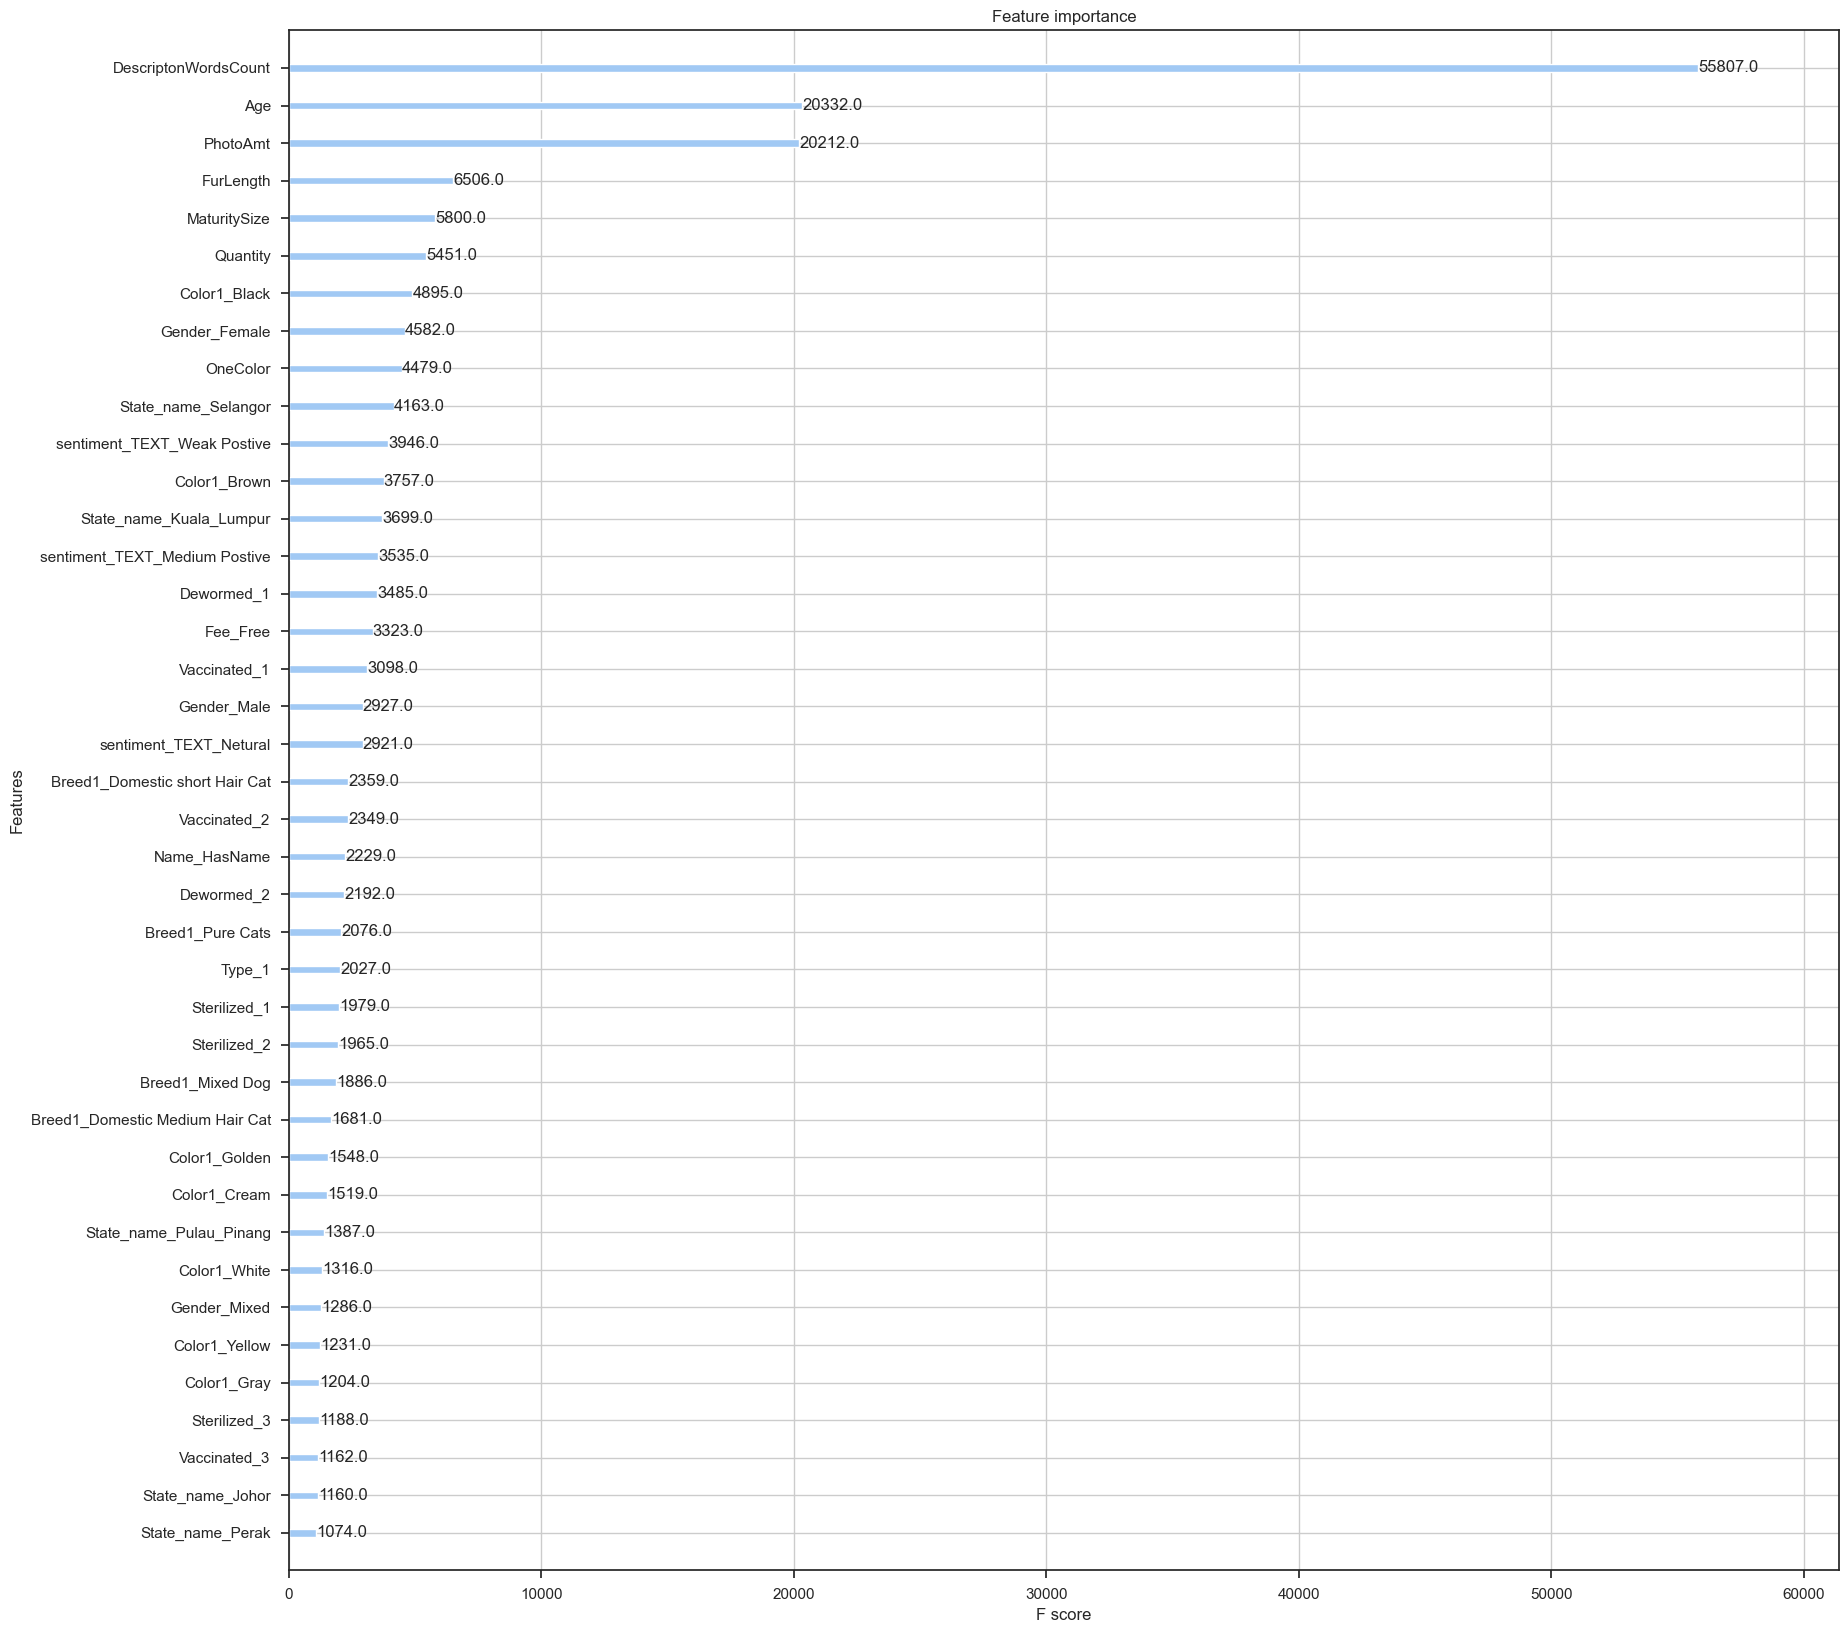

In [88]:
ax=xgb.plot_importance(XGBmodel,max_num_features=40)
fig = ax.figure
fig.set_size_inches(20, 20)

In [89]:
#calculate AUC of binary model
#from sklearn import metrics
#y_pred_proba = logreg.predict_proba(X_test)[::,1]
#auc = metrics.roc_auc_score(y_test, y_pred_proba,multi_class='ovr')

#OVC, OVO
from sklearn.multiclass import  OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 13)

model = OneVsRestClassifier(SVC())

model.fit(X_train, y_train)

prediction = model.predict(X_test)

print(f"Test Set Accuracy : {accuracy_score( y_test, prediction) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report( y_test, prediction)}")



model = OneVsOneClassifier(SVC())
model.fit(X_train, y_train)
prediction = model.predict(X_test)

print(f"Test Set Accuracy : {accuracy_score( y_test, prediction) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report( y_test, prediction)}")

import statsmodels.formula.api as sm
import statsmodels.api as st
mdl = st.MNLogit(y_train, X_train)
mdl_fit = mdl.fit(method='bfgs')
fitted = mdl_fit.predict()
#fitted[y=='setosa'].min(0)
#fitted[y=='setosa'].max(0)
print(mdl_fit.summary())

# VI. Deployment

In [90]:
#show the result to the shelters of the PetFinder.my company and the rescurers
#advice:
#1.pick a name
#2.list every pet on their own instead of groups
#3.strengthen long furlength/young age/, it may increase adoption rate
#4.highly recommend to be dewormed, but not sterilized
#5.lower fee increases adoption rate&speed
#6.more photos and videos attract people
#7.don't make description too short, it's better to write a longer summary about the pet
